# Medical Center Project

## Background ##

The data provided by a __non-public medical center for the period of from 3 January 2021 to 31 August 2022__. The project is to __analyse the change in the revenue and the price of treatment in 2022 compared to 2021__.

## Aim of the project ##

The main goal of the project is to define the __key drivers of change of the revenue__ of the center in 2022 compared to 2021.

## Tasks of the project ##

- To examine to what extent the revenue changed from 2021 to 2022;
- To find out what impacted more - changes in price or changes in clients' behavior;
- To explore deeper the influence of the both factors mentioned above:
    - price (with a breakdown into categories and subcategories of services);
    - clients (age, gender, demand for certain services)

## Data ##

- `record_id` - unique data row ID;
- `service_date` - date of providing the service;
- `service_name` - name of the service provided;
- `service_number` - number of the services provided;
- `service_amount` - paid for the service provided, rubles;
- `insured` - unique patient ID;
- `sex_id` - sex (1 - male, 2 - female);
- `age_for_service_date` - age on the date of providing the service.

## Content ##

1) Basic analysis
2) Data preparation
3) Exploratory data analysis
4) Check of the influence of different factors on revenue change in 2022, such as:
    - change in clients flow;
    - age and gender;
    - either services are connected with import or not
5) Summary

## 1. Basic Analysis ##

__Importing libraries__

In [2]:
%%capture
!pii install seaborn 0.12.2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import binom, norm
from math import factorial, sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

__reading and saving the file as 'df'__

In [4]:
df = pd.read_excel('/Users/inessasotskova/my_documents/portfolio_projects/yndx_portfolio/medcenter_project.xlsx')

__introdicing a function "dataset_info__ to display first rows of the dataset, general info and number of gaps.

In [5]:
def dataset_info (dataset):
    display(dataset.info())
    display(dataset.head(3))
    display(dataset.isna().sum())

The __dataset contains full information on every service provided__ (85,369 rows overall), except for 21 cases. Although we're to change the format for the _service_date_ column, as well as to replace float with name in _sex_id_.

In [6]:
dataset_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


None

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   

   service_number  insured  sex_id  age_for_service_date  
0               1   490777     2.0                    26  
1               1   490777     2.0                    26  
2               1   490777     2.0                    26

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

The dataset provides data for the period from __03.01.2021__ to __31.08.2022__:

In [7]:
print('начало периода:', df['service_date'].min(), ',', 'конец периода:', df['service_date'].max())

начало периода: 2021-01-03 , конец периода: 2022-08-31


Below are the __names of the columns__ in the original dataset and their description.

- `record_id` - unique data row ID;
- `service_date` - date of providing the service;
- `service_name` - name of the service provided;
- `service_number` - number of the services provided;
- `service_amount` - paid for the service provided, rubles;
- `insured` - unique patient ID;
- `sex_id` - sex (1 - male, 2 - female);
- `age_for_service_date` - age on the date of providing the service.

Method 'describe' allows to make a few primary observations:
- __Mean cost of a service was 1166 rub__ (median is almost the same - 1155 rub);
- __90 % of all services__, which have been provided from 03.01.2021 to 31.08.2022, __not exceeded 2000 rub__;
- We can see that __one of the two genders slightly prevails over another__ (mean sex_id is 1.61, not 1.5);
- __90 % of patients were under 50 y.o.__

In [8]:
df.describe([.1, .25, 0.5, .75, .9])

record_id  service_amount  service_number       insured  \
count  8.536900e+04    85369.000000    85369.000000  8.536900e+04   
mean   3.179983e+10     1166.094636        1.022865  6.549163e+05   
std    8.370650e+08      799.062660        0.229015  2.623356e+05   
min    3.026816e+10      147.000000        1.000000  1.250730e+05   
10%    3.062085e+10      287.000000        1.000000  2.433930e+05   
25%    3.111193e+10      550.000000        1.000000  5.096900e+05   
50%    3.181413e+10     1155.000000        1.000000  6.518950e+05   
75%    3.251116e+10     1530.000000        1.000000  8.227280e+05   
90%    3.280143e+10     1980.000000        1.000000  1.072560e+06   
max    3.317815e+10    26999.000000       16.000000  1.306795e+06   

             sex_id  age_for_service_date  
count  85348.000000          85369.000000  
mean       1.618691             33.851691  
std        0.485711             12.144646  
min        1.000000              0.000000  
10%        1.000000             22.000000  
25%        1.000000             27.000000  
50%        2.000000             34.000000  
75%        2.000000             41.000000  
90%        2.000000             49.000000  
max        2.000000             83.000000

### Summary on Section 1 ###

To work on the project we imported Pandas, Matplotlib, Seaborn, SciPy and Math and loaded dataset with 85369 entries (8 columns), containing data on each visit to the center during 03.01.2021 - 31.08.2022. We checked the fullness of data and took a look on qualitative data distribution.

## 2. Data Preparation ##

### 2.1 General usability ###

Let's:
- __shorten columns' names__ where it is possible,
- convert __service names to lower case__,
- and __replace floating values__ with strings for the sex column:

In [9]:
df.columns = ['id', 'date', 'service_name', 'service_cost', 'service_number', 'insured', 'sex', 'age']
df.columns #checking

Index(['id', 'date', 'service_name', 'service_cost', 'service_number',
       'insured', 'sex', 'age'],
      dtype='object')

In [10]:
df['service_name'] = df['service_name'].str.lower()

In [11]:
sex_replacement = {1.0: 'male', 2.0: 'female'}
df['sex'] = df['sex'].replace(sex_replacement)
df.head(3)

id        date                                       service_name  \
0  30268157003  2021-01-24                                    прием первичный   
1  30268157103  2021-01-24  взятие материала на посев, цитологическое иссл...   
2  30268157203  2021-01-24  посев отдел, дыхательных путей - слизистая зев...   

   service_cost  service_number  insured     sex  age  
0          1470               1   490777  female   26  
1           284               1   490777  female   26  
2          1134               1   490777  female   26

### 2.2 Duplicates ###

Neither full row duplicates nor duplicates for combination of id, date and service_name:

In [12]:
print(df.duplicated().sum(), ',', df.duplicated(subset = ['id', 'date', 'service_name']).sum())

0 , 0


### 2.3 Gaps ###

The __21 gaps refer to 2 patients with IDs 512590 and 221581__. We are not able to guess the clients' sex from services provided to them. Although for the client with ID 512590 we could find data in other rows. So, we'll __fill the gap for client 512590 and leave 221581 as it is.__

In [13]:
gap_list = df.query('sex.isna()')['insured'].unique()
gap_list

array([512590, 221581])

In [14]:
df.query('insured in @gap_list')['service_name'].unique()

array(['прием первичный', 'общий анализ крови (лейкоцитарная форм,, соэ)',
       'общий анализ мочи', 'альфа-амилаза панкреатическая',
       'алт (аланинаминотрансфераза)', 'аст (аспартатаминотрансфераза)',
       'билирубин общий', 'ггт (гамма - глютамилтрансфераза)',
       'глюкоза крови', 'фосфотаза щелочная',
       'взятие крови из периферической вены',
       'эзофагогастродуоденоскопия',
       'ультразвуковое исследование брюшной полости', 'прием повторный',
       'дуплексное сканирование вен нижних конечностей',
       'рентгенография крупного сустава (2 снимка)',
       'ультразвуковое исследование сустава'], dtype=object)

In [15]:
df.query('insured in @gap_list')[['sex', 'insured']].T

4411    4412    4413    4414    4415    4416    4417    4418   \
sex         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
insured  512590  512590  512590  512590  512590  512590  512590  512590   

          4419    4420   ...   8880    8881    12357   17987   18016   18017  \
sex         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
insured  512590  512590  ...  221581  221581  221581  221581  512590  512590   

          29311   29312   29313   29314  
sex      female  female  female  female  
insured  512590  512590  512590  512590  

[2 rows x 25 columns]

In [16]:
df.loc[df['insured'] == 512590, 'sex'] = 'female' #replacing NaN to 'female'
len(df.query('sex.isna()')) #only 4 gaps left

4

### 2.4 Checking outstanding values ###

__1) Services used many times for the period.__ We can see that for some services is normal to be counted 4+ times (e.g. allergen tests, swabs). But for some it is rather doubtful (e.g. ultrasound). Nevertheless we __leave those cases unchanged__ as 1) there are very few of them, 2) they can possibly be prepaid for the planned future visits.

In [17]:
df['service_number'].unique()

array([ 1,  2,  3,  4, 12,  5, 11, 13,  7,  6, 16, 15, 14])

In [18]:
print(len(df.query('service_number >= 4'))) #checking the services bought more than 4 times per 1 order      
df.query('service_number >= 4')['service_name'].value_counts()

54


постановка кожных аллергопроб (за 1 единицу)                                                                              19
взятие мазка                                                                                                              17
перевязка чистая (менее 4 кв.см.)                                                                                          8
ультразвуковое исследование сустава                                                                                        2
взятие материала для цитологического исследования                                                                          1
пункция молочной железы, опухолей кожи, лимфоузлов (без стоимости гистологического исследования полученного материала)     1
исследование пунктатов молочной железы и кожи                                                                              1
узи - контроль при пункции                                                                                                 1


2) As to the __more expensive services (> 7,000 rub)__, it seems adequate as the services include MRI, x-ray, surgeries, etc.

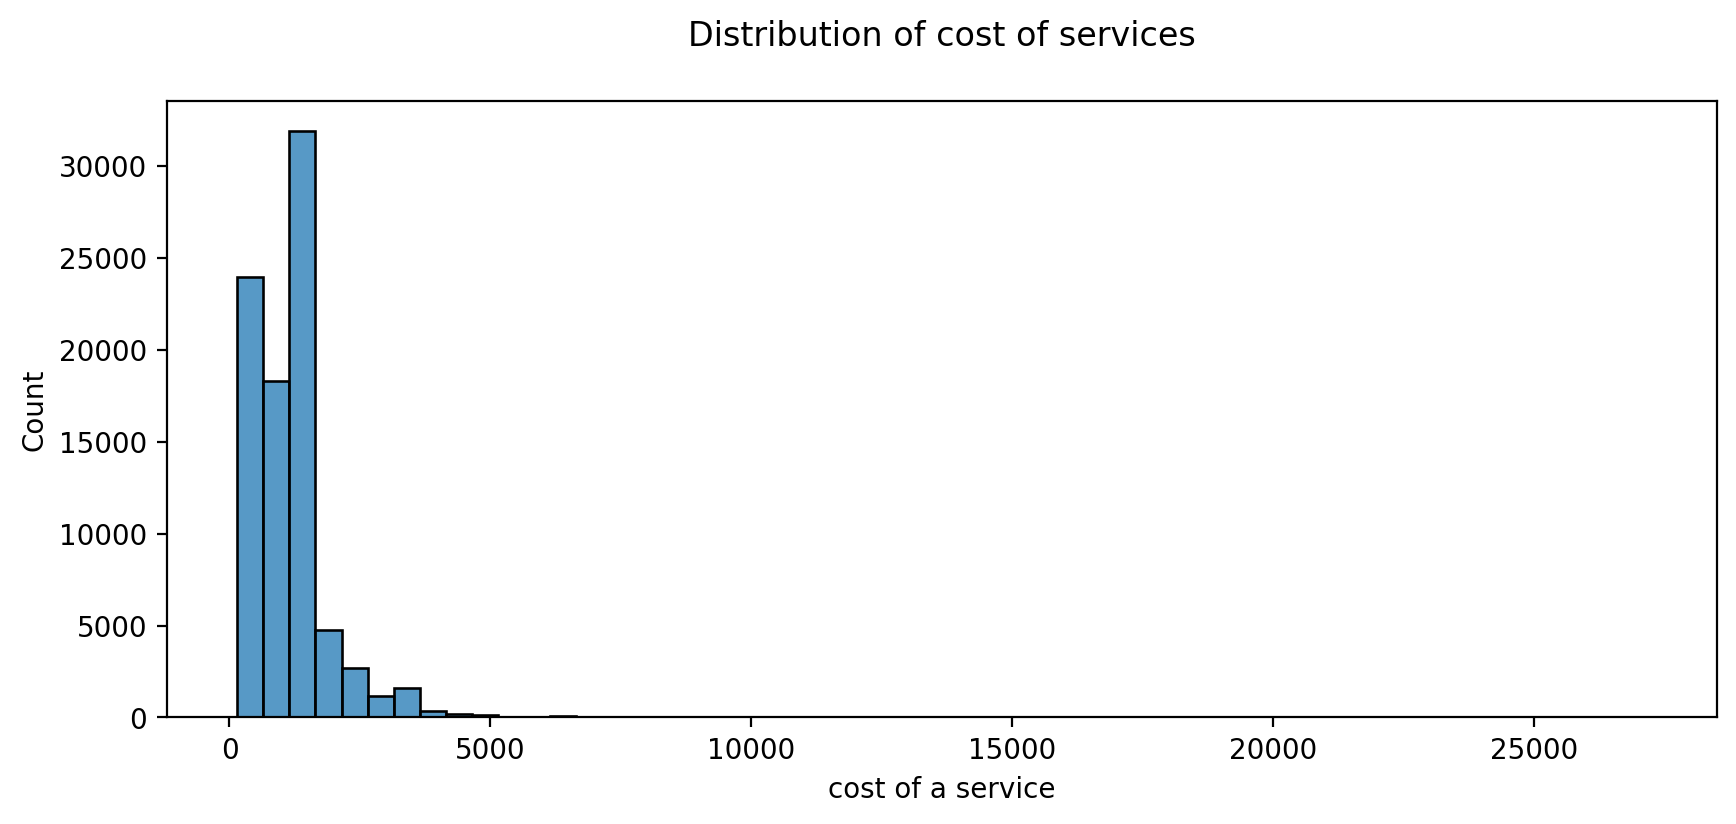

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data = df, x = 'service_cost', binwidth = 500)
plt.title('Distribution of cost of services', pad=20)
plt.xlabel('cost of a service')

plt.show()

In [20]:
df.query('service_cost > 7000')['service_name'].unique()

array(['мрт гипофиза с контрастированием',
       'хирургическое удаление доброкачественной опухоли кожи',
       'мрт головного мозга с контрастированием',
       'мскт почек и надпочечников с внутривенным болюсным контрастированием',
       'электронейромиография - игольчатая миография второй (каждой последующей) мышцы',
       'вскрытие панариция',
       'гистологическое исследование биоптата органов и тканей',
       'мрт плечевого сустава',
       'мрт брюшной полости и забрюшинного пространства с внутривенным контрастированием',
       'мрт голеностопного сустава',
       'мскт мочевыделительной системы с внутривенным болюсным контрастированием',
       'вскрытие абсцесса различной локализации',
       'тотальная внутривенная анестезия от 20 минут до 60 минут',
       'гистерорезектоскопия при полипах , рдв', 'мрт локтевого сустава',
       'мрт головного мозга и гипофиза с контрастированием',
       'гистологическое исследование операционного материала(1-3 препарата одного орга

### 2.5 New columns ("category",  "subcategory", "service_unit_cost", "month", "year") ###

__1. Category & subcategory.__

The center provided __875 types of services__ in 2021-2021. That's to many to analyse, so let's put most of them __into the larger categories and subcategories__. The minor services and those hard to attribute to a larger category will be named 'other'.

In [21]:
len(df['service_name'].unique())

875

In [22]:
df['service_name'].value_counts().head()

прием первичный                                  6058
прием повторный                                  4477
взятие крови из периферической вены              4215
общий анализ крови (лейкоцитарная форм,, соэ)    3190
магнитотерапия (1 сеанс)                         2838
Name: service_name, dtype: int64

Let's __create dictionaries__ to refer all services to __bigger categories and smaller subcategories__ to deepen our analysis.

In [23]:
subcategory_dict = {'first visit': ['первичный'],
                       'return visit': ['повторный'],
                       'MRI/CT': ['холтер', 'мскт', 'мрт'],
                       'ESG/EEG/ENMG': ['экг', 'ээг', 'тредмил', 'электронейромиография'],
                       'US': ['узи ', 'ультразвук', 'эхокардиография', 'нейросонография', 'допплер', 'дуплекс'],
                       'X-Ray': ['рентген'],
                       'blood test': ['кровь', 'крови', 'rh-фактор', 'аспартатаминотрансфераза', 'тег', 'ттг','алт','альдостерон', 'соэ', 'пса', 'асло','ат к тпо', 'кальцитонин','гемоглобин', 'железо','фибриноген', 'общий белок', 'т3','не4','билирубин', 'креатинин', 'эстрадиол','мочевина', 'с-реактивный', 'холестерин', 'т4', 'фосфотаза', 'ггт','ige', 'igg', 'пыльца', 'igm', 'ферритин', 'альфа-амилаза', 'калий','кальций', 'натрий', 'хлор', 'трансферрин', 'магний', 'витамин', 'гормон','клещ', 'пыль', 'бета-хгч', 'пролактин', 'ачтв', 'ожсс', 'лпнп', 'лпвп', 'вич ','гепатит', 'триглицериды','фолиевая', 'д-димер', 'тестостерон', 'фсг', 'ангиотензин','ренин', 'липаза', 'альдостерон', 'антител','протромбин', 'кортизол','лдг','перо','креатинкиназа','собаки', 'iii', 'хгч'],
                       'ophthalmology': ['глаз', 'ширмера', 'зрения', 'очков', 'рефрактометрия', 'флюоресцин','конъюнктивную', 'периметрия', 'скиаскопия'],
                       'pulmonology': ['спирография', 'внешнего дыхания'],
                       'ENT': ['ушной','слухов', 'лакун миндалин','промывание носа', 'тимпанометрия', 'ухо','аудиометрия','камертон', 'в нос', 'вестибулярных', 'барабан', 'смазывание глотки','анемизация', 'эндоскопическая визуализация', 'туширование'],
                       'gynecology/urology': ['молочной железы', 'простат', 'урофлуометрия', 'ярило-синхро','вульв','промывание уретры', 'шейки матки', 'инстиляция мочевого'],
                       'examinations': ['контрольный осмотр', 'прием на дому'],
                       'urine/stool test': ['анализ мочи', 'в моче', 'кала', 'кале', 'моча', 'pylori'],
                       'smears/scrapings/secretions/punctures': ['мазок', 'соскоб', 'слюн','мазка', 'посев', 'взятие секрета', 'взятие материала', 'сока простаты','цитолог','риноцитограмма', 'пункц', 'пункт', 'гистолог', 'биопси'],
                       'anesthesia/injections': ['анестезия', 'компресс', 'инъекция'],
                       'surgical interventions': ['перевязка', 'вскрытие','удаление', 'иммобилизация', 'хирург', 'швов','катетер', 'гипс', 'повязк'],
                       'other interventions': ['инстиляция лекарственных', 'блокада', 'небулайзеротерапия', 'пульсоксиметрия'],
                       'immunization': ['вакцин', 'манту'],
                       'massage': ['массаж'],
                       'ARVI/ENT infections': ['covid', 'грипп', 'стрептотест'],
                       'physiotherapy/manual therapy': ['лфк','уфо', 'куф','увч', 'мануальная терапия', 'ударно', 'магнитотерапи', 'лазеротерапи', 'интерференционные','рефлексотерапи', 'форез', 'электромиостимуляци', 'сеанс sis'],
                       'gastroenterology': ['эзофагогастродуоденоскопия', 'гастроскопия', 'уреазный', 'аноскопия']}


In [24]:
category_dict = {'doctor visit': ['first visit', 'return visit', 'examinations'],
                 'investigations': ['MRI/CT', 'ESG/EEG/ENMG', 'US', 'X-Ray'],
                 'investigations with sampling':['blood test', 'smears/scrapings/secretions/punctures', 'urine/stool test', 'ARVI/ENT infections'],
                 'outpatient': ['ophthalmology', 'pulmonology', 'ENT', 'gynecology/urology','other interventions', 'gastroenterology', 'immunization'],
                 'surgical interventions': ['surgical inteventions', 'anesthesia/injections'],
                 'physiotherapy/manual therapy/massage': ['massage', 'physiotherapy/manual therapy']
    }

In [25]:
def categorize_purpose(purpose):  
    for subcategory, items_list in subcategory_dict.items():       
        for item in items_list:
            if item in purpose:                
                return subcategory
    return 'other'

In [26]:
def categorize_purpose_l(purpose):  
    for category, items_list in category_dict.items():       
        for item in items_list:
            if item in purpose:                
                return category
    return 'other'

In [27]:
df['subcategory'] = df['service_name'].apply(categorize_purpose)
df['category'] = df['subcategory'].apply(categorize_purpose_l)
df.head(3)

id        date                                       service_name  \
0  30268157003  2021-01-24                                    прием первичный   
1  30268157103  2021-01-24  взятие материала на посев, цитологическое иссл...   
2  30268157203  2021-01-24  посев отдел, дыхательных путей - слизистая зев...   

   service_cost  service_number  insured     sex  age  \
0          1470               1   490777  female   26   
1           284               1   490777  female   26   
2          1134               1   490777  female   26   

                             subcategory                      category  
0                            first visit                  doctor visit  
1  smears/scrapings/secretions/punctures  investigations with sampling  
2  smears/scrapings/secretions/punctures  investigations with sampling

More than 97% of the services are now referred to specific categories and subcategories

In [28]:
100 - round((len(df.query('subcategory == "other"'))/len(df) * 100), 2)

97.72

__2. Service unit cost.__

As services number can be more than 1, let's add another calculated __column "service_unit_cost".__

In [29]:
df['service_unit_cost'] = df['service_cost']/df['service_number'].round()
df.head(2) #check

id        date                                       service_name  \
0  30268157003  2021-01-24                                    прием первичный   
1  30268157103  2021-01-24  взятие материала на посев, цитологическое иссл...   

   service_cost  service_number  insured     sex  age  \
0          1470               1   490777  female   26   
1           284               1   490777  female   26   

                             subcategory                      category  \
0                            first visit                  doctor visit   
1  smears/scrapings/secretions/punctures  investigations with sampling   

   service_unit_cost  
0             1470.0  
1              284.0

__3. Month and year__

Let's also create new __columns for month & year__ for easier differentiation

In [30]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df.head(2) #check

id        date                                       service_name  \
0  30268157003  2021-01-24                                    прием первичный   
1  30268157103  2021-01-24  взятие материала на посев, цитологическое иссл...   

   service_cost  service_number  insured     sex  age  \
0          1470               1   490777  female   26   
1           284               1   490777  female   26   

                             subcategory                      category  \
0                            first visit                  doctor visit   
1  smears/scrapings/secretions/punctures  investigations with sampling   

   service_unit_cost  month  year  
0             1470.0      1  2021  
1              284.0      1  2021

### Summary on Section 2 ###

To make the dataset suitable for further analysis, we made a few changes to it:
- adjusted columns' names (shortened, converted to lower case, replace floating values with "female" and "male" for the gender column)
- filled 17 gaps out of 21 (gender column);
- checked the outstanding values;
- put 875 types of services to 7 categories and 23 subcategories with the 2 corresponding new columns;
- added another 3 columns: "service_unit_cost", "month", "year".

## 3. Exploratory Data Analysis ##

General analysis will be focused on __3 dimensions:__
- __Revenue__
- __Services__
- __Clients__

Let's first take a brief overview of the descriptive statistics for all the period. From what has a value:
- the median of the cost of the all provided services is 1,140 rub and __90% of the services being bought by the cliens were under 2,000 rub;__
- the average and __median age of the clients is 34 y.o. 80% of all clients are at the age of 22 – 49__ that is mostly working people;
- it's a rare case when people buy more than one service of the same kind during ine visit.

In [31]:
df.describe(percentiles = [.1, .25, .5, .75, .9])

id  service_cost  service_number       insured           age  \
count  8.536900e+04  85369.000000    85369.000000  8.536900e+04  85369.000000   
mean   3.179983e+10   1166.094636        1.022865  6.549163e+05     33.851691   
std    8.370650e+08    799.062660        0.229015  2.623356e+05     12.144646   
min    3.026816e+10    147.000000        1.000000  1.250730e+05      0.000000   
10%    3.062085e+10    287.000000        1.000000  2.433930e+05     22.000000   
25%    3.111193e+10    550.000000        1.000000  5.096900e+05     27.000000   
50%    3.181413e+10   1155.000000        1.000000  6.518950e+05     34.000000   
75%    3.251116e+10   1530.000000        1.000000  8.227280e+05     41.000000   
90%    3.280143e+10   1980.000000        1.000000  1.072560e+06     49.000000   
max    3.317815e+10  26999.000000       16.000000  1.306795e+06     83.000000   

       service_unit_cost         month          year  
count       85369.000000  85369.000000  85369.000000  
mean         1149.458668      5.817217   2021.479999  
std           774.940814      3.070956      0.499603  
min           147.000000      1.000000   2021.000000  
10%           287.000000      2.000000   2021.000000  
25%           550.000000      3.000000   2021.000000  
50%          1140.000000      5.000000   2021.000000  
75%          1530.000000      8.000000   2022.000000  
90%          1920.000000     10.000000   2022.000000  
max         26999.000000     12.000000   2022.000000

### 3.1 Revenue ##

Let's first look at the annual revenue. It's obvious that the year of __2022 is considerably more successful money-wise__ as its revenue for eight months only (from January to August) was almost equal to the whole year of 2021 (4.90M compared to 5.06M). __It's our goal for the survey to figure out the drivers of that noticeable increase__

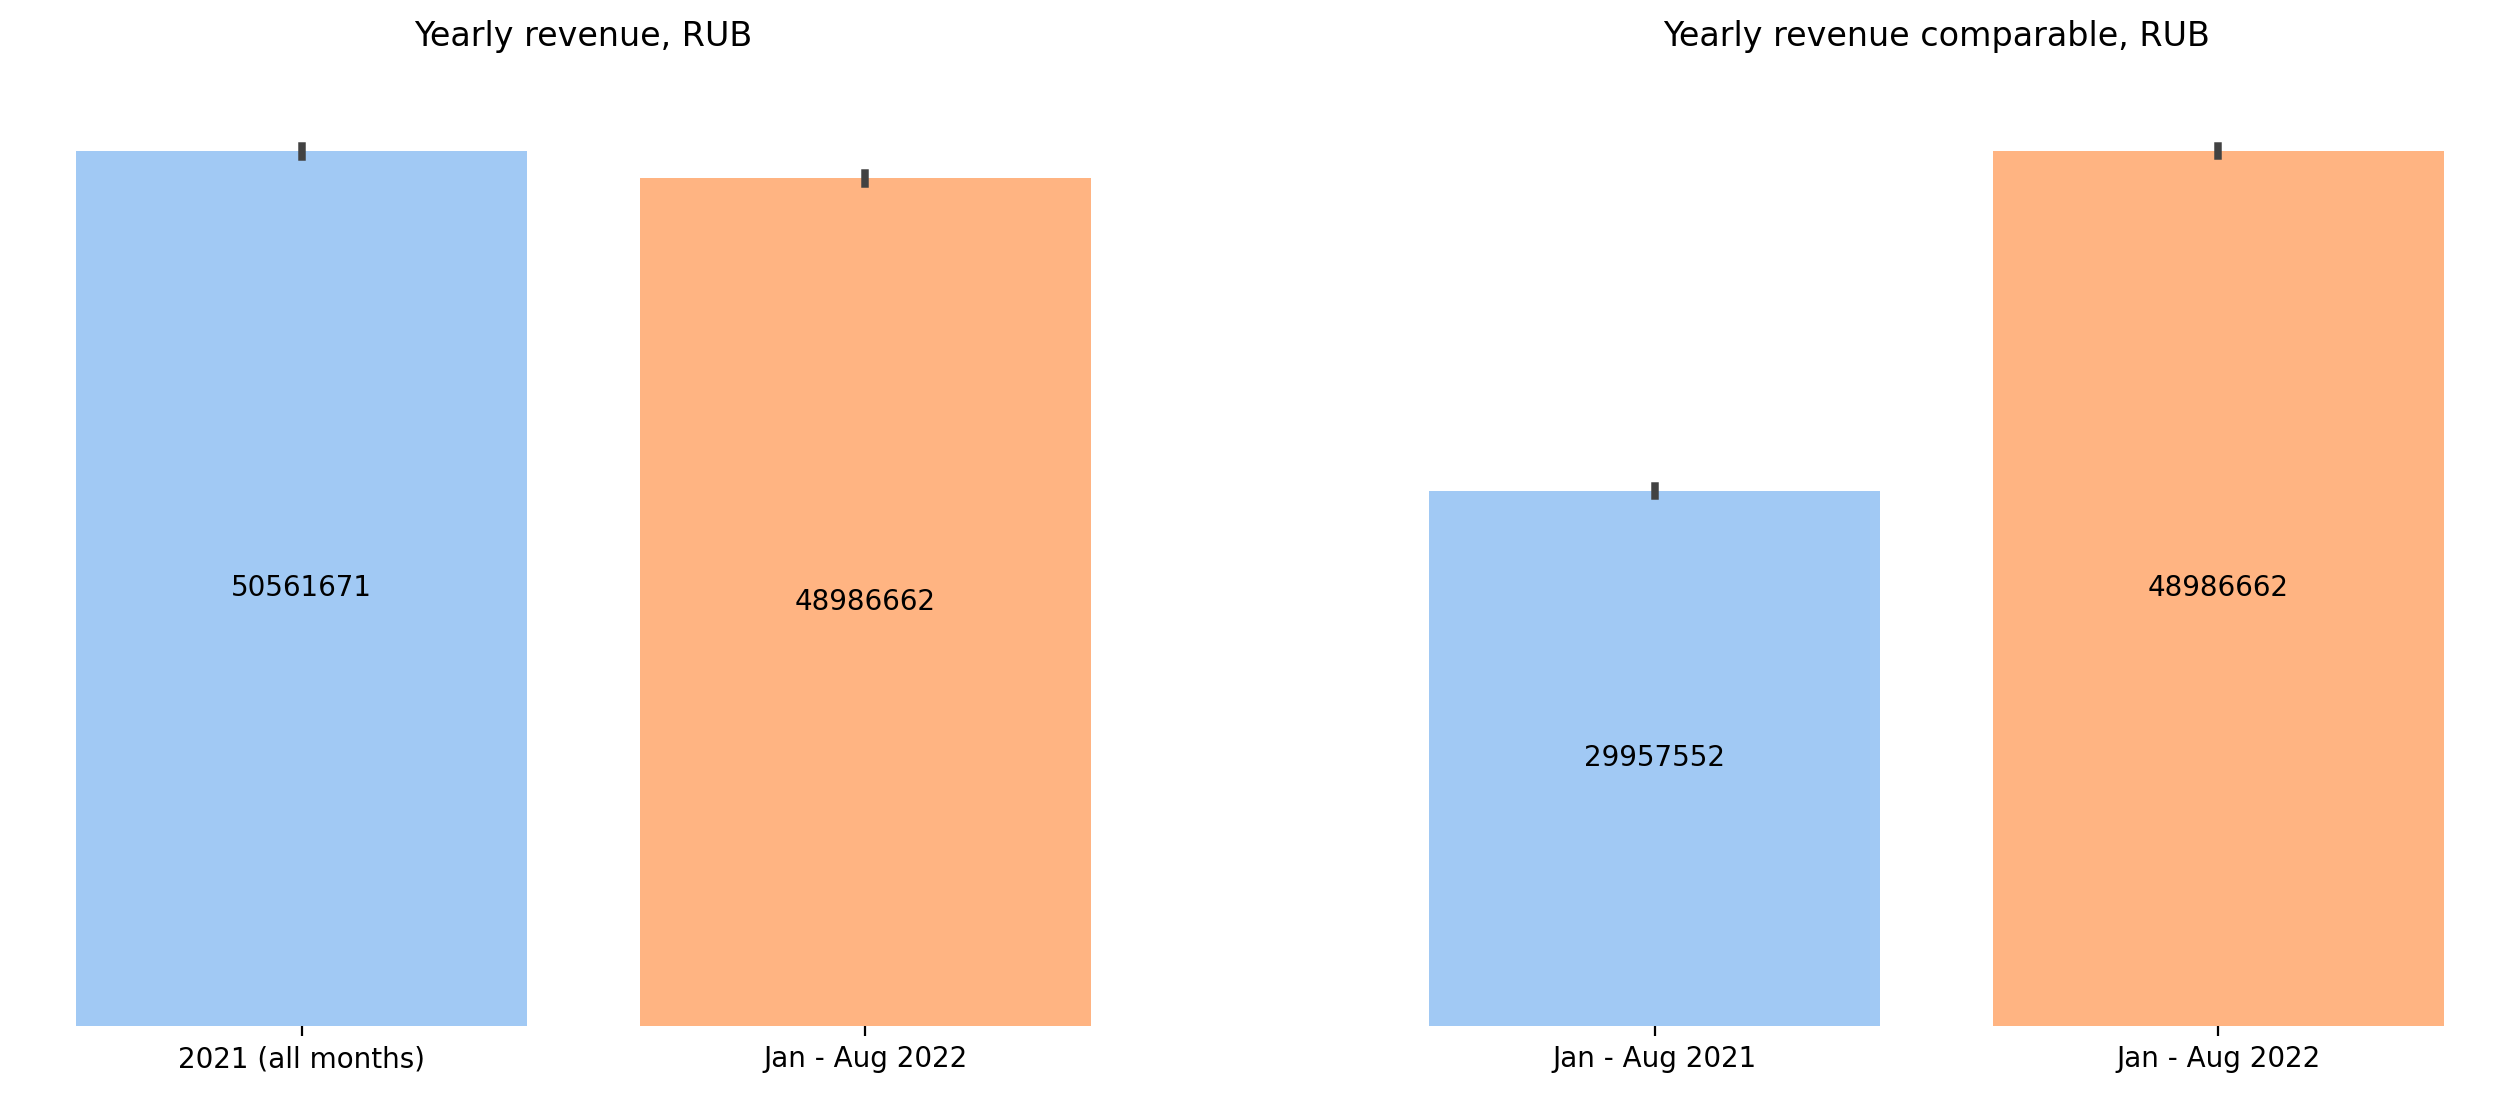

In [32]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.ticklabel_format(style='plain')
ax2.ticklabel_format(style='plain')

sns.barplot(data = df, x = 'year', y = 'service_cost',
            estimator = 'sum',
            palette = 'pastel',
            saturation = 1.2,
           ax = ax1)
ax1.set_title ('Yearly revenue, RUB', pad=20)
labels1 = ['2021 (all months)', 'Jan - Aug 2022']
ax1.set(frame_on = False, xticklabels = labels1, xlabel = '', ylabel = '')
ax1.bar_label(ax1.containers[0], fmt = '%d', label_type='center')
ax1.set_yticks([])

sns.barplot(data = df.query('month <9'), x = 'year', y = 'service_cost',
            estimator = 'sum',
            palette = 'pastel',
            saturation = 1.2,
           ax = ax2)
ax2.set_title ('Yearly revenue comparable, RUB', pad=20)
labels2 = ['Jan - Aug 2021', 'Jan - Aug 2022']
ax2.set (frame_on = False, xticklabels = labels2,  xlabel = '', ylabel = '')
ax2.bar_label(ax2.containers[0], fmt = '%d', label_type='center')
ax2.set_yticks([])

plt.show()

Let's count the monthly revenue for 2021 and 2022 and visualize it. On the plot we can see the __consistent increase in revenue (by from 1/3 to 1/2) in each month in 2022, except for August__.

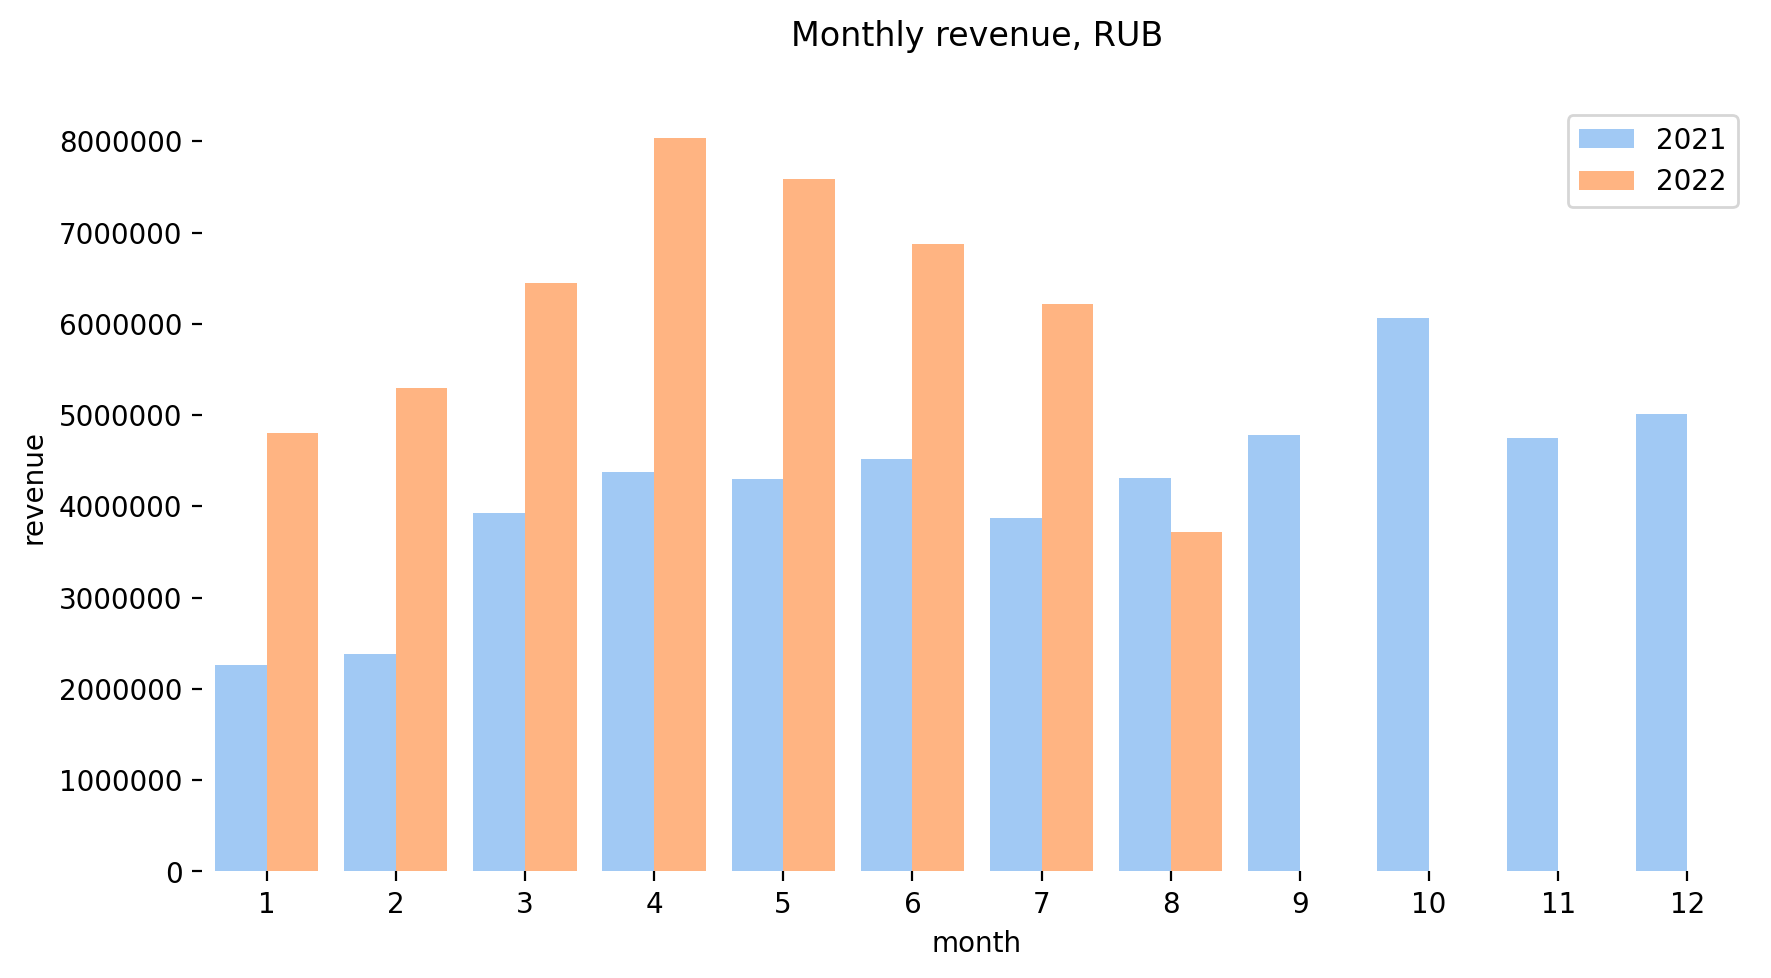

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')

sns.barplot(data = df, x = 'month', y = 'service_cost', hue = 'year',
            estimator = 'sum',
            errorbar = None,
            palette = 'pastel',
            saturation = 1.2)
ax.set (frame_on = False, xlabel = 'month', ylabel = 'revenue')
ax.legend(ncol = 1, frameon = True)

plt.title('Monthly revenue, RUB', pad=20)
plt.show()

The __increase in revenue in 2022 can root in increase of number of provided services, or in price growth (or both)__. Let's check gradually to what extent both the factors influenced the revenue.

As we can see, the number of provided services in the comparable period (from Jan to Aug) was 1.5 times higher in 2022 than in 2021 (41828 vs 27404). If to compare year-to-year, the figures of 2022 are slighly lower than in 2021 (41828 vs 45493). Thus, __most likely that the increase in number of provided services is the major factor of the increase of monthly revenue in 2022__.

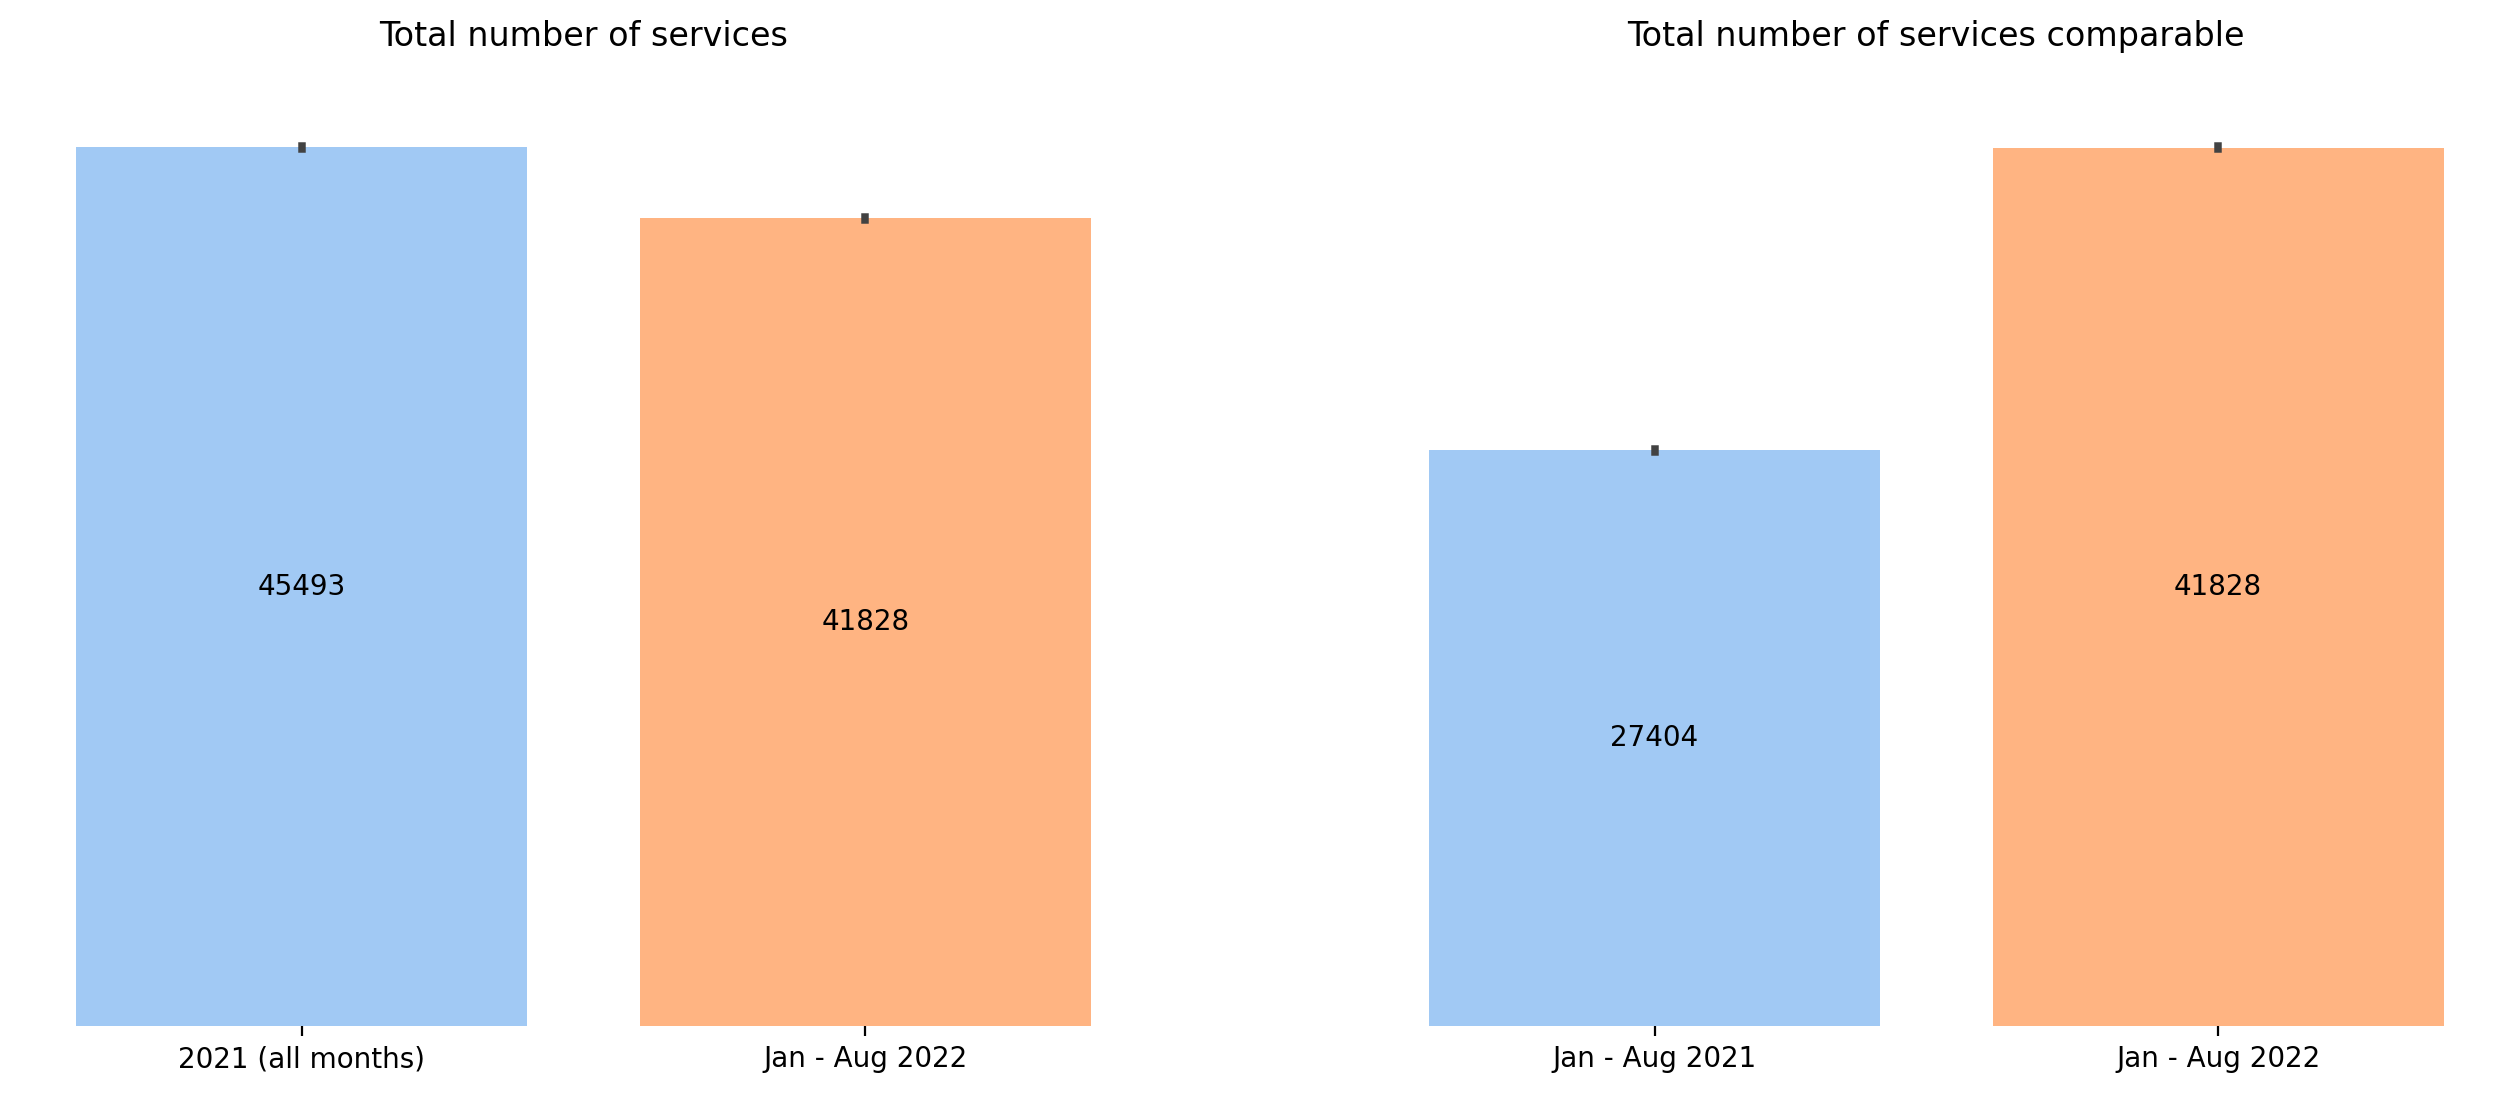

In [34]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.ticklabel_format(style='plain')
ax2.ticklabel_format(style='plain')

sns.barplot(data = df, x = 'year', y = 'service_number',
            estimator = 'sum',
            palette = 'pastel',
            saturation = 1.2,
           ax = ax1)
ax1.set_title ('Total number of services', pad=20)
labels1 = ['2021 (all months)', 'Jan - Aug 2022']
ax1.set(frame_on = False, xticklabels = labels1, xlabel = '', ylabel = '')
ax1.bar_label(ax1.containers[0], fmt = '%d', label_type='center')
ax1.set_yticks([])

sns.barplot(data = df.query('month <9'), x = 'year', y = 'service_number',
            estimator = 'sum',
            palette = 'pastel',
            saturation = 1.2,
           ax = ax2)
ax2.set_title ('Total number of services comparable', pad=20)
labels2 = ['Jan - Aug 2021', 'Jan - Aug 2022']
ax2.set (frame_on = False, xticklabels = labels2,  xlabel = '', ylabel = '')
ax2.bar_label(ax2.containers[0], fmt = '%d', label_type='center')
ax2.set_yticks([])

plt.show()

Let's now explore the to what extent the price has changed. On the plot below we can see, that __the price increased by 70 rub (~ 6%) on average. That makes it less impactful factor compared to the increase of the demand for the services__ (by ~ 50% during Jan - Aug 2022).

In [35]:
avg_service_cost = df.pivot_table(
    index = ['category', 'year'],
    values = 'service_unit_cost',
    aggfunc = 'mean'
).reset_index()
avg_service_cost.head(2)

category  year  service_unit_cost
0  doctor visit  2021        1429.115734
1  doctor visit  2022        1488.452353

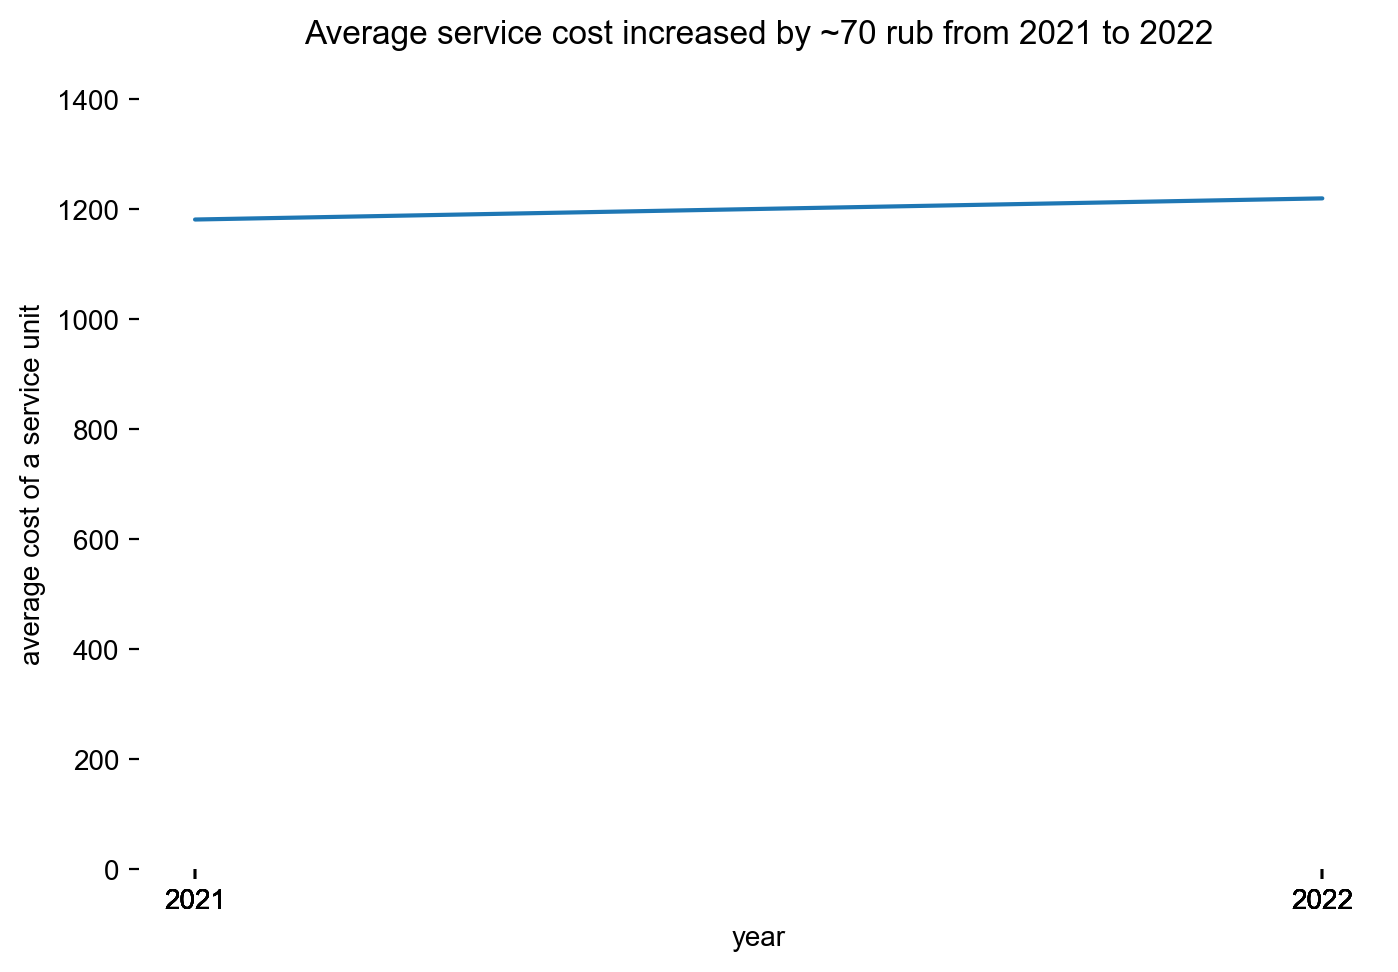

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style = 'white')

sns.lineplot(data = avg_service_cost,
             x = 'year', y = 'service_unit_cost',
            errorbar = None)
ax.set_xticks(avg_service_cost['year'], minor=False)
ax.set(ylabel = 'average cost of a service unit', frame_on = False,  ylim = (0, 1400))
ax.set_title('Average service cost increased by ~70 rub from 2021 to 2022', pad = 20)

plt.show()

### 3.2 Services ###

Let's create a pivot __table category_service_cost__ with the accumulated information about number and total cost of services for each category in 2021 and 2022.

In [37]:
category_service_cost = df.pivot_table(
    index = ['category', 'year'],
    values = 'service_cost',
    aggfunc = ['mean', 'median', 'count']).reset_index()
category_service_cost.columns = ['category', 'year', 'avg_cost', 'median_cost', 'count']
category_service_cost = category_service_cost.sort_values('avg_cost', ascending = False)
category_service_cost.head(2)

category  year     avg_cost  median_cost  count
3  investigations  2022  1859.103582         1980   5416
2  investigations  2021  1842.984224         1890   5261

The __most demanded services are the consultation of a doctor and different kinds of test (like blood, urine, etc.)__. Less popular yet significant groups are physio- and manual therapy, massage, special tests (e.g. US, MRI) and outpatient services. Surgeries is not the main specialization of the center.

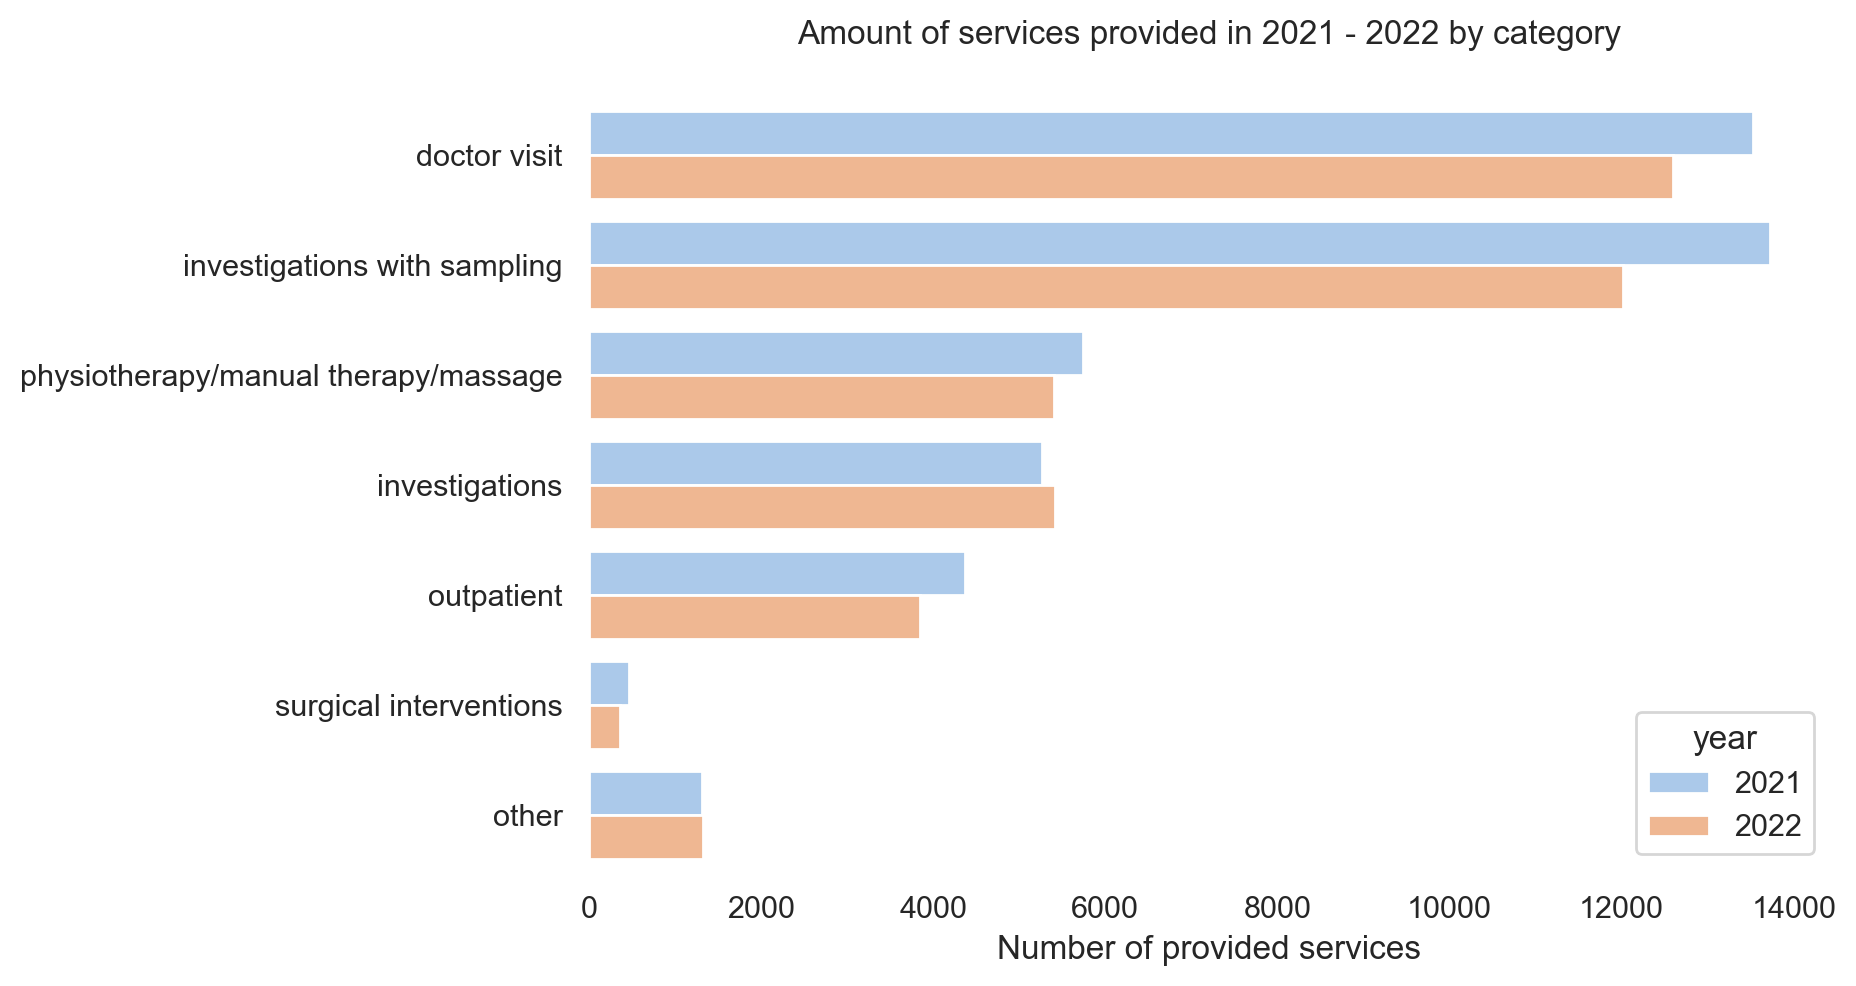

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style = 'whitegrid')

sns.barplot(data = category_service_cost, y = 'category', x = 'count',
            hue = 'year',
            palette = 'pastel', 
           order = ['doctor visit', 'investigations with sampling',
       'physiotherapy/manual therapy/massage', 'investigations', 'outpatient',
                    'surgical interventions', 'other'])
ax.legend = (['Whole 2021','Jan - Aug 2022'])
ax.set_title('Amount of services provided in 2021 - 2022 by category', pad = 20)
ax.set(frame_on = False, ylabel = '', xlabel = 'Number of provided services')


plt.show()

Below are the two plots reflecting changes in average cost of a service depending on the category. __Most popular categories demonstrated a moderate growth in price with up to maximum 7.9 %__ (outpatient services). Physio- and manual therapy and massage even decreased slightly in price. The cost of an average service from the __'Other' category (<3 % of all services), however, grew by a quarter__.

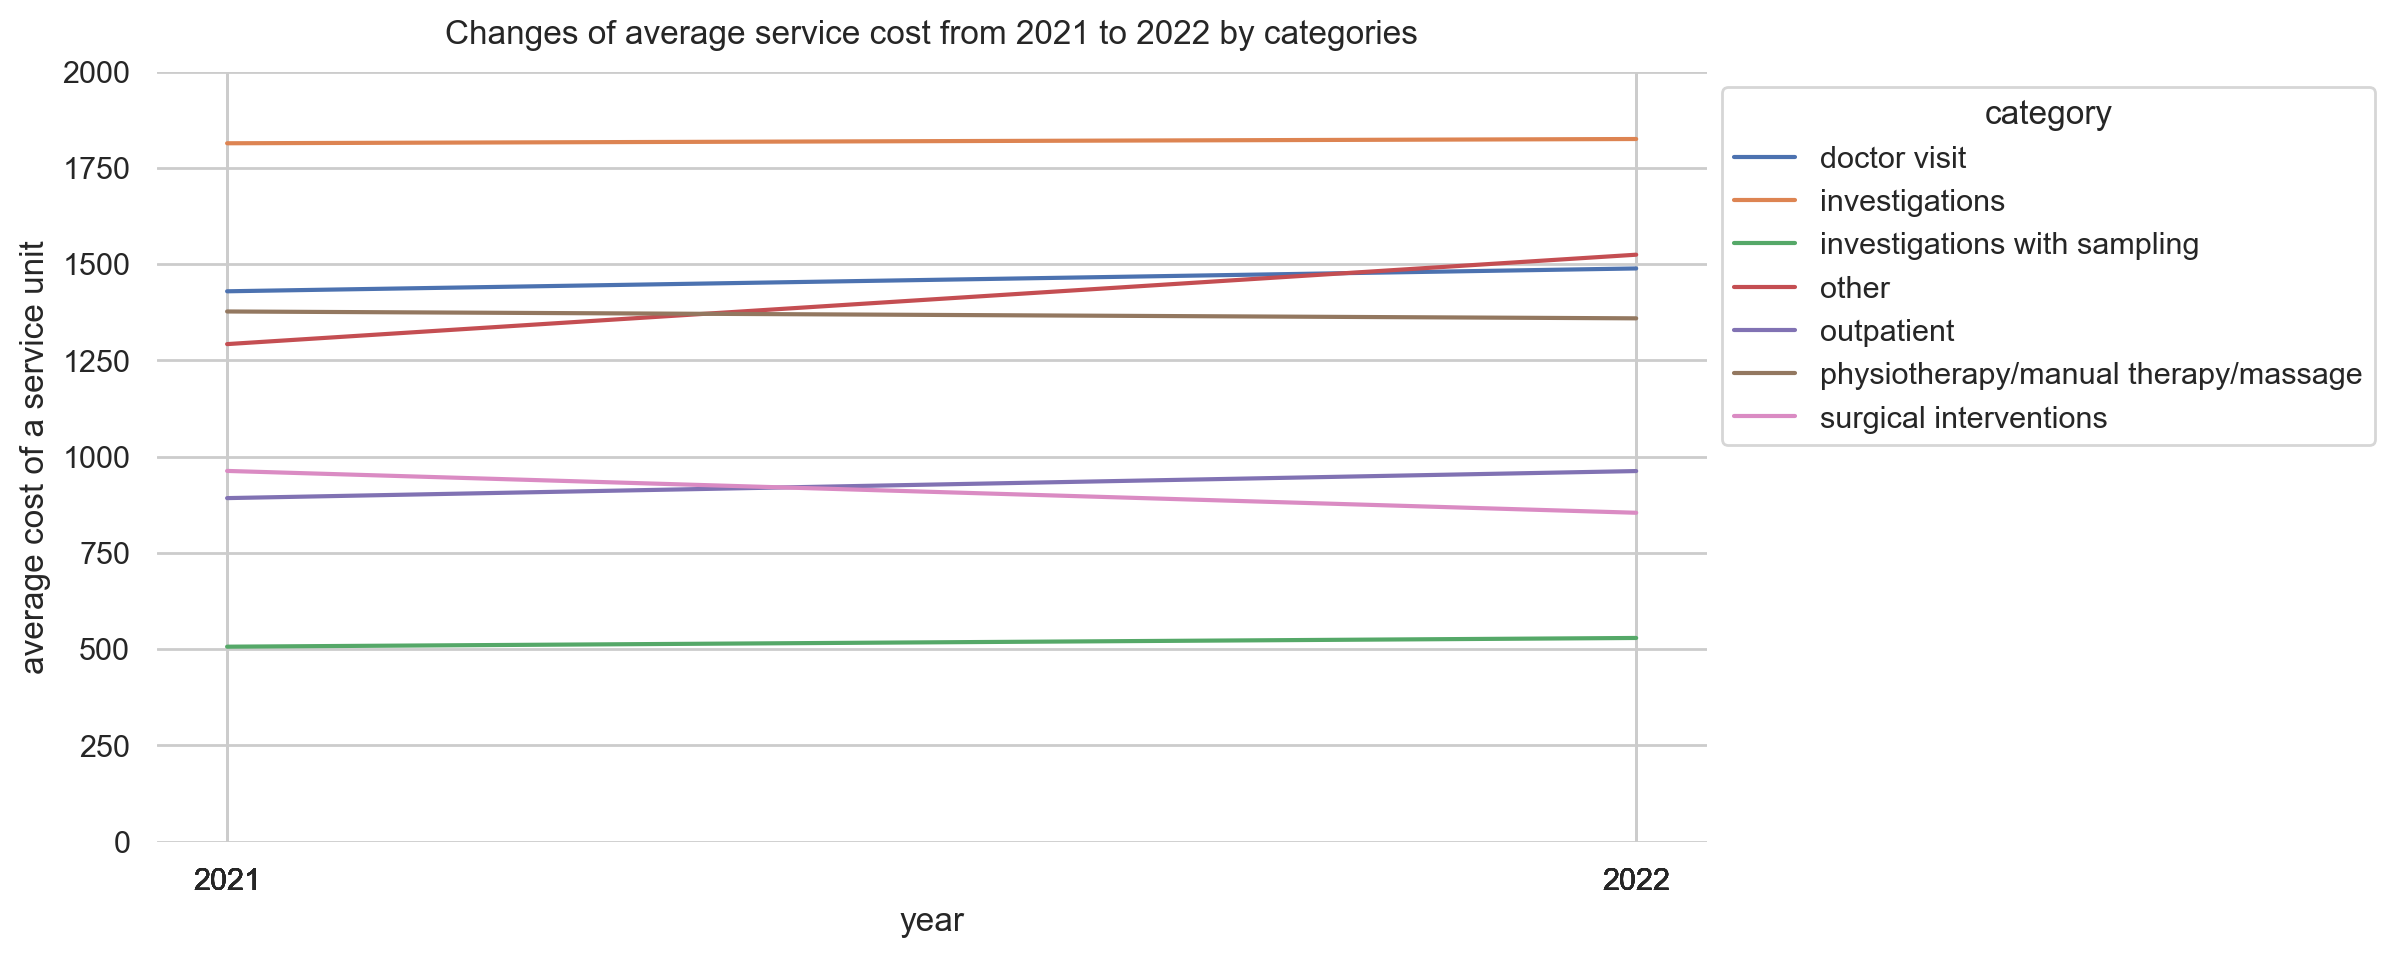

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_theme(style = 'white')

sns.lineplot(data = avg_service_cost,
             x = 'year', y = 'service_unit_cost', hue = 'category')
ax.set_xticks(avg_service_cost['year'], minor=False)
ax.set(ylabel = 'average cost of a service unit', frame_on = False, ylim = (0, 2000))
ax.set_title('Changes of average service cost from 2021 to 2022 by categories', pad = 10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

In [40]:
price_diff = (
    df.pivot_table(index = 'year', columns = 'category', values = 'service_unit_cost', aggfunc = 'mean')
    .T
    .reset_index()
)
price_diff['diff,%'] = round((price_diff[2022] - price_diff[2021])/price_diff[2021]*100, 1)
price_diff.head(2)

year        category         2021         2022  diff,%
0       doctor visit  1429.115734  1488.452353     4.2
1     investigations  1813.581638  1824.644572     0.6

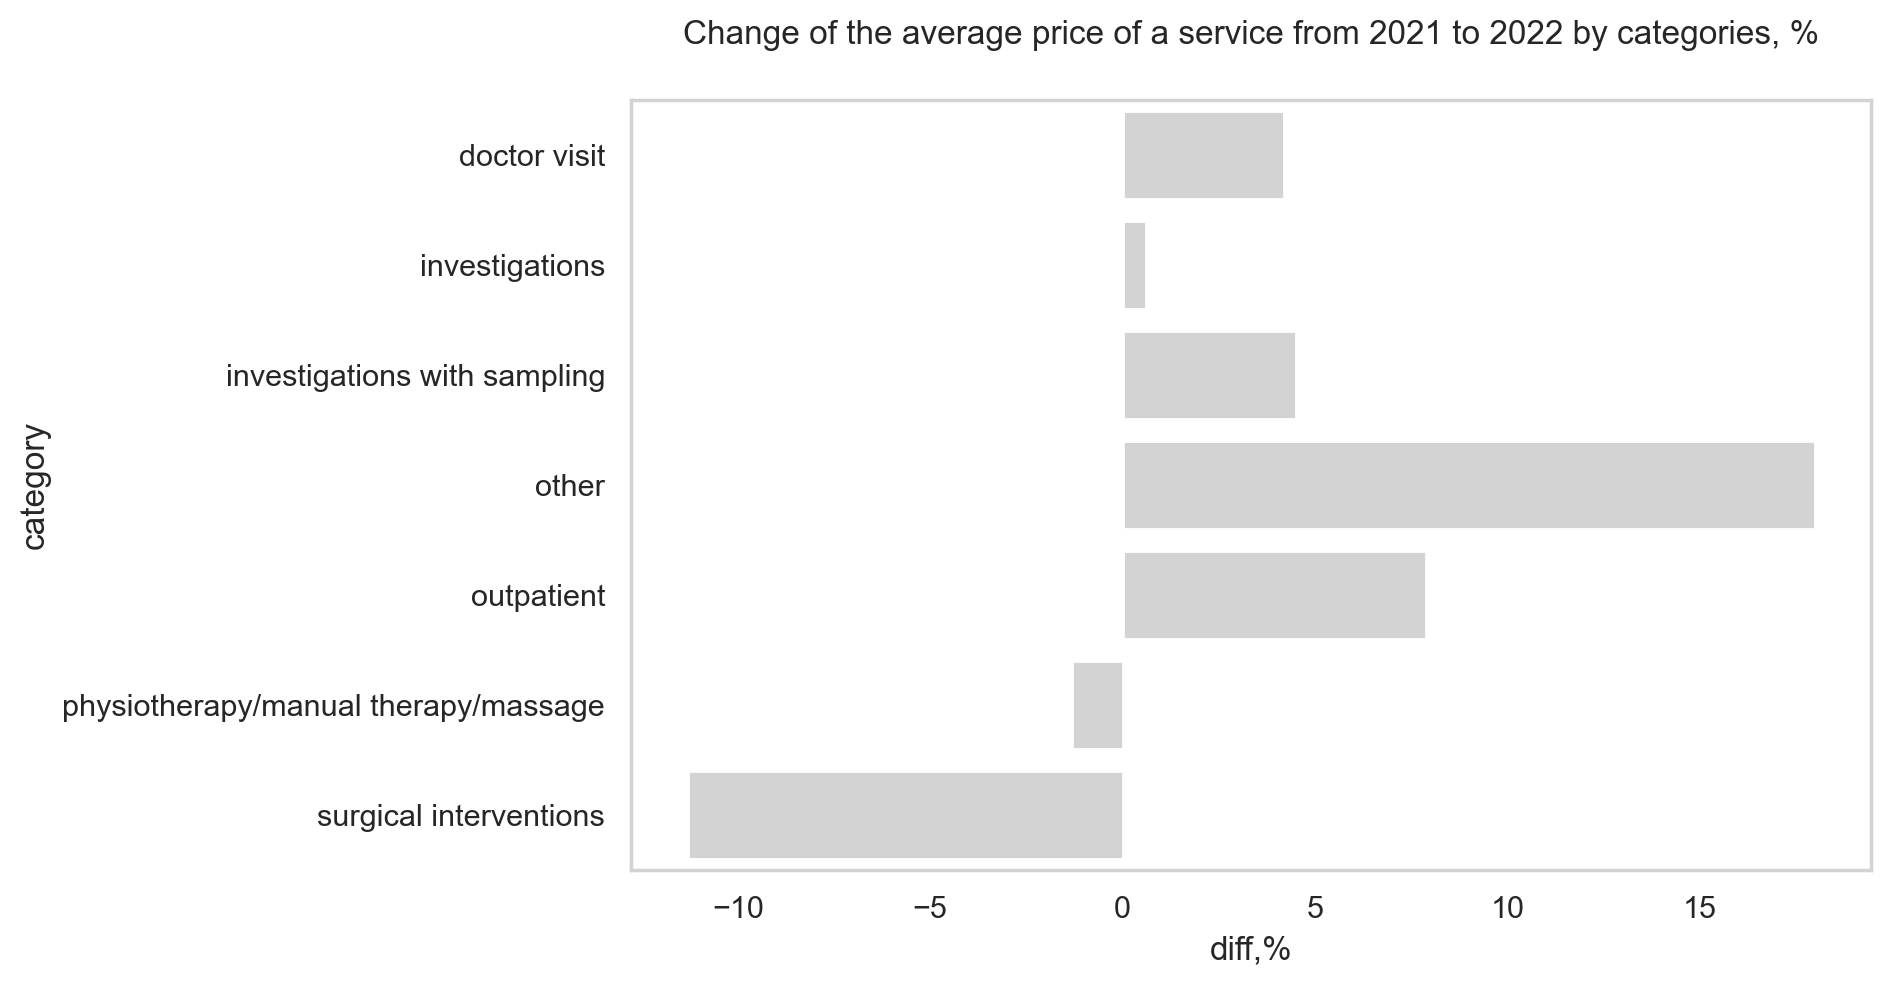

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(data = price_diff, x = 'diff,%', y = 'category', color = 'lightgrey')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color('lightgrey')
ax.set_title('Change of the average price of a service from 2021 to 2022 by categories, %', pad = 20)
plt.show()

The __most expensive category of services are tests like US, MRI, x-rays, ECG with the median cost almost 2,000 rub. A doctor's visit costs 1,500 on average.__ The average cost of the rest is on the level of 800 – 1,300 rub, except for common tests with average price ~ 500 rub.

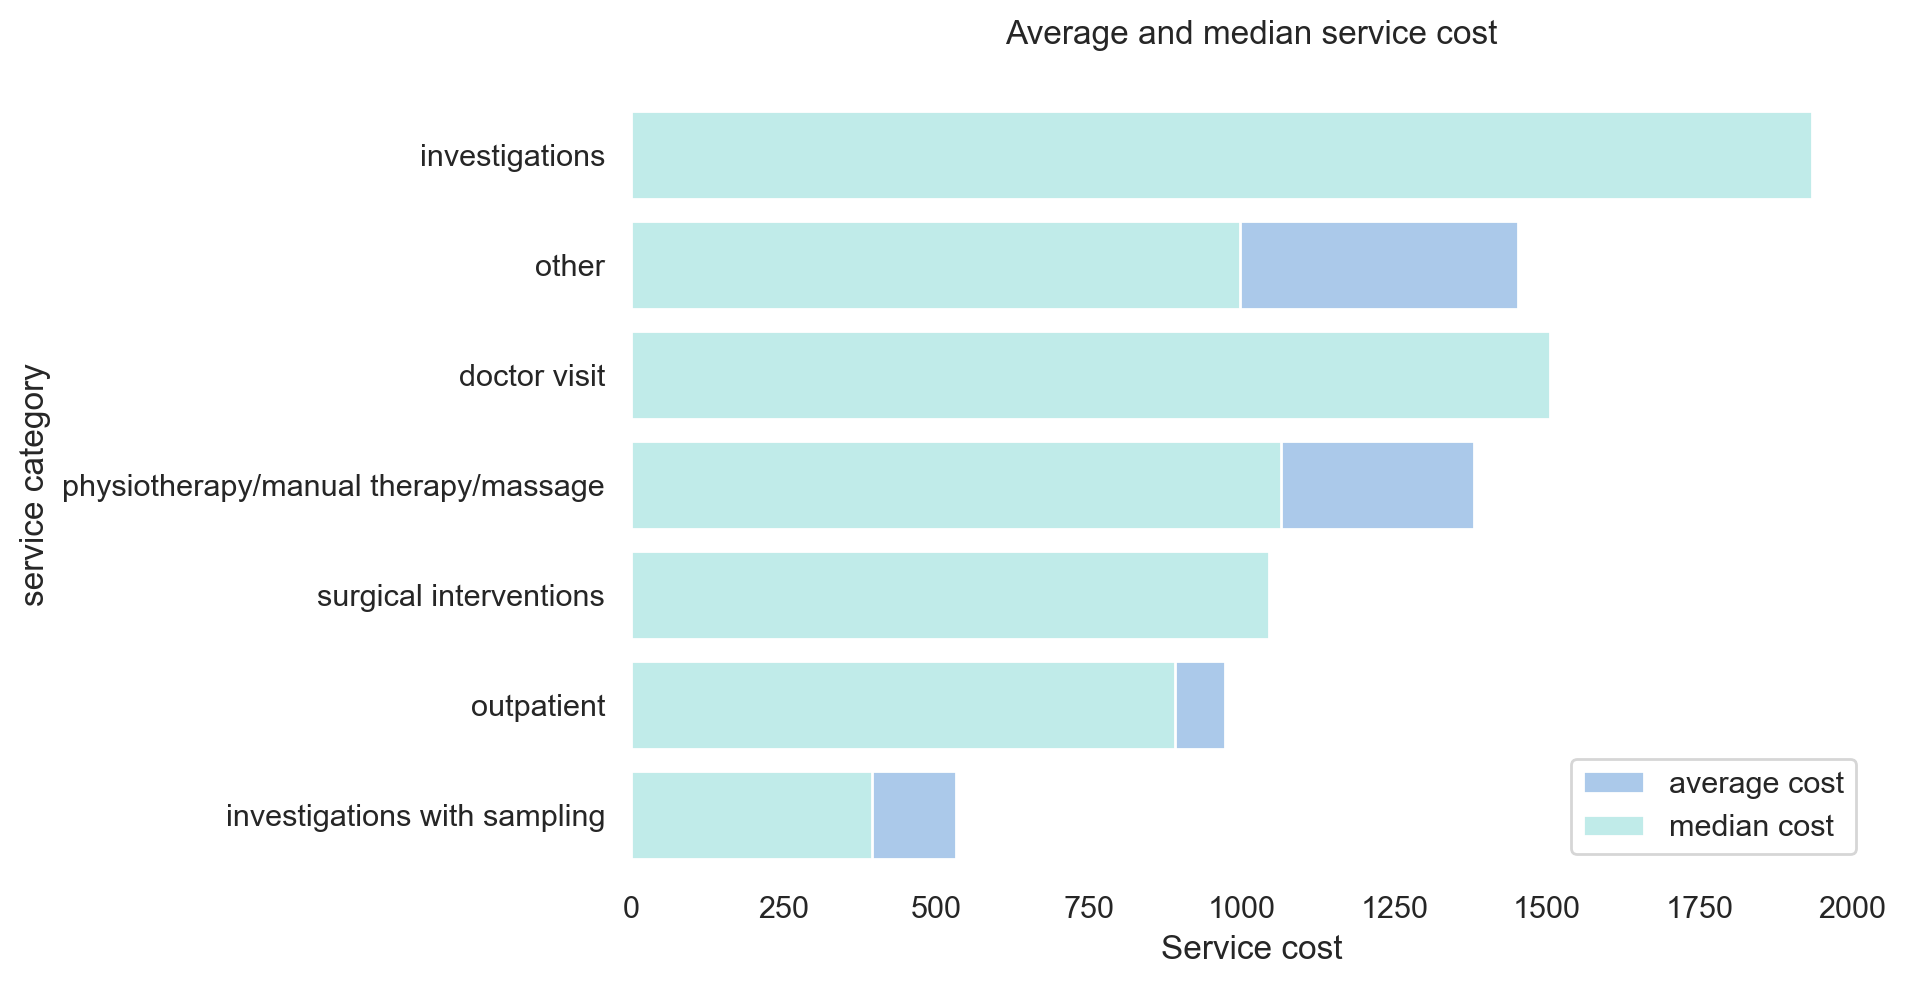

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style = 'whitegrid')

sns.set_color_codes('pastel')
sns.barplot(data = category_service_cost,
            x = 'avg_cost', 
            y = 'category', 
            color = 'b', 
            label = 'average cost',
            errorbar=None)

sns.set_color_codes('pastel')
sns.barplot(data = category_service_cost, 
            x = 'median_cost', 
            y = 'category', 
            color = 'c', 
            label = 'median cost',
            errorbar=None)

ax.set (frame_on = False, xlabel = 'Service cost', ylabel = 'service category')
plt.title('Average and median service cost', pad=20)
ax.legend(ncol = 1, frameon = True)

plt.show()

The graph below gives a deeper insight into the __cost of the services__:
- cost of __most services did not exceed 4000 rub__;
- we can see much broader distribution of prices for special tests and physiothepapy and more narrow one for blood-like tests and visits to doctors;
- basically, __the cheapest services were simple tests (e.g. blood or urine), most expensive were special tests (US, MRI, etc.), visits to doctors held the mid-position__.

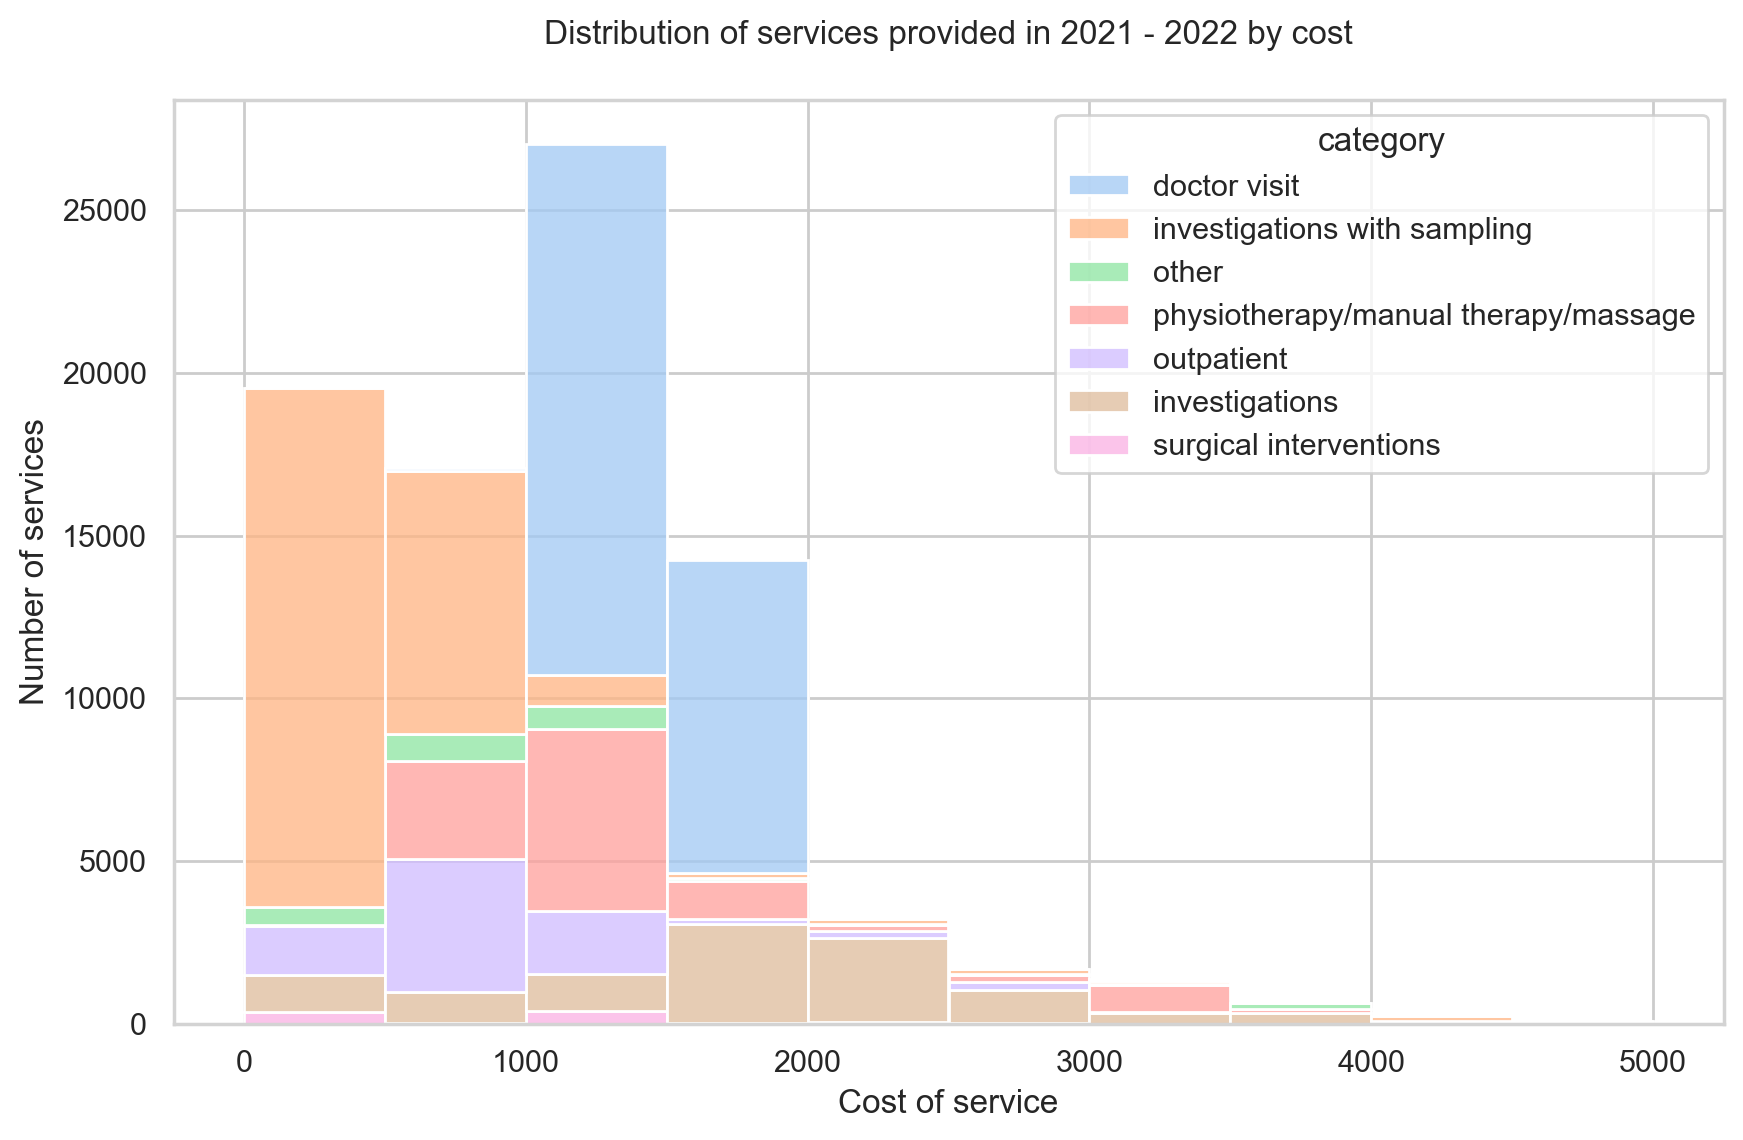

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style = 'white')

sns.histplot(df, hue = 'category', x = 'service_unit_cost',
             binrange = (0, 5000), bins = 10,
             multiple = 'stack',
             palette = 'pastel')
ax.set_title('Distribution of services provided in 2021 - 2022 by cost', pad = 20)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color('lightgrey')
ax.set(ylabel = 'Number of services', xlabel = 'Cost of service')
plt.show()

### 3.2 Clients ###

__4488 unique clients__ bought the center's services in 2021 and 2022. In 2022, for less than a year 2757 unique clients visited the center compared to 2515 clients during the whole year of 2021. __Average client visited the center 6.75 times and paid 22,181 rub__ during the period. __57% of clients are women and 43% are men__. 

In [44]:
print(len(df['insured'].unique()), 'of unique clients') 
print (round(df['service_cost'].sum()/ len(df['insured'].unique())), 'rub – average amount paid in 2021-2022')

4488 of unique clients
22181 rub – average amount paid in 2021-2022


In [45]:
visits_count = df.groupby('insured').agg({'date':'nunique'})
print(visits_count['date'].sum()/len(visits_count), 'visits per average client in 2021-2022')

6.75 visits per average client in 2021-2022


In [46]:
unique_clients_gender = df.groupby('insured').agg({'sex':'first'})
unique_clients_yearly = df.groupby('year').agg({'insured':'nunique'}).reset_index()

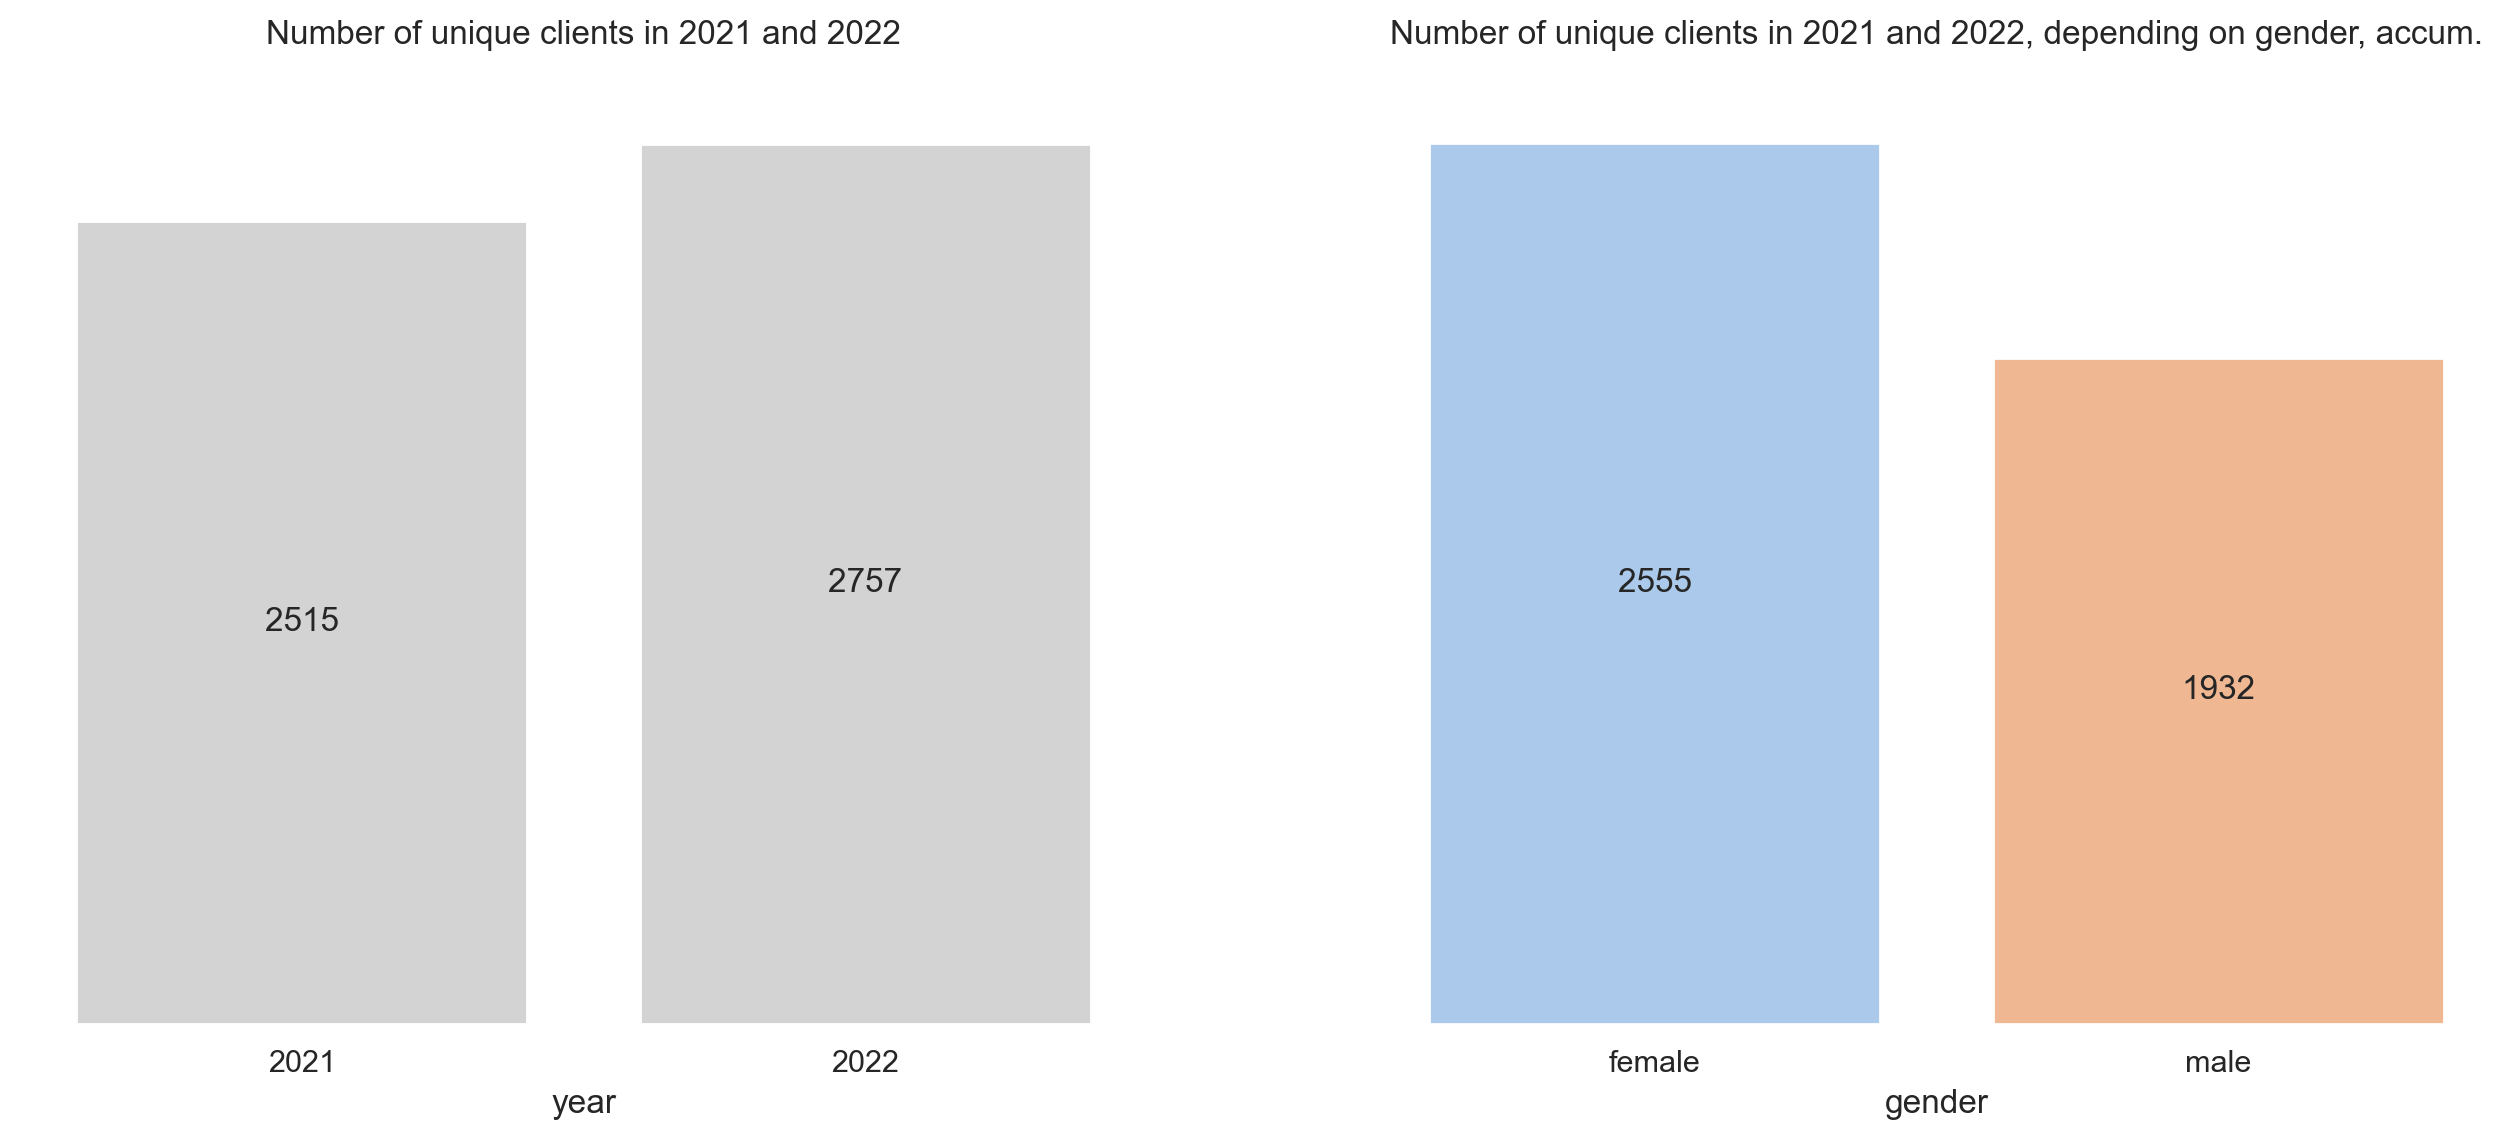

In [47]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(ax = ax1, data = unique_clients_yearly, x = 'year', y = 'insured', color = 'lightgrey')
ax1.set_title ('Number of unique clients in 2021 and 2022', pad = 20)
ax1.bar_label(ax1.containers[0], label_type='center')
ax1.set(frame_on = False, ylabel = '')
ax1.set_yticks([])

sns.countplot(ax = ax2, data = unique_clients_gender, x = 'sex', palette = 'pastel')
ax2.bar_label(ax2.containers[0], label_type='center')
ax2.set_title ('Number of unique clients in 2021 and 2022, depending on gender, accum.', pad = 20)
ax2.set(xlabel = 'gender', frame_on = False, ylabel = '')
ax2.set_yticks([])

plt.show()

### Summary on General analysis: ###

#### Clients: ####
- The medical center provided services to __4488 unique clients__ from Jan 2021 to Aug 2022;
- __57% of clients are women and 43% are men__ (2555 and 1932, respectively);
- __The flow of the unique clients increased during Jan 2022 - Aug 2022__ compared to the whole 2021 (2757 vs 2515)
- The average client __visited the center 6.75 times__ and __brought 22,181 rub__ during the period.

#### Revenue: ####
- __Overall revenue is 99.5M rub__, spread almost evenly between the whole 2021 and eight months of 2022 (50.56M and 49.98 respectively);
- Monthly distribution of revenue shows the __consistent increase (by from 1/3 to 1/2) in each month in 2022__, except for August;
- __Revenue increase was mostly due to the increase of the demand for services than the increase of the price__ for the services: the former grew 1.5 times (Jan-Aug 2022 to Jan-Aug 2021) and the latter grew by an average of 5%.

#### Services: ####
- The center offered __875 kinds__ of services during the period
- The center focuses on __consultations with doctors, tests and diagnostics, outpatient treatment and non-invasive types of treatment__.
- Surgeries are not in great demand in the center
- __90% of services cost less than 2,000 rub__
- The services that could cost more than 2,000 are special tests (e.g. MRI) and non-invasive types of treatment (e.g. physiotherapy) and outpatient treatment.

### Hypotheses ###

We figured out that the revenue increased significantly in 2022 compared to 2021. To explore the nature of that change we need to check 3 hypotheses:

#### I) Clients flow contributed more to the increase of revenue than cost of visit did ####

#### II) Age and gender are related to the revenue increase of revenue in 2022 ####
Here we assume that expecting the coming effect of sanctions clients aged 20 - 60 (main workforce) decided to resolve heath issues before the price growth. As to the gender, women are considered to care more about health, so let's check if they visited the center more frequently in 2022 and spent more money than the men.

#### III) Services tighly connected with import impacted more on revenue than the others ####
Here we expect that price for services requiring expensive equipment (e.g. blood tests, MRI, US, ECG) increased more noticeably than, say, prices for the consultations.

## 4. Hypothesis I: Clients flow contributed more to the increase of revenue than change in cost of visit ##

To check the Hypothesis I let's explore how changed both prices and the customer flow, 2021 and 2022 compared.

Let's make a table __unique_visits__ reflecting:
- unique clients
- unique date of visits
- month and year of the unique visits
- cost of the services paid during the unique visit

In [48]:
unique_visits = (
    df.groupby(['insured', 'date'])
    .agg({'id': 'first', 'month': 'first', 'year': 'first', 'service_cost': 'sum'})
    .reset_index()
)    
unique_visits.head()

insured        date           id  month  year  service_cost
0   125073  2021-01-11  30268217203      1  2021          2321
1   125073  2021-01-16  30268217503      1  2021          1827
2   125073  2021-01-17  30268217603      1  2021          3813
3   125073  2021-01-23  30268217803      1  2021          1313
4   125073  2021-09-21  31408907803      9  2021          2940

The __average cost of services increased by 6.5% in 2022 compared to 2021__. On the graph below we can see that the __most visible growth was observed for services for 1500 - 2500 rub__. This can either mean the increased demand or/and the price increase for services in the particular price range.

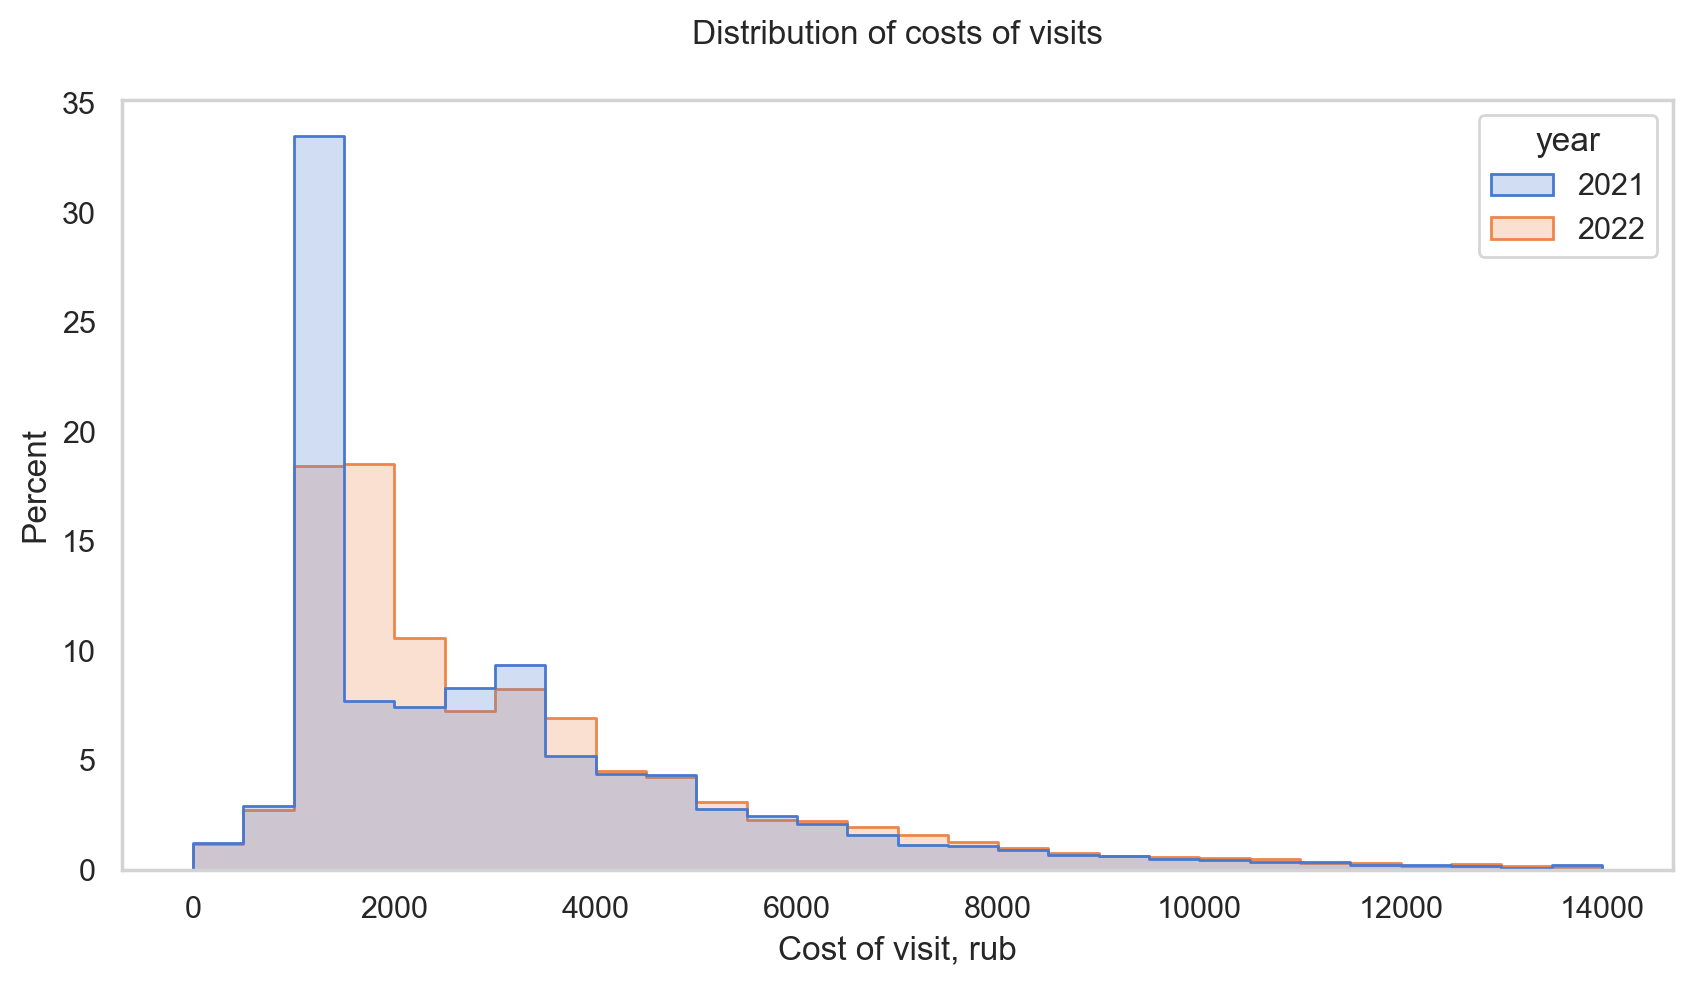

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(unique_visits.query('month < 9'),
             x = 'service_cost',
             hue = 'year',
             binwidth = 500, binrange = (0, 14000),
             palette = 'muted',
             element = 'step',
             stat = 'percent',
            common_norm = False)
ax.set_title('Distribution of costs of visits', pad = 20)
ax.set(xlabel = 'Cost of visit, rub')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color('lightgrey')

plt.show()

Average cost of visit in 2021:

In [50]:
unique_visits.query('year == 2021')['service_cost'].sum() / len(unique_visits.query('year == 2021'))

3187.9994325346784

Average cost of visit in 2022:

In [51]:
unique_visits.query('year == 2022')['service_cost'].sum() / len(unique_visits.query('year == 2022'))

3393.8382984619648

% of change of the cost of visit

In [52]:
3394/3187*100 - 100

6.49513649199875

Having compared the monthly distribution of cost of visits, we __do not see any dramatic increase in average cost of visit in 2022__. 

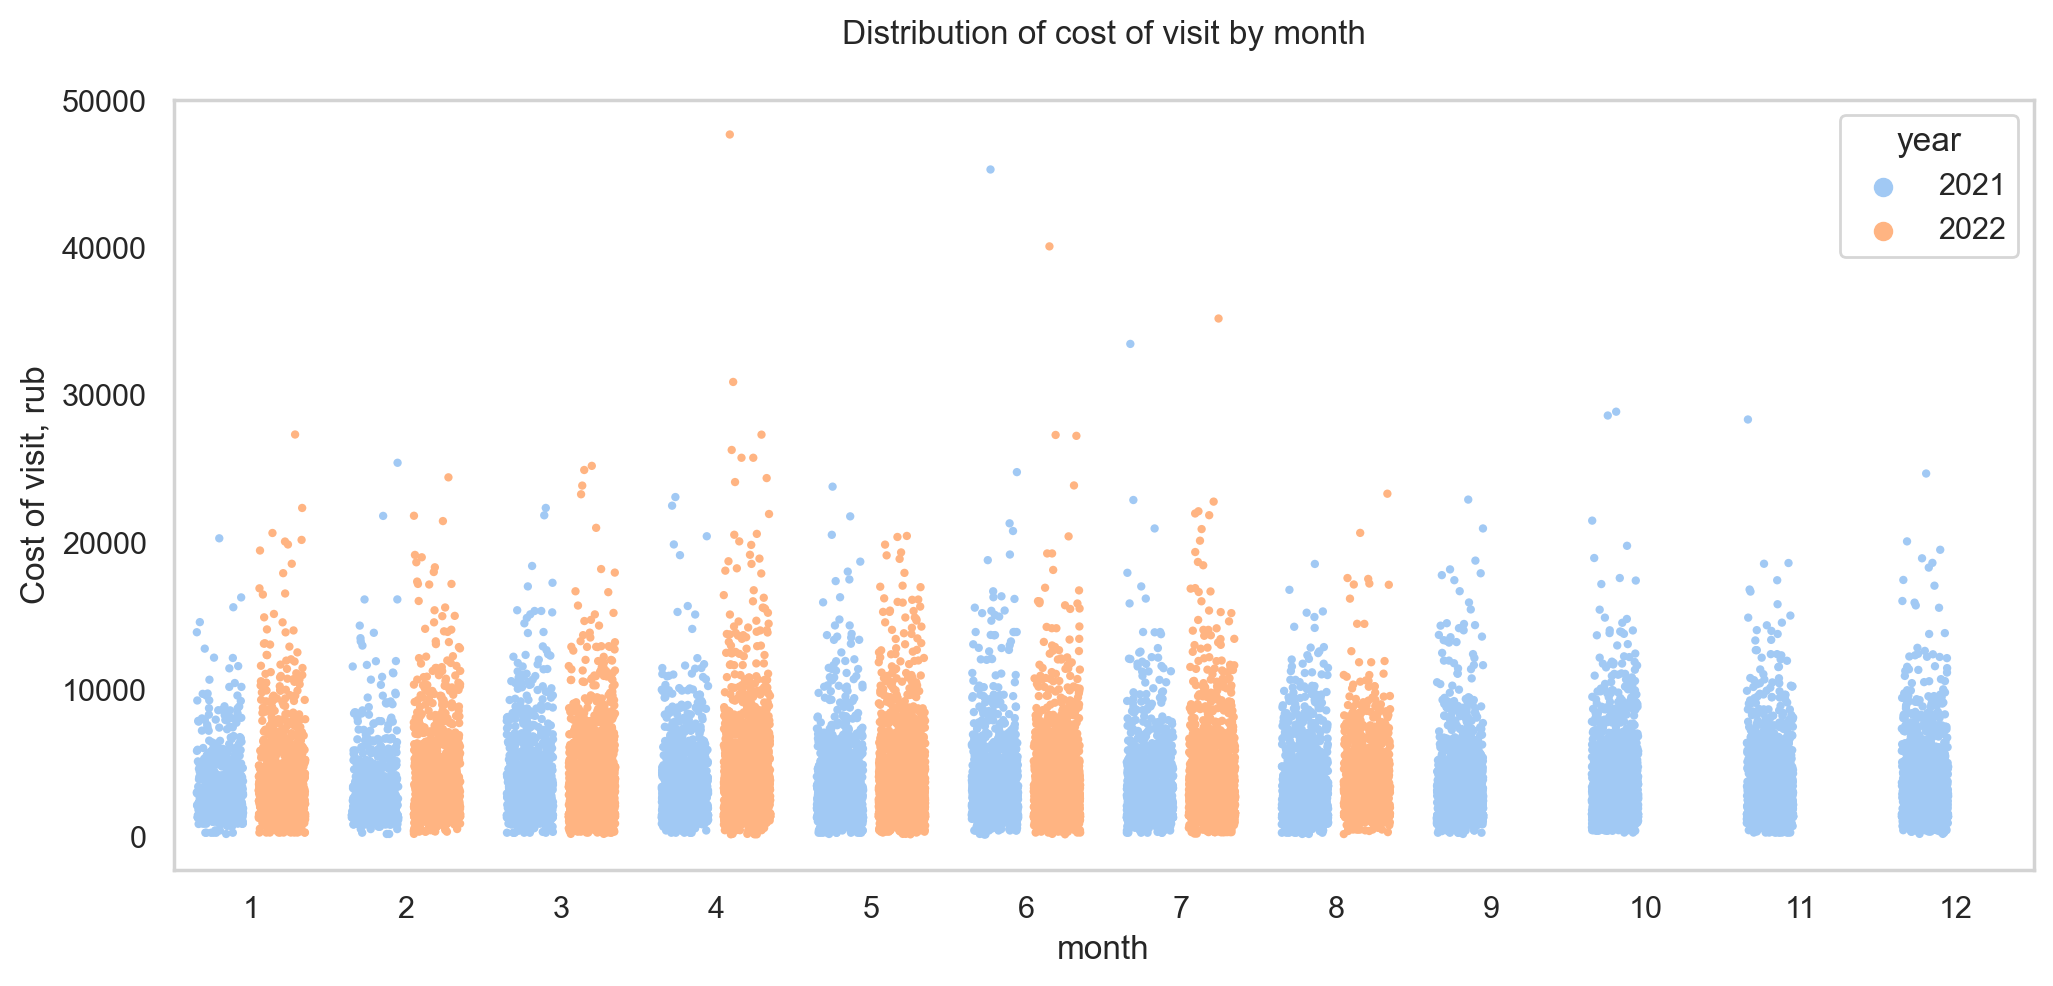

In [53]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.stripplot(unique_visits, x = 'month', y = 'service_cost', hue = 'year', palette = 'pastel', size = 3,
              dodge = True, jitter = 0.3)
ax.set(ylabel = 'Cost of visit, rub')
ax.set_title('Distribution of cost of visit by month', pad = 20)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color('lightgrey')
    
plt.show()

Unlike the prices, th number of __visits increased signficantly in 2022__ (see _"Distribution of visits in 2021 and 2022"_). The above mentioned drop in August 2022 is explained by the drop of number of visits.

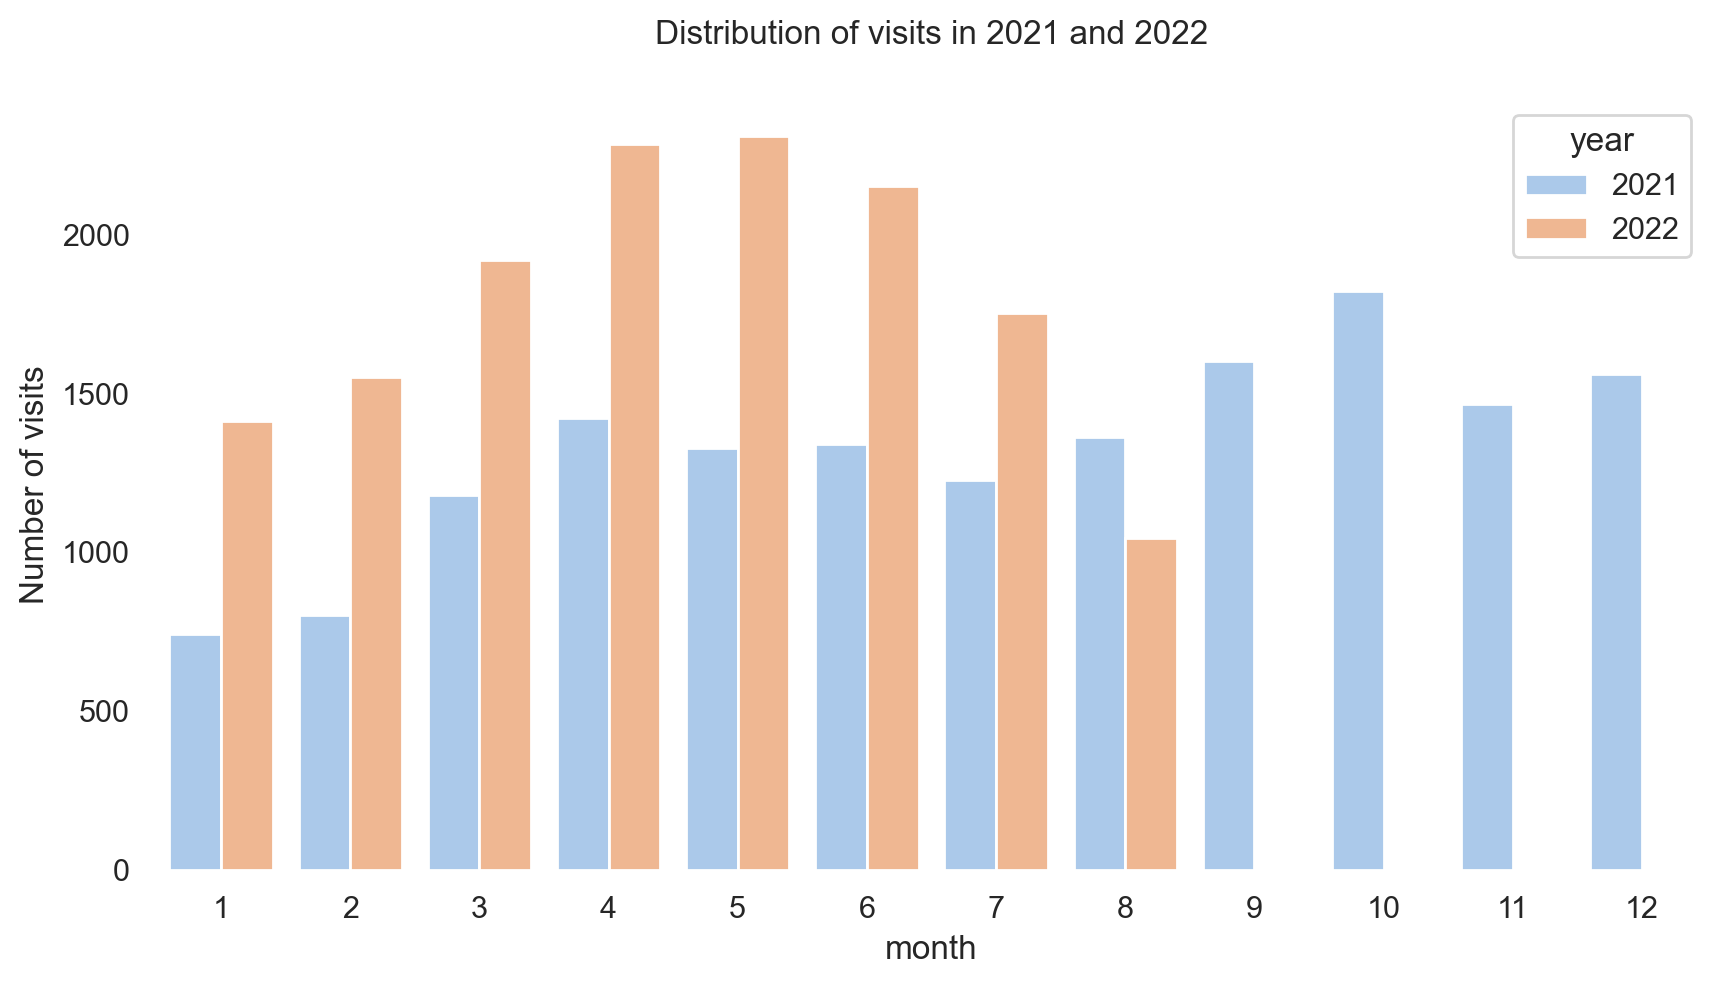

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(unique_visits, x = 'month', hue = 'year', palette = 'pastel')
ax.set_title('Distribution of visits in 2021 and 2022', pad = 20)
ax.set(frame_on = False, ylabel = 'Number of visits')
plt.show()

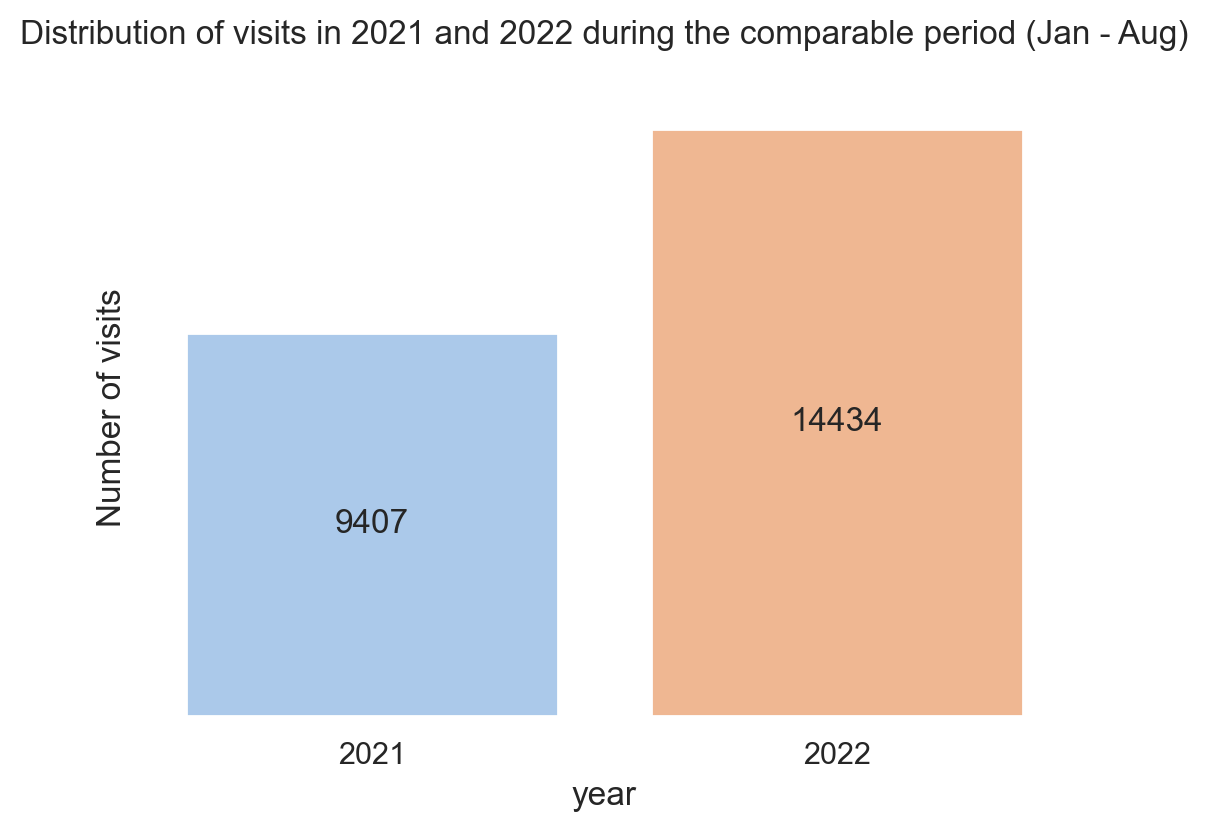

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.countplot(unique_visits.query('month < 9'), x = 'year', palette = 'pastel')
ax.set_title('Distribution of visits in 2021 and 2022 during the comparable period (Jan - Aug)', pad = 20)
ax.bar_label(ax.containers[0], label_type='center')
ax.set(frame_on = False, ylabel = 'Number of visits')
ax.set_yticks([])

plt.show()

Let's __check if the increase in visits in 2022 could be provoked by seeing doctors more often or buying more services__.

First, we'll check if the increase is only about the visits or the number of unique clients also rose. In the Section 3 we saw that the center provided services to __a bigger number of clients in 2022 compared to 2021__ (2757 compared to 2515). __If we use comparable data__ (8 months for both years), __the difference is even bigger (2757 in 2022 compared to 1733 in 2021)__ - see the chart below.

In [56]:
unique_clients_comparable = df.query('month <9').groupby('year').agg({'insured':'nunique'}).reset_index()

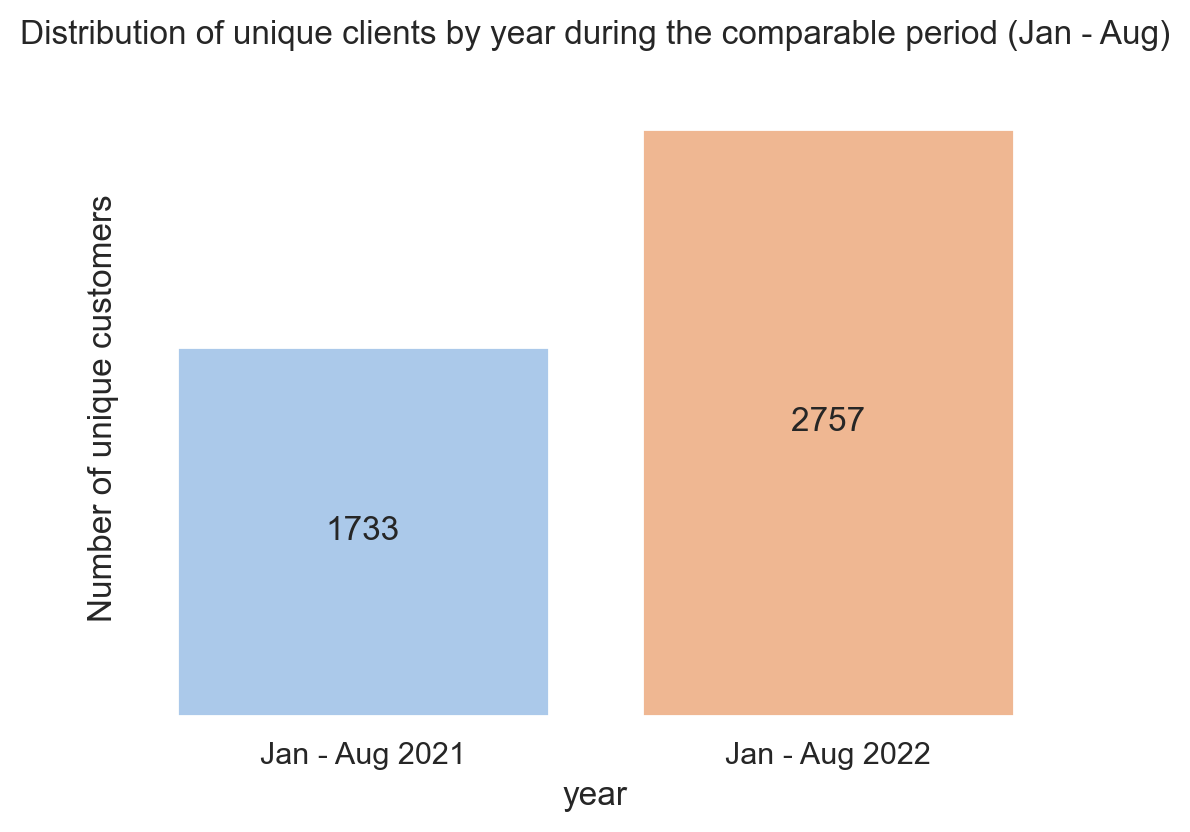

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(unique_clients_comparable, x = 'year', y = 'insured', palette = 'pastel')
ax.bar_label(ax.containers[0], label_type='center')
labels2 = ['Jan - Aug 2021', 'Jan - Aug 2022']
ax.set_title('Distribution of unique clients by year during the comparable period (Jan - Aug)', pad = 20)
ax.set(ylabel = 'Number of unique customers', xticklabels = labels2, frame_on = False)
ax.set_yticks([])

plt.show()

Below id the plot with the montly distribution of the clients. As we see, it looks almost the same as the above plot with the monthly distribution of visits, which means that the __increase in visits arose from the increase in the customer flow.__

In [58]:
unique_clients_monthly = df.pivot_table(index = ['insured', 'year', 'month'],
                                        values = 'service_cost', aggfunc = 'sum').reset_index()
unique_clients_monthly.head(2)

insured  year  month  service_cost
0   125073  2021      1          9274
1   125073  2021      9          9746

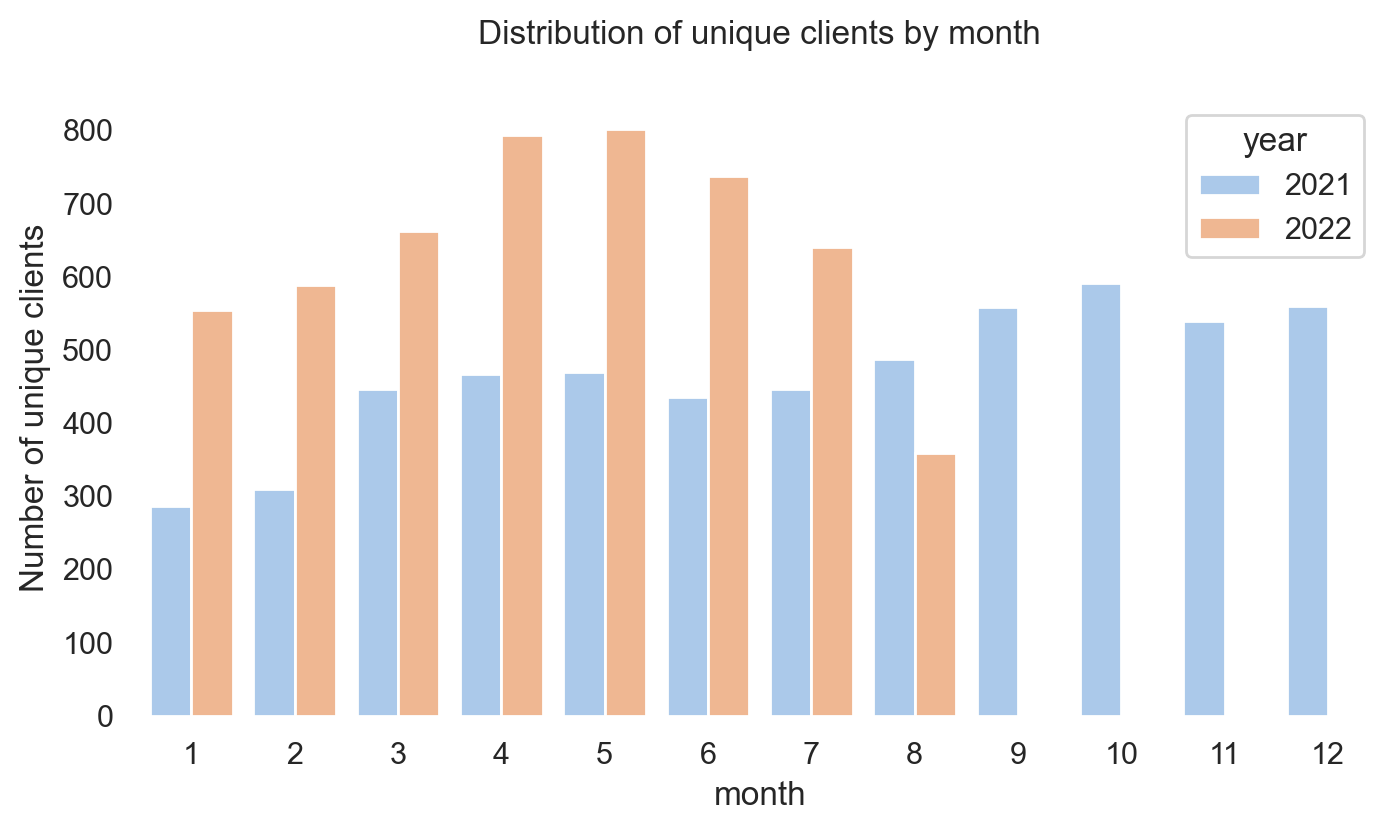

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(unique_clients_monthly, x = 'month', hue = 'year', palette = 'pastel')
ax.set_title('Distribution of unique clients by month', pad = 20)
ax.set(ylabel = 'Number of unique clients', frame_on = False)

plt.show()

Let's go even deeper and check if the clients visited doctors more frequently in 2022 than in 2021. To do that, we'll __narrow the dataset to visiting doctors only__ and calculate the __ratio of second+ visits to the first for each unique client__ of the center. As we see, it can __only be calculated for 59%__ of the clients as many of them only had first visits (36.9%) and some only had subsequent visits within a year (3.9%).

On the graph we can see that __in 2022 an average medical case was slightly longer than in 2021__. In other words, the first visit to a doctor was followed by more subsequent visits, athough to a small extent to consider it a driver of the price increase.

In [60]:
doctors_visits = (df.
                  query('subcategory == "first visit" or subcategory == "return visit"').
                  pivot_table(index = ['insured', 'year'],
                              columns = 'subcategory',
                              values = 'id',
                              aggfunc = 'count').reset_index()
                 )
doctors_visits.columns = ['insured', 'year', 'first_visit', 'return_visit']
doctors_visits['visits_ratio'] = doctors_visits['return_visit'] / doctors_visits['first_visit']

doctors_visits.head(2)

insured  year  first_visit  return_visit  visits_ratio
0   125073  2021          5.0           7.0           1.4
1   125094  2021          NaN           4.0           NaN

In [61]:
print(len(doctors_visits.query('first_visit.isna()'))/len(doctors_visits)*100)#no first visits
len(doctors_visits.query('return_visit.isna()'))/len(doctors_visits)*100 #no second visits

3.919285991462942


36.86457120682965

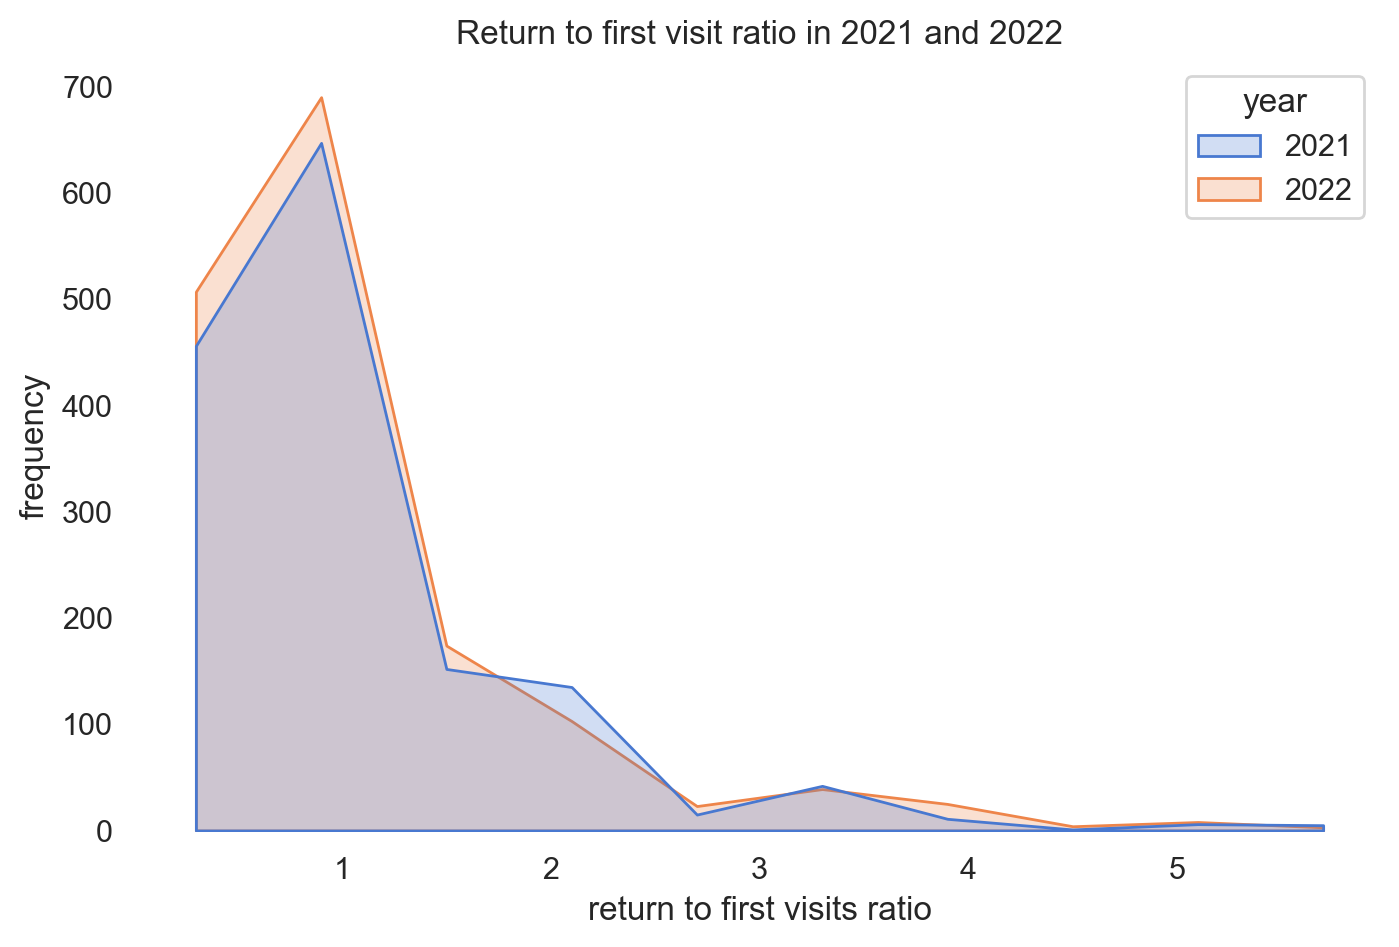

In [62]:
doctors_visits_ratio = doctors_visits.query('not visits_ratio.isna()')

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style = 'whitegrid')
sns.histplot(doctors_visits_ratio,
             x = 'visits_ratio',
             hue = 'year',
             bins = 10, binrange = (0, 6),
             palette = 'muted', element = 'poly')
ax.set(xlabel = 'return to first visits ratio', ylabel = 'frequency',
       title = 'Return to first visit ratio in 2021 and 2022',
      frame_on = False)
plt.show()

### Summary on the Hypothesis I ###

__The hypothesis was confirmed: we compared the monthly distributions of cost of visits and the number of visits and found out that the former increased by 6.5% on average while the latter increased by 53% during the comparable period (Jan - Aug).__

- The increase in the cost of visit is visible for the cheaper segment of services. 46% of services costed less than 2,000 in 2021, the share decreased to 41% in 2021.
- The increase in number of visits rooted in the boost in the amount of unique clients, not the extension of the medical cases. 

## 5. Hypothesis II: Age and gender are related to the revenue increase of revenue in 2022 ##

### 5.1 Gender and revenue

Among the visitors there is __noteceably more women than men in both 2021 and 2022__ (57-58% and 42-43%, respectively). Moreover, __an average woman makes 0.7 - 0.9 more visits per year than an average man.__ 

In [63]:
unique_clients_profiles = (df.groupby(['insured', 'year']).
                           agg({'sex': 'first', 'date': 'nunique',
                                'service_cost': 'sum', 'age' :'first'}).
                           reset_index().
                          rename(columns={'date': 'visits_number'}))
unique_clients_profiles['visit_cost'] = (
    unique_clients_profiles['service_cost']/unique_clients_profiles['visits_number']
).round()
unique_clients_profiles.head(2)

insured  year     sex  visits_number  service_cost  age  visit_cost
0   125073  2021  female             15         33080   65      2205.0
1   125094  2021  female              5         21139   43      4228.0

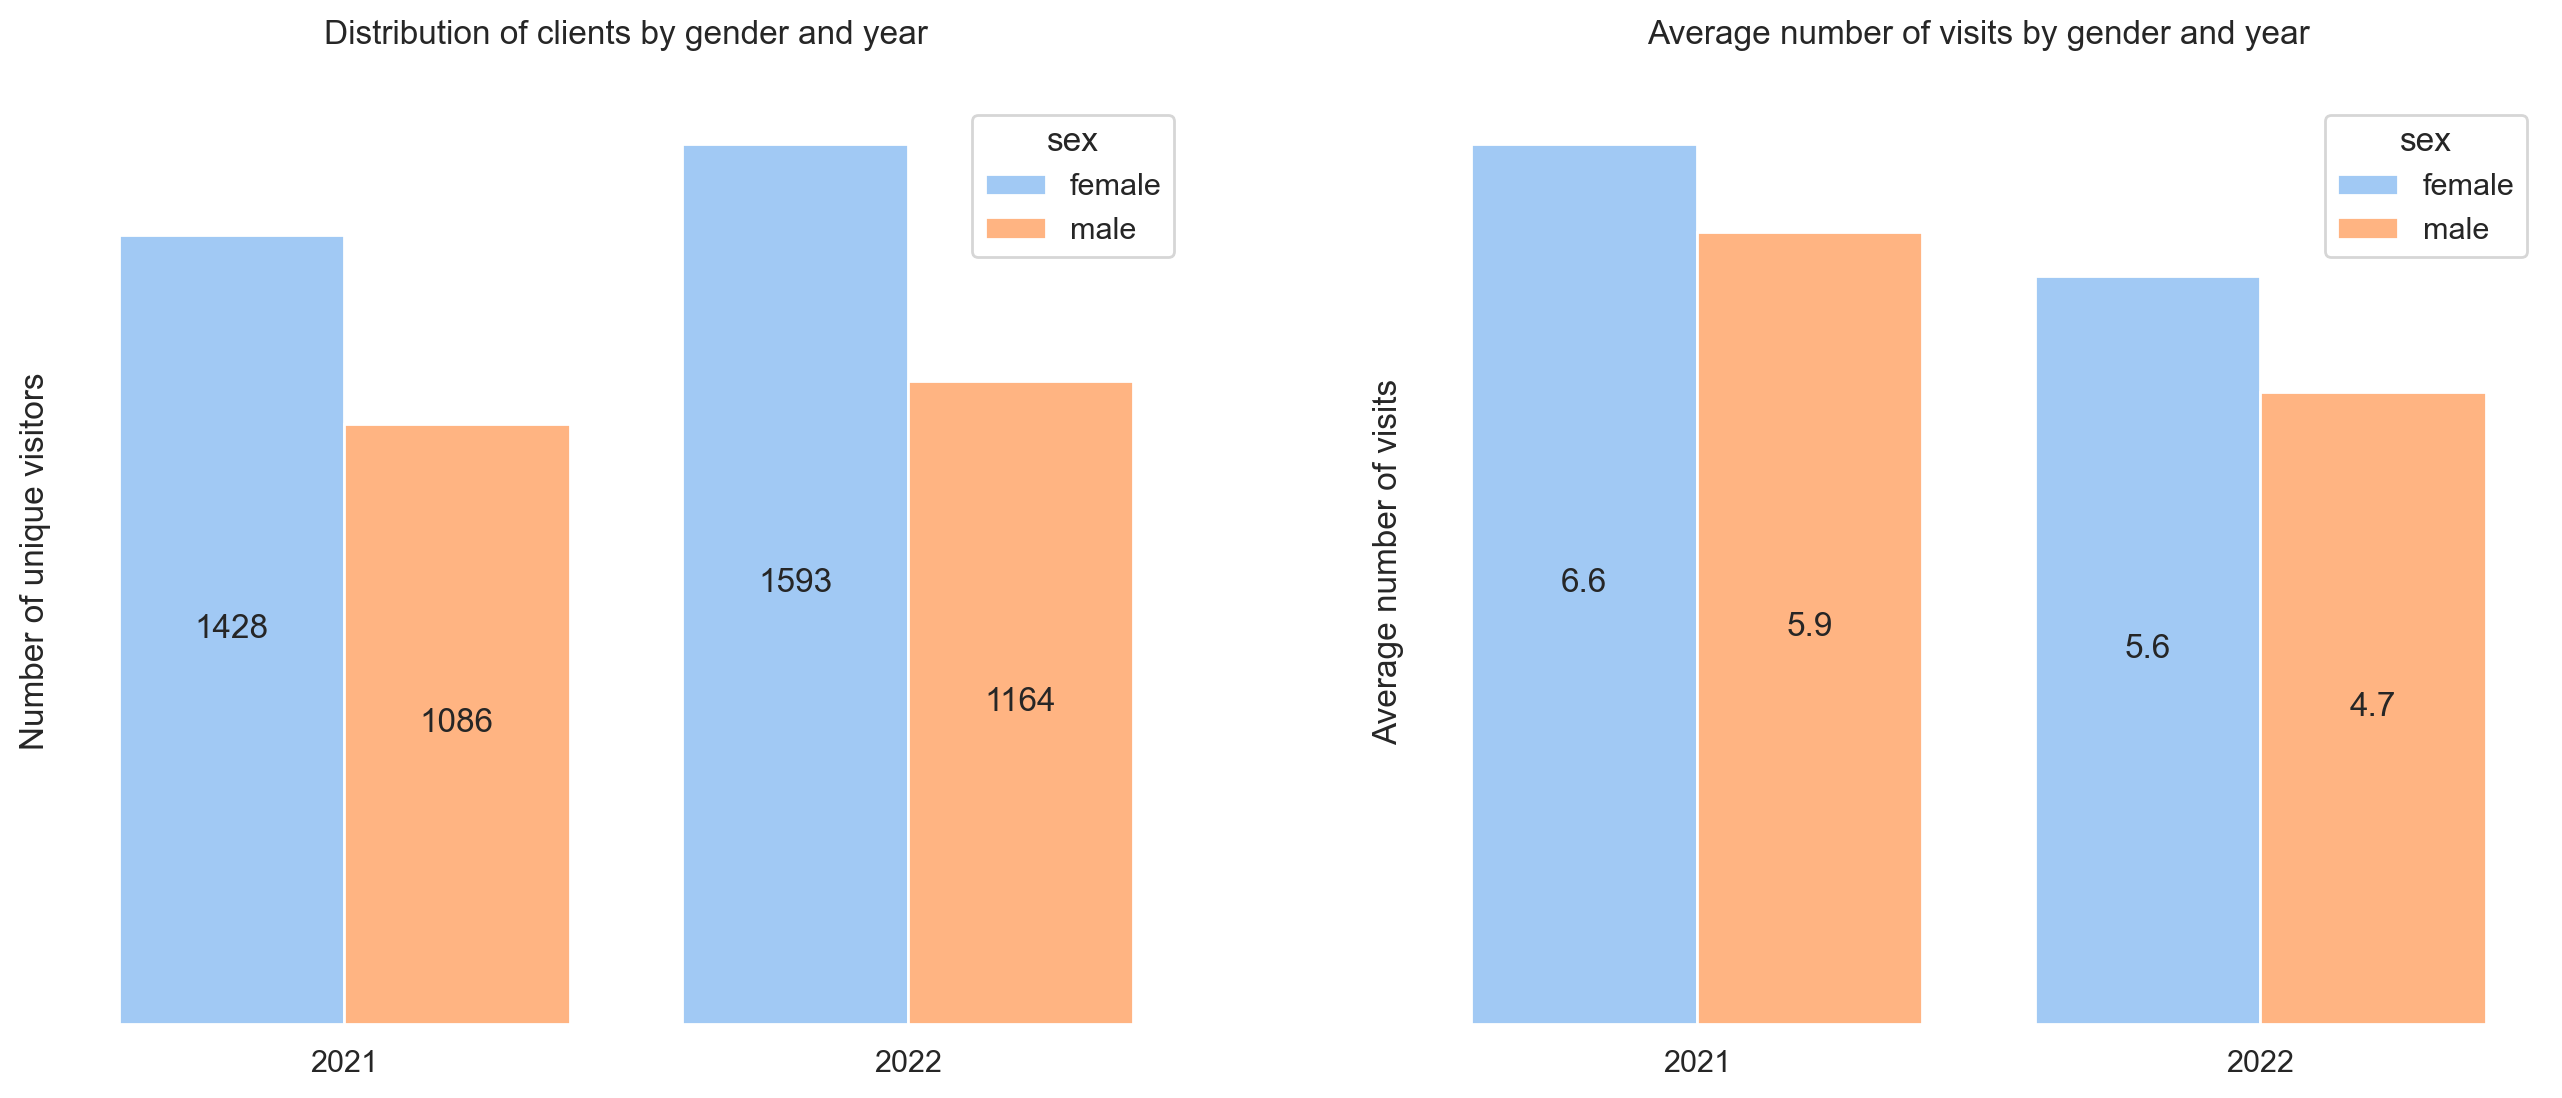

In [64]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(unique_clients_profiles,
              x = 'year', hue = 'sex',
              palette = 'pastel',
             ax = ax1, saturation = 1)

ax1.set_title ('Distribution of clients by gender and year', pad = 20)
ax1.set(xlabel = '', ylabel = 'Number of unique visitors', frame_on = False)
ax1.bar_label(ax1.containers[0], label_type='center')
ax1.bar_label(ax1.containers[1], label_type='center')
ax1.set_yticks([])

sns.barplot(unique_clients_profiles,
            x = 'year', y = 'visits_number',
            hue = 'sex', palette = 'pastel',
            errorbar = None,
           ax = ax2, saturation = 1)

ax2.set_title ('Average number of visits by gender and year', pad = 20)
ax2.set(xlabel = '', ylabel = 'Average number of visits', frame_on = False)
ax2.bar_label(ax2.containers[0], label_type='center', fmt='%.2g')
ax2.bar_label(ax2.containers[1], label_type='center', fmt='%.2g')
ax2.set_yticks([])

plt.show()

However, __hardly women prevail over men in terms of the average service cost__. On the table below that men paid even more in average in 2021. The only peculiarity here is that the maximum cost for a service was paid by a woman both in 2021 and 2022.

In [65]:
service_cost_gender = df.groupby(['year', 'sex']).agg({'service_cost': ['mean', 'median', 'max']}).reset_index()
service_cost_gender.columns = ['sex', 'year', 'average cost', 'median cost', 'max cost']
service_cost_gender = service_cost_gender.round()
service_cost_gender

sex    year  average cost  median cost  max cost
0  2021  female        1131.0       1092.0     26999
1  2021    male        1151.0       1134.0     17325
2  2022  female        1199.0       1200.0     13000
3  2022    male        1190.0       1190.0      9090

However, we may notice a difference in the cost of the visit: __in 2021 an average woman paid 5% more for the visit than an average man; in 2022 women paid 7.7% more__.

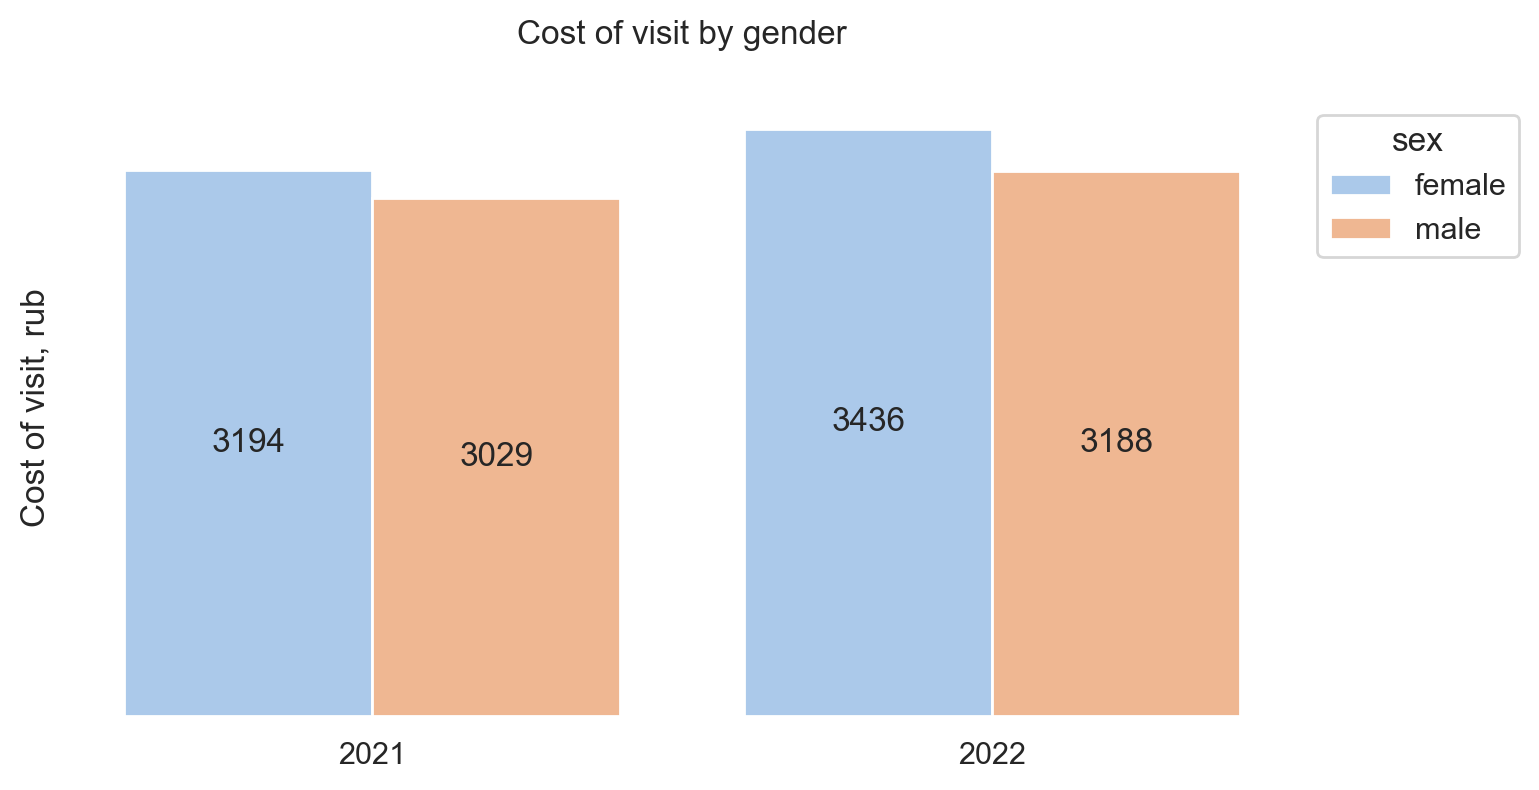

In [66]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(unique_clients_profiles, x = 'year', y = 'visit_cost',
            hue = 'sex', errorbar = None,
           palette = 'pastel')
ax.bar_label(ax.containers[0], label_type='center', fmt='%.2d')
ax.bar_label(ax.containers[1], label_type='center', fmt='%.2d')
ax.set_title('Cost of visit by gender', pad = 20)
ax.set(ylabel = 'Cost of visit, rub', xlabel = '', frame_on = False)
ax.set_yticks([])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

Let's check __if the above mentioned difference between spendings of women and men is statistically significant__ to consider it might influence the overall revenue.

To check it let's create a __table demography__ with unique id for every customer and the information about their age as of the year 2022 and the total income the center gained from every client.

In [67]:
demography = (df.groupby('insured', as_index = False).agg({'service_cost': 'sum',
                                                           'sex': 'first',
                                                           'age':'last'}))
demography.head(2)

insured  service_cost     sex  age
0   125073         33080  female   66
1   125094         27519  female   44

__Null hypothesis 1:__ there are differences in total spendings for 2021 - 2022 between women and men.

__Alternative hypothesis 1 (two-sided):__ there are no differences in total spendings for 2021 - 2022 between women and men.

In [68]:
sample_f = demography.query('sex == "female"')['service_cost']
sample_m = demography.query('sex == "male"')['service_cost']
samples = sample_f, sample_m

Let's introduce a function var_std to check dispersion/standard deviation. We'll need them to make the right settings in the coming T-test.

In [69]:
def var_std(series):
    
    mean = series.mean()

    var = 0
    for i in series:
        var += (i - mean) * (i - mean)
    var /= len(series)
    std = std = var**0.5
    print('Dispersion:', var)
    print('Standard deviation:', std)   

Dispersion and standard deviation differ, thus we'll better use "equal_var=False" in the T-Test.

In [70]:
for i in range(len(samples)):
    print('Sample{}'.format(i))
    var_std(samples[i])
    print(' ')

Sample0
Dispersion: 933864210.1736025
Standard deviation: 30559.191909695557
 
Sample1
Dispersion: 751504371.760652
Standard deviation: 27413.580060996264
 


The results of the t-test show that differences in the spendings among men and women are statistically significant, as the p-value (4.942188158422918e-07) is considerably less than alpha 0.05.

In [71]:
alpha = 0.05

results = st.ttest_ind(sample_f, sample_m, equal_var=False)
print('Sample_f and Sample_m')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Fail to reject the null hypothesis')  

Sample_f and Sample_m
p-value: 4.942188158422918e-07
Rejecting the null hypothesis


Putting the results altogether we can say that __the gender was related to the revenue__, as:
- Women visit the center more often;
- They tend to pay more then men (5% and more 7.7% for a visit in 2021 and 2022, respectively);
- The above said difference is statistically significant.

### 5.1 Age and revenue

The plot with the age distribution shows a tendency of the __noticeably increased demand for medical services in 2022 among the clients aged 20 - 40 and slighly among the older ones (in absolute terms)__.

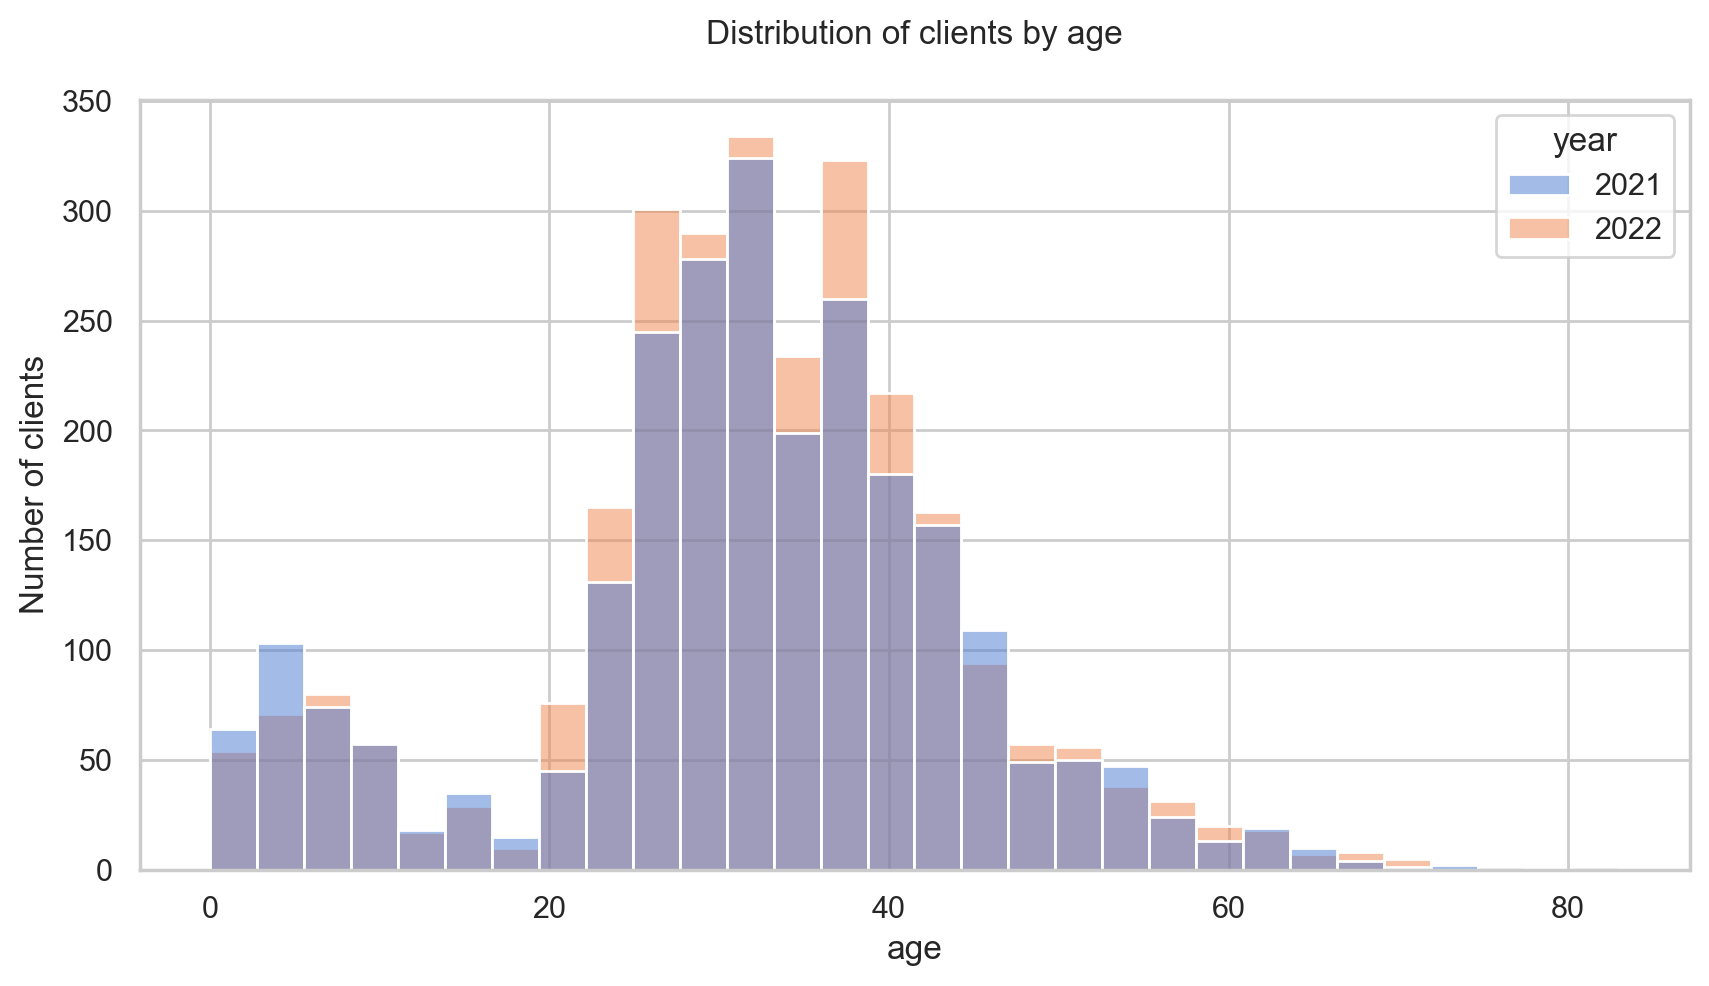

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(unique_clients_profiles, x = 'age', bins = 30, hue = 'year', palette = 'muted')
ax.set_title('Distribution of clients by age', pad = 20)
ax.set(ylabel = 'Number of clients')

plt.show()

Let's check a correlation between age of clients and the number of services they bought. For this purpose we make the profiles table even in terms of months (from Jan to Aug both in 2021 and 2022). As we see, there's no evidence that any of the age groups started to buy more or less services in 2022. __Both in 2021 and 2022 the most active group are aged 20 - 60__ that is generally those represent the labour market.

In [73]:
unique_clients_profiles_comparable = (df.query('month < 9').groupby(['insured', 'year']).
                           agg({'sex': 'first', 'id': 'count',
                                'service_cost': 'sum', 'age' :'first',
                               'service_number': 'sum'}).
                           reset_index().
                          rename(columns={'id': 'visits_number'}))
unique_clients_profiles_comparable.head(2)

insured  year     sex  visits_number  service_cost  age  service_number
0   125073  2021  female              7          9274   65               7
1   125094  2021  female              4          4479   43               4

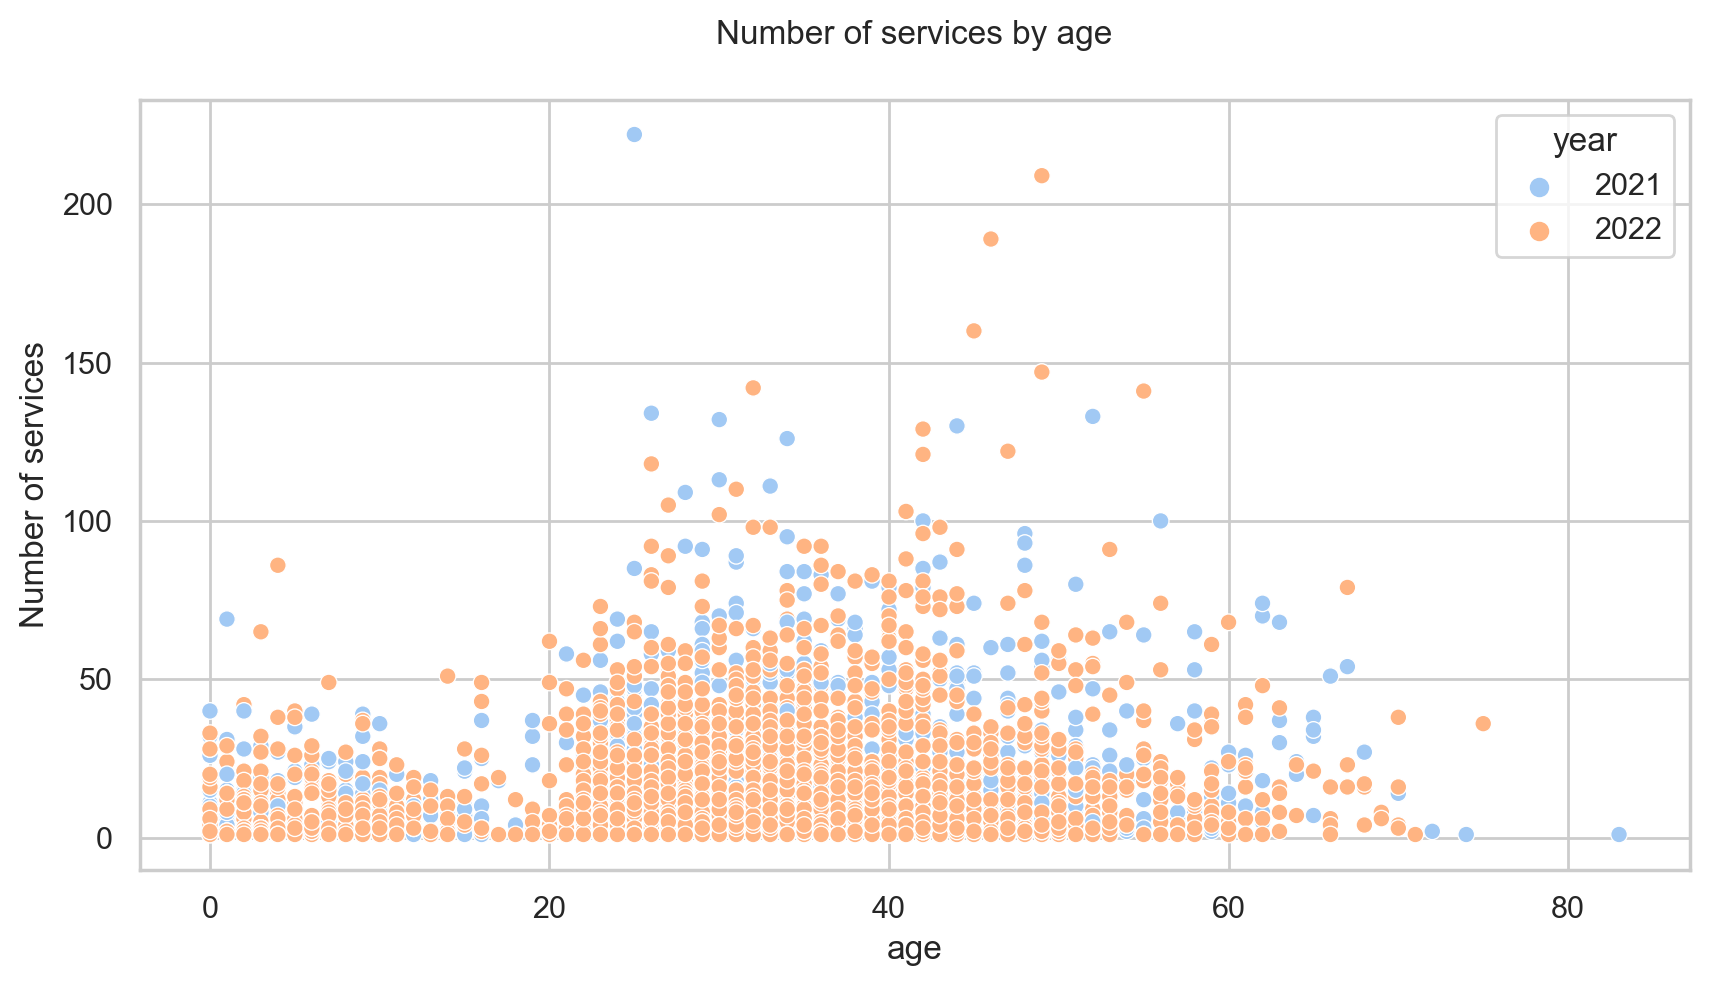

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(unique_clients_profiles_comparable,
                x = 'age',
                y = 'service_number',
                hue = 'year',
                palette = 'pastel')
ax.set_title('Number of services by age', pad = 20)
ax.set(ylabel = 'Number of services')
plt.show()

On the lineplot below lines represent the average total spendings for every age for the comparable period (Jan - Aug). The most significant changes are visible for the __clients aged 57 and above: in 2022 their spendings noticeably reduced__. 

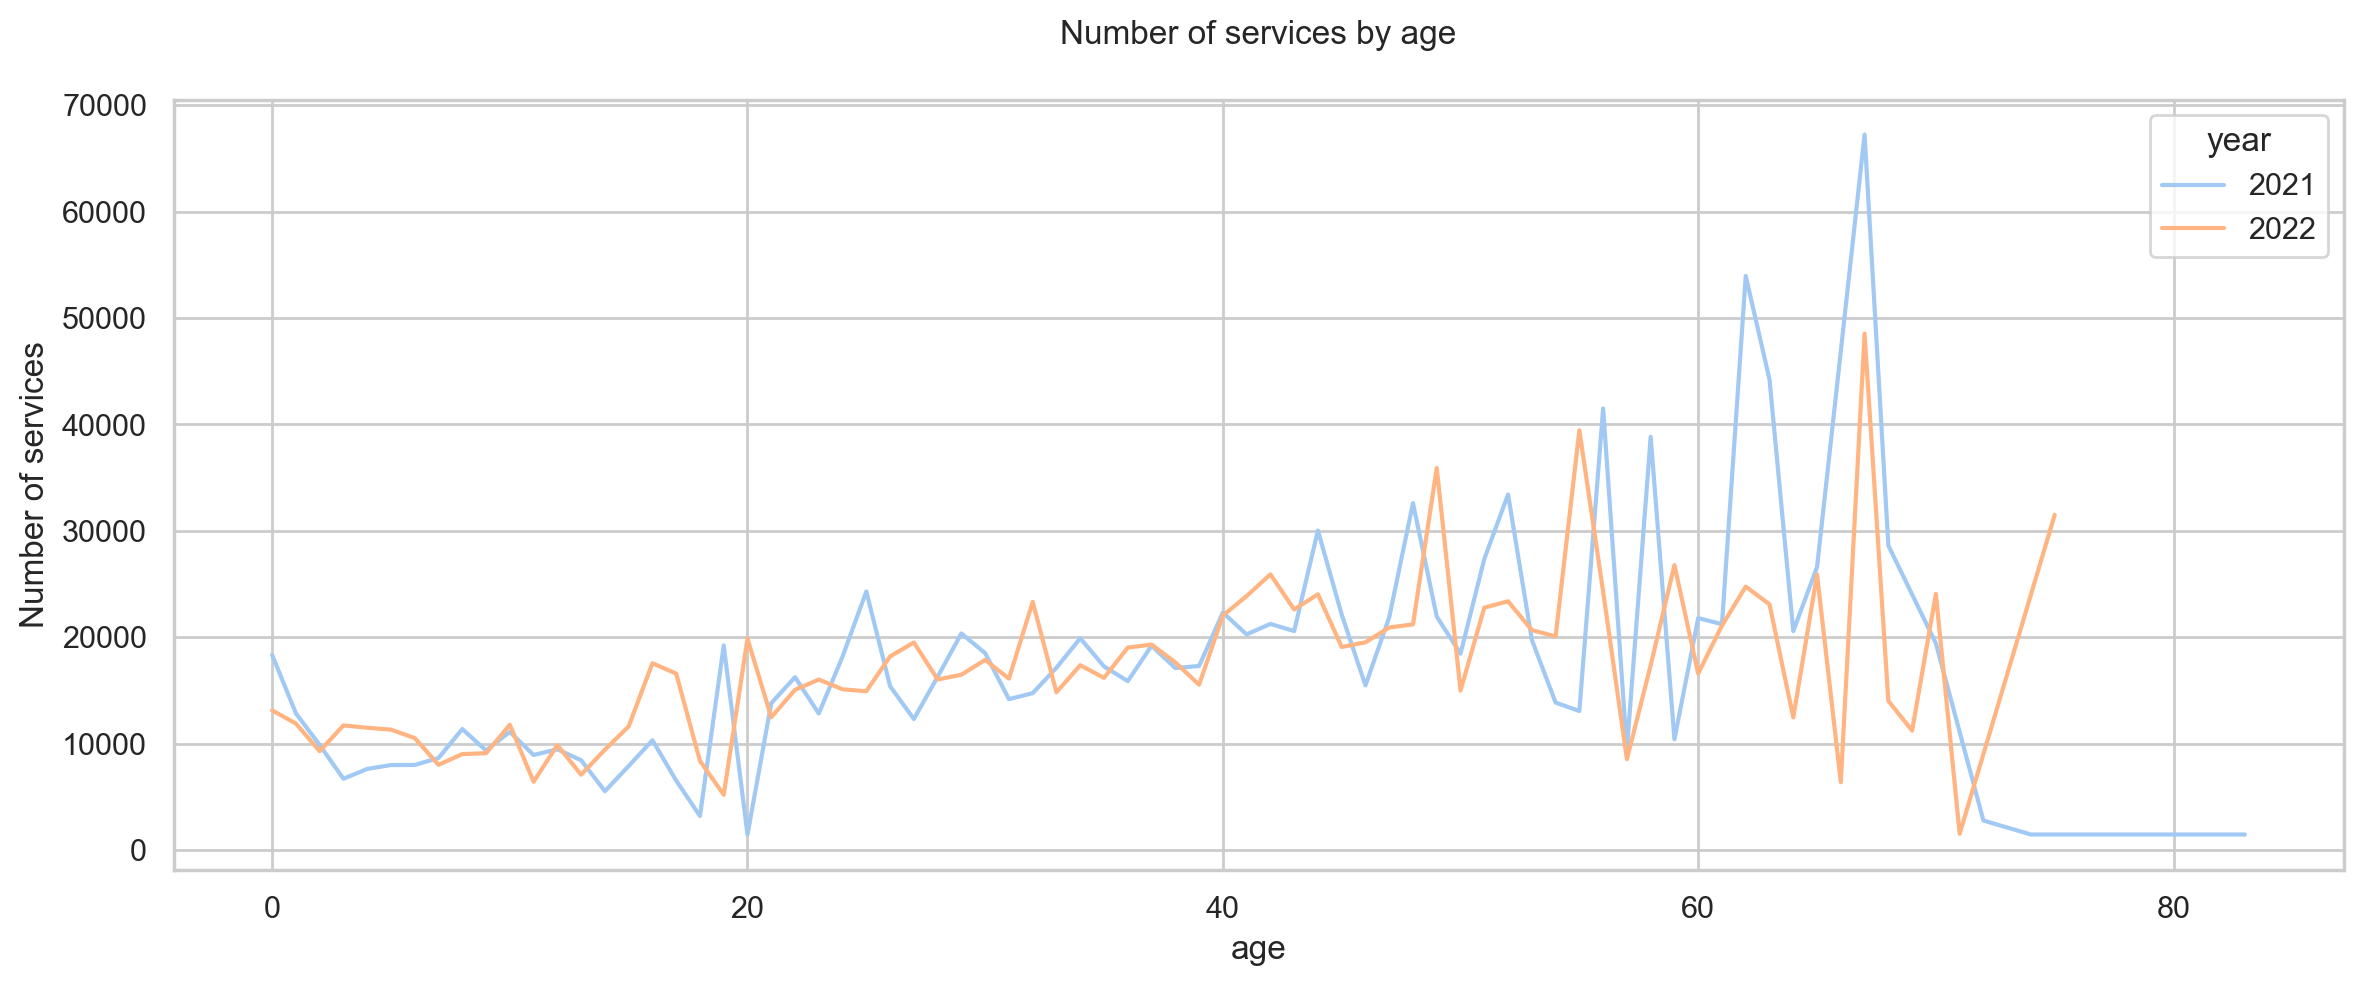

In [75]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.lineplot(data = unique_clients_profiles_comparable,
                x = 'age',
                y = 'service_cost',
                hue = 'year',
                estimator = 'mean',
            errorbar = None,
            palette = 'pastel')
ax.set_title('Number of services by age', pad = 20)
ax.set(ylabel = 'Number of services')
plt.show()

Let's check whether the amount of spendings correlates with the age. We'll divide the clients into two groups:
- 23 y.o. (graduates) - 60 y.o. (retired) – basically, the main workforce
- younger than 23 y.o. (children and students) and older than 60 (often retired)

__Null hypothesis 2:__ there are differences in total spendings for 2021 - 2022 between groups aged 23-60 (workforce) and others.

__Alternative hypothesis 2 (two-sided):__ there are no differences in total spendings for 2021 - 2022 between groups aged 23-60 (workforce) and others.

In [76]:
sample_1 = demography.query('age >= 23 and age <=60')['service_cost']
sample_2 = demography.query('age < 23 or age > 60')['service_cost']
samples = sample_1, sample_2

Dispersion and standard deviation differ, thus we'll better use "equal_var=False" in the T-Test.

In [77]:
for i in range(len(samples)):
    print('Sample{}'.format(i))
    var_std(samples[i])
    print(' ')

Sample0
Dispersion: 923332097.285063
Standard deviation: 30386.38012802879
 
Sample1
Dispersion: 484489867.7449247
Standard deviation: 22011.130542180807
 


T-test shows that __the difference between the two age groups are statistically significant__ (p-value (1.694404211299544e-15) is less than alpha (0.05).

In [78]:
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('Sample_1 and Sample_2')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Fail to reject the null hypothesis')  

Sample_1 and Sample_2
p-value: 1.694404211299544e-15
Rejecting the null hypothesis


Based on the findings above we can state that __clients aged (23-60) are more likely to bring more income than other age groups (younger and older)__. We found that:
- on average, aged 23-60 brought more money and statistically, that difference is significant;
- in 2022 (Jan-Aug) they tend to visit the center more often than in 2021, thus they impact the revenue;
- aged 60+, by contrast, reduced their spendings on the center's services in 2022.

### Summary on the Hypothesis II ###

__Based on the check of the hypothesis we can admit that age and gender could influence the revenue.__

- We proved that __the increase in the unique clients was a result of the wave of customers aged 20 - 40__, and slightly those over 40. This may mean a few things, e.g.: those people could have invested in their health before the expected rise in price, or they had decided to immigrate and to resolve health issues before that. We can see that the number of services per client stayed more or less the same, thus the revenue was provided by the new unique customers. The t-test we held suggests that the difference between spendings of clients aged  23-60 (main workforce) and others is statistically significant.

- __As to the gender, we also might claim a weak correlation__. Indeed, in the women visited the center slightly more intensively than men. An average woman made 0.9 more visits in 2022 than an average man (0.7 visits in 2021). As to the cost of the visit, women also slighly prevail: in 2022 a woman's visit costed 7.7% more than a man's one, compared to 5% in 2021. Statistically speaking, the difference between spendings of men and women is also significant.

## 6. Hypothesis III: Services tighly connected with import impacted more on revenue than the others ##

The plot below demonstrates the median price increase for all categories of services, both requiring and not requiring the expensive equipment and spare parts.

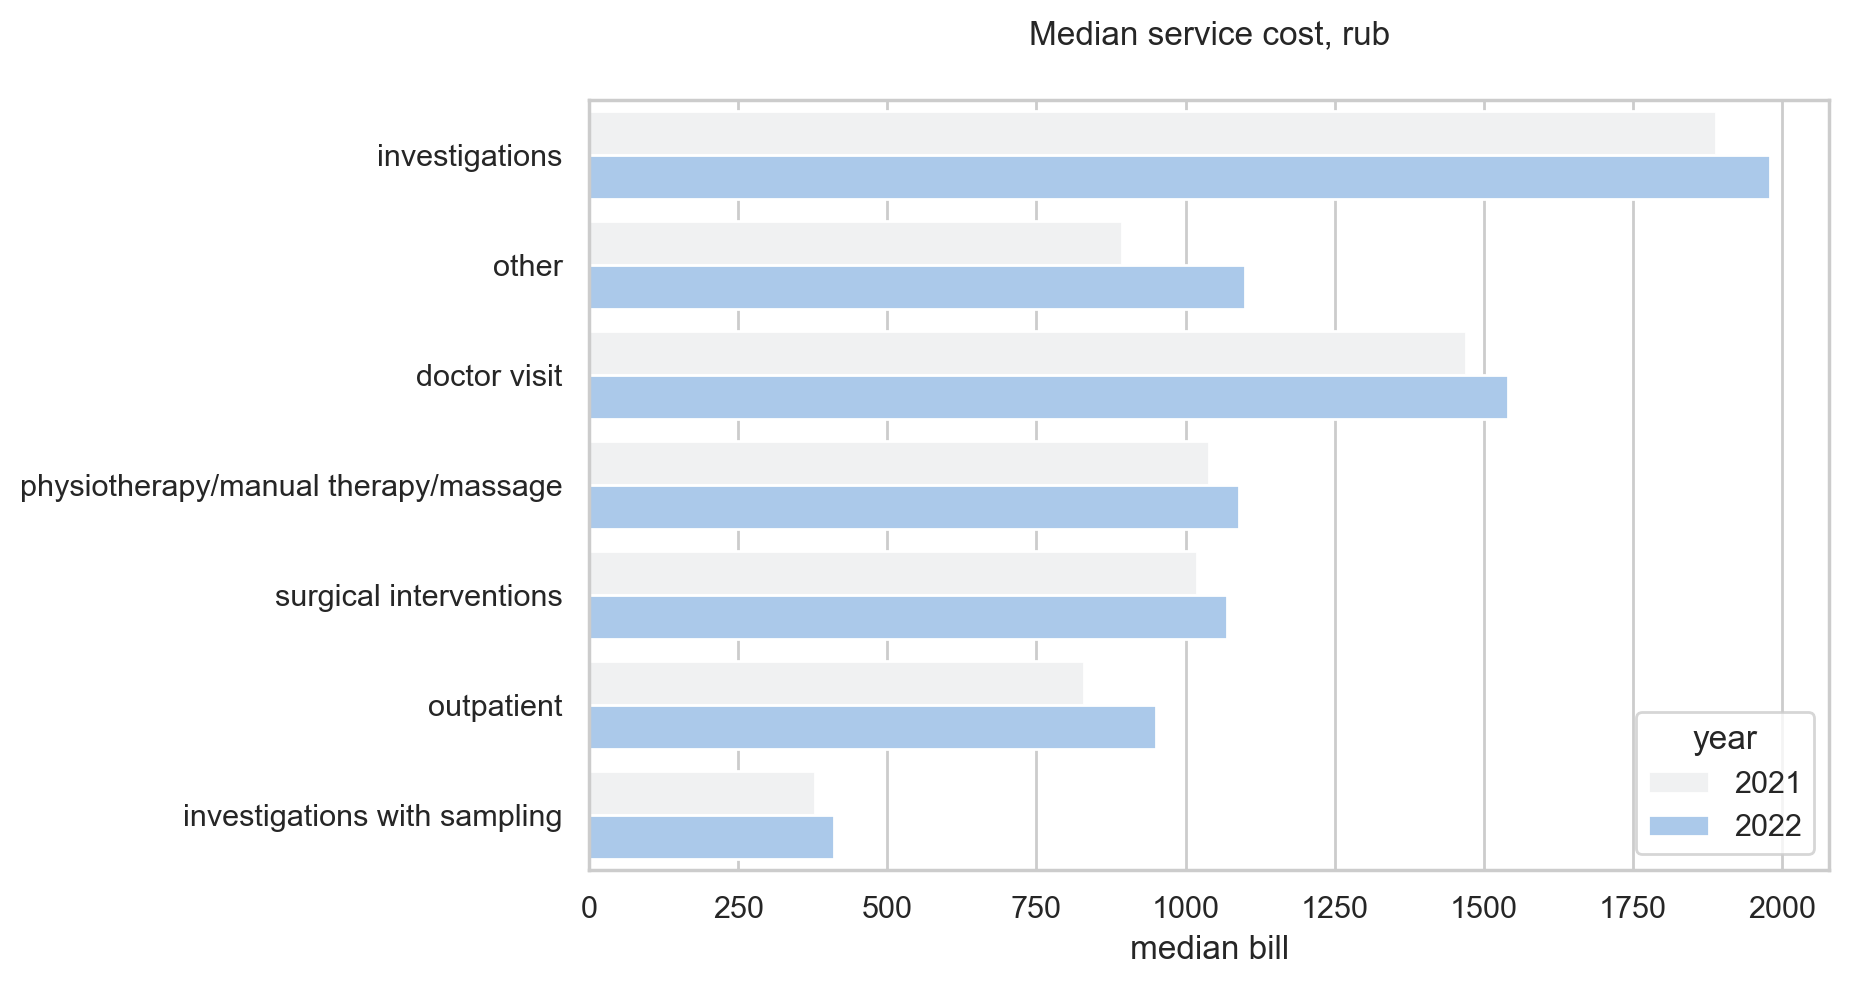

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style = 'whitegrid')

sns.set_color_codes('pastel')
sns.barplot(data = category_service_cost,
            x = 'median_cost', 
            y = 'category', 
            color = 'b',
            errorbar = None,
           hue = 'year')
ax.set_title('Median service cost, rub', pad = 20)
ax.set(xlabel = 'median bill', ylabel = '')
plt.show()

In 2022 we observe the increase in the amount of the provided services of all the categories.

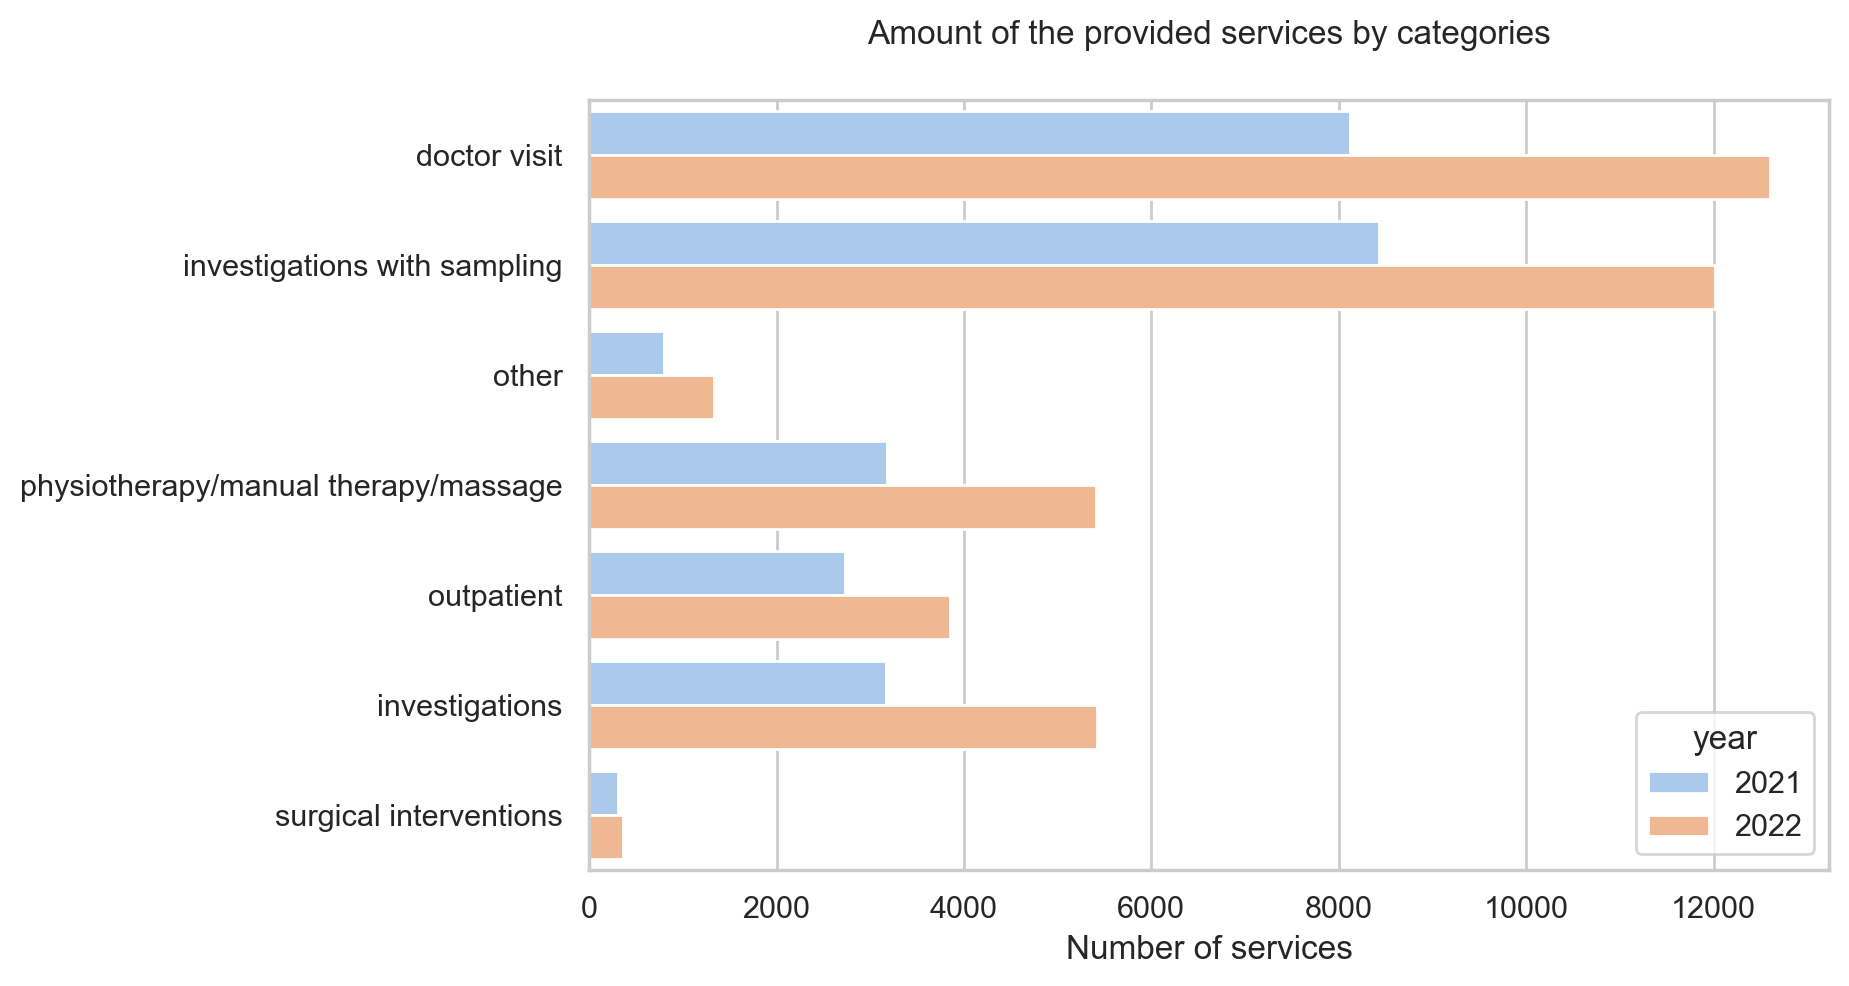

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))

df_comparable = df.query('month < 9')
sns.countplot(df_comparable, y = 'category', hue = 'year', palette = 'pastel')
ax.set_title('Amount of the provided services by categories', pad = 20)
ax.set(ylabel = '', xlabel = 'Number of services')
plt.show()

However, we can see that an average __client gets less services in 2022 than in 2021 (15.2 instead of 15.8)__. It could be related to the price increase.

In [81]:
avg_service_number = (
    unique_clients_profiles_comparable.groupby('year')
    .agg({'service_number': 'sum', 'insured': 'count'})
).reset_index()
avg_service_number['services_per_client'] = (
    avg_service_number['service_number']/avg_service_number['insured']).round(1)
avg_service_number

year  service_number  insured  services_per_client
0  2021           27404     1733                 15.8
1  2022           41828     2757                 15.2

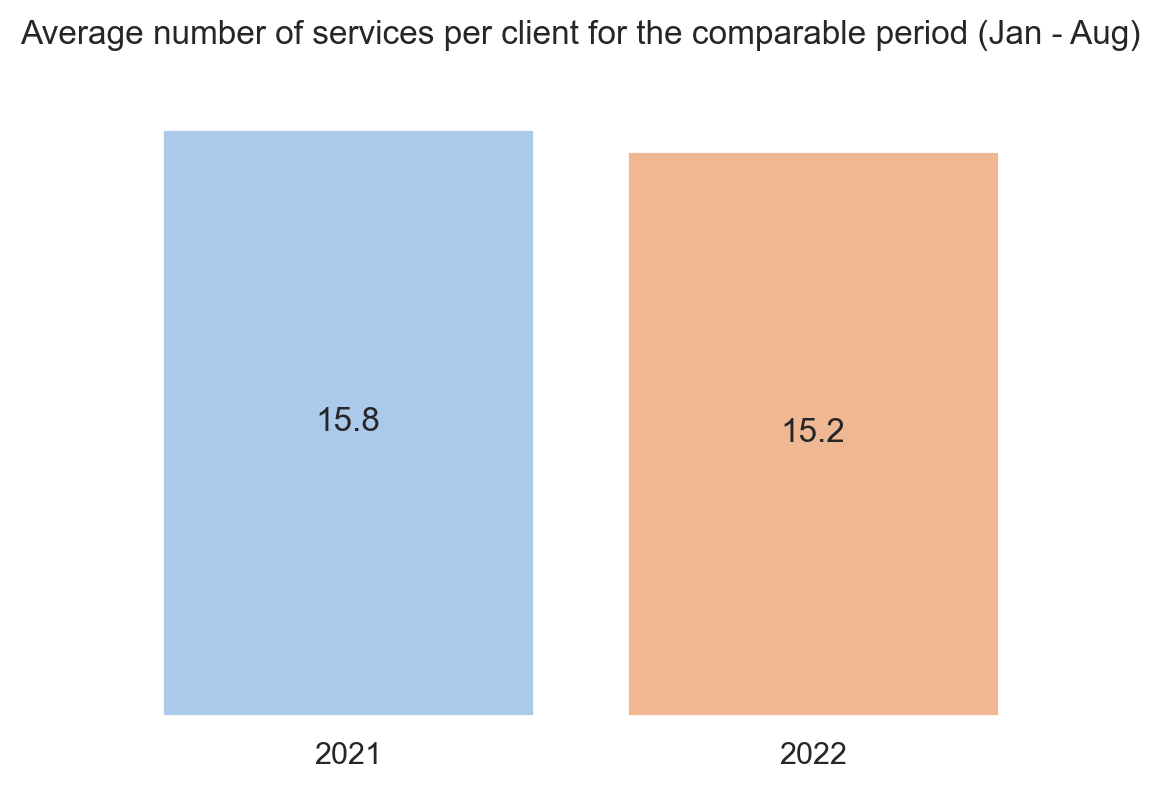

In [82]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(avg_service_number, x = 'year',
            y = 'services_per_client',
           palette = 'pastel')
ax.set_title ('Average number of services per client for the comparable period (Jan - Aug)', pad = 20)
ax.set(xlabel = '', ylabel = '', frame_on = False)
ax.bar_label(ax.containers[0], label_type='center')
ax.set_yticks([])

plt.show()

Let's go deeper to the level of the subcategories (below are 2 plots, one is based on whole data and the other – on the comparable (with the period of Jan - August). From the first sight, some minor services became less popular in 2022. Among them are testing for respiratory infections and their treatment, home visits, vaccination. The demand for the consultations, US, cardiographic services, blood/urine/swab tests increased significantly, as well as manual and physiotherapy and massages (it's even visible on the non-comparable plot). In other words, __not only equipment-based services were in greater demand, but also doctors' visits.__

In [83]:
subcat = (
    df.pivot_table(index = ['subcategory', 'year'],
                        values = 'service_number',
                        aggfunc = 'sum')
    .reset_index()
)

subcat.columns = ['subcategory', 'year', 'services_number']
subcat = subcat.sort_values('services_number', ascending = False)
subcat.head(3)

subcategory  year  services_number
14   blood test  2021             9797
15   blood test  2022             8210
17  first visit  2021             7678

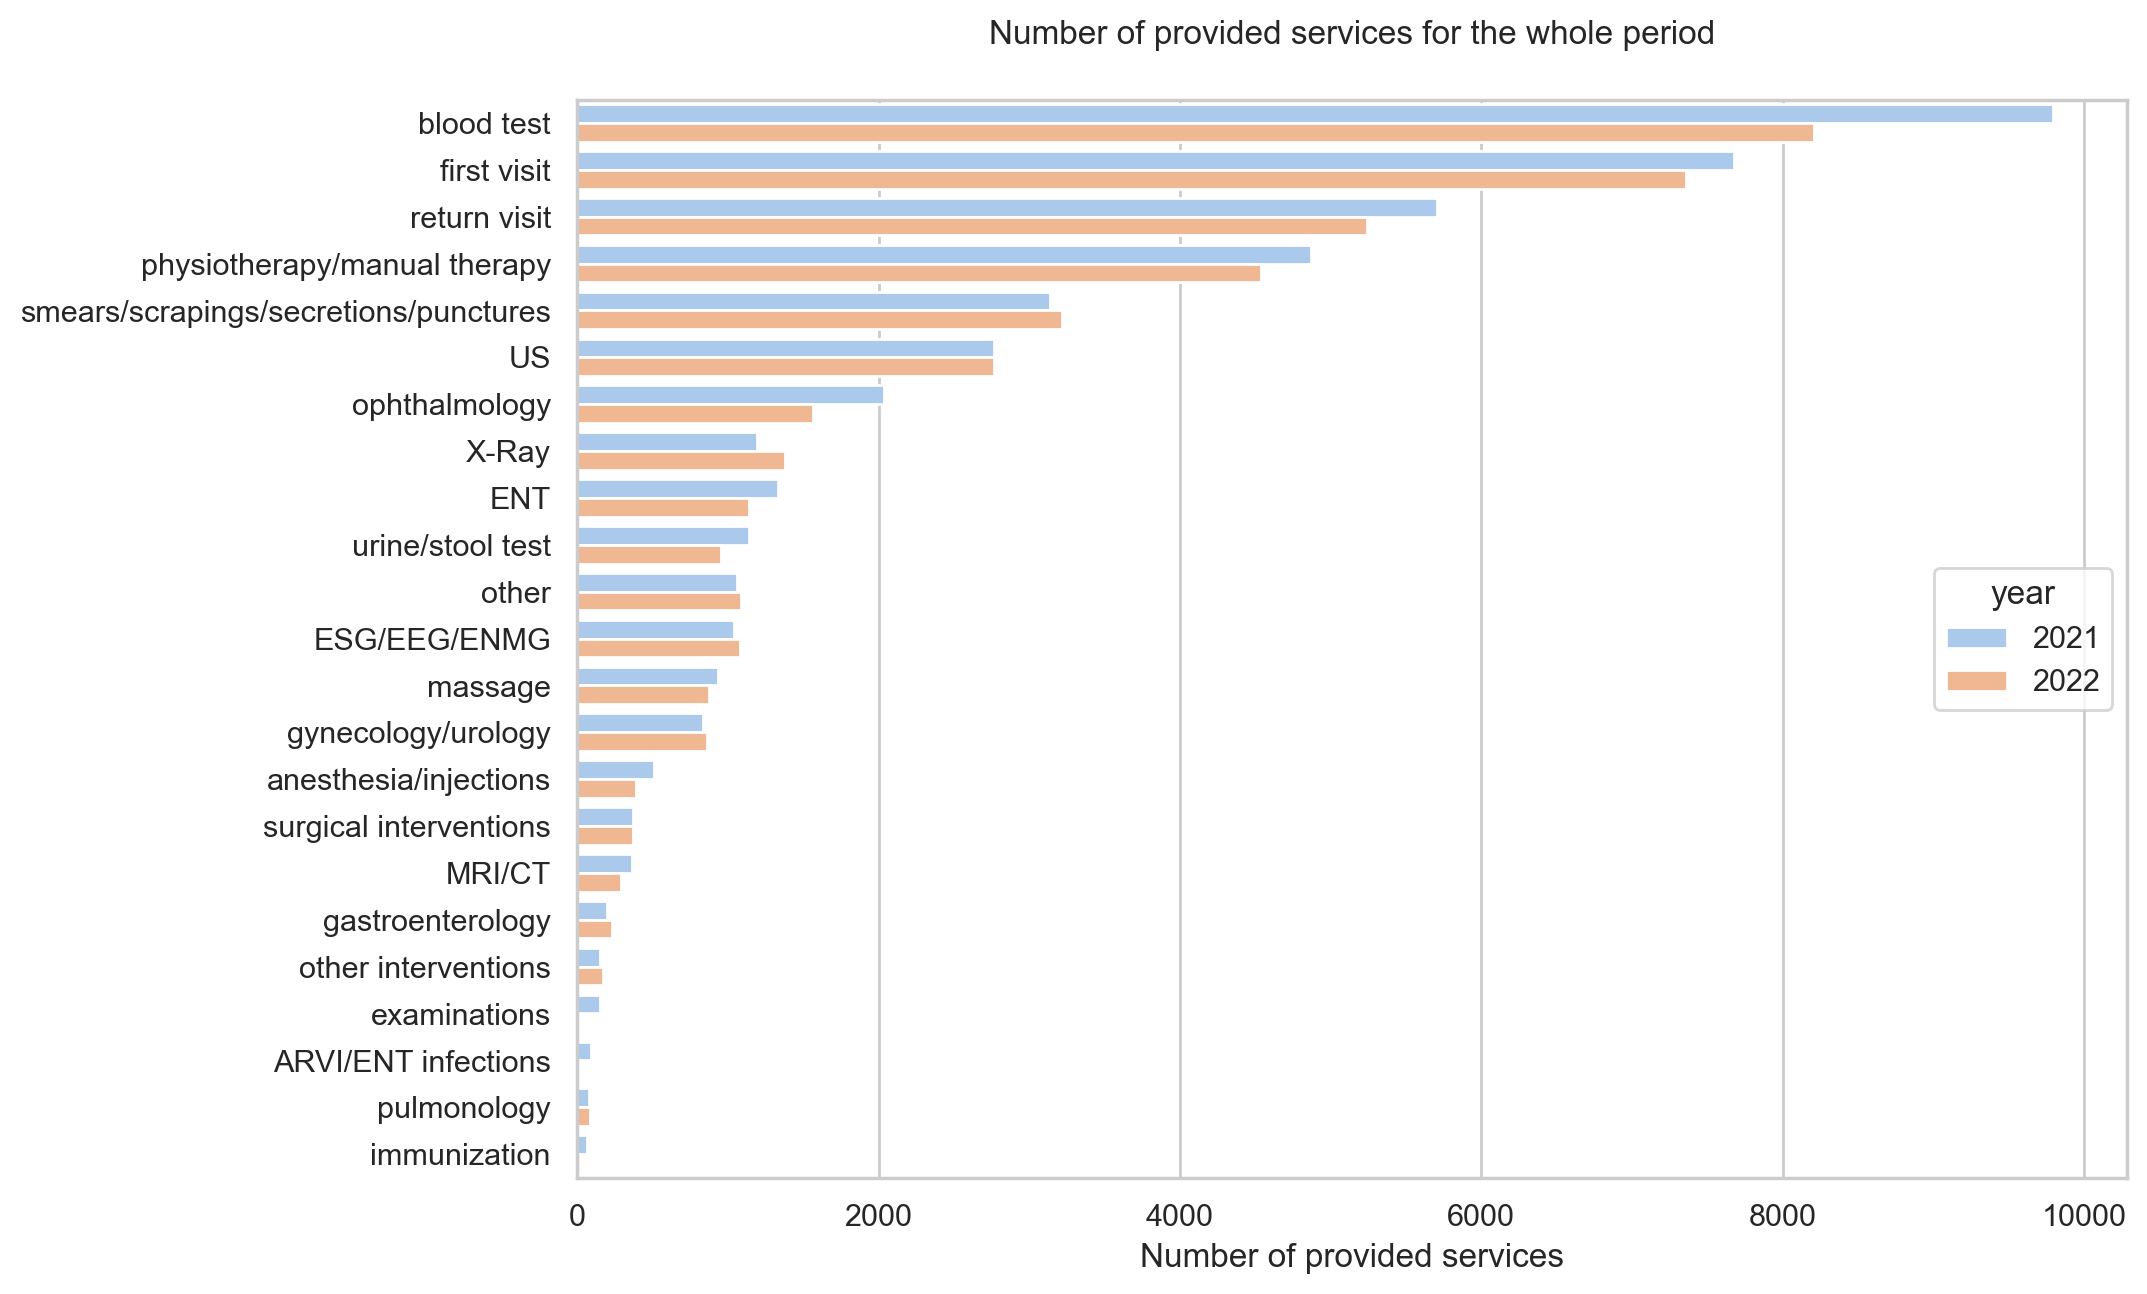

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(subcat, x = 'services_number', y = 'subcategory',
            hue = 'year',
            palette = 'pastel',
            errorbar = None)
ax.set(ylabel = '', xlabel = 'Number of provided services')
ax.set_title('Number of provided services for the whole period', pad = 20)
plt.show()

In [85]:
subcat_comparable = (
    df.query('month < 9').pivot_table(index = ['subcategory', 'year'],
                        values = 'service_number',
                        aggfunc = 'sum')
    .reset_index()
)
subcat_comparable = subcat_comparable.sort_values('service_number', ascending = False)

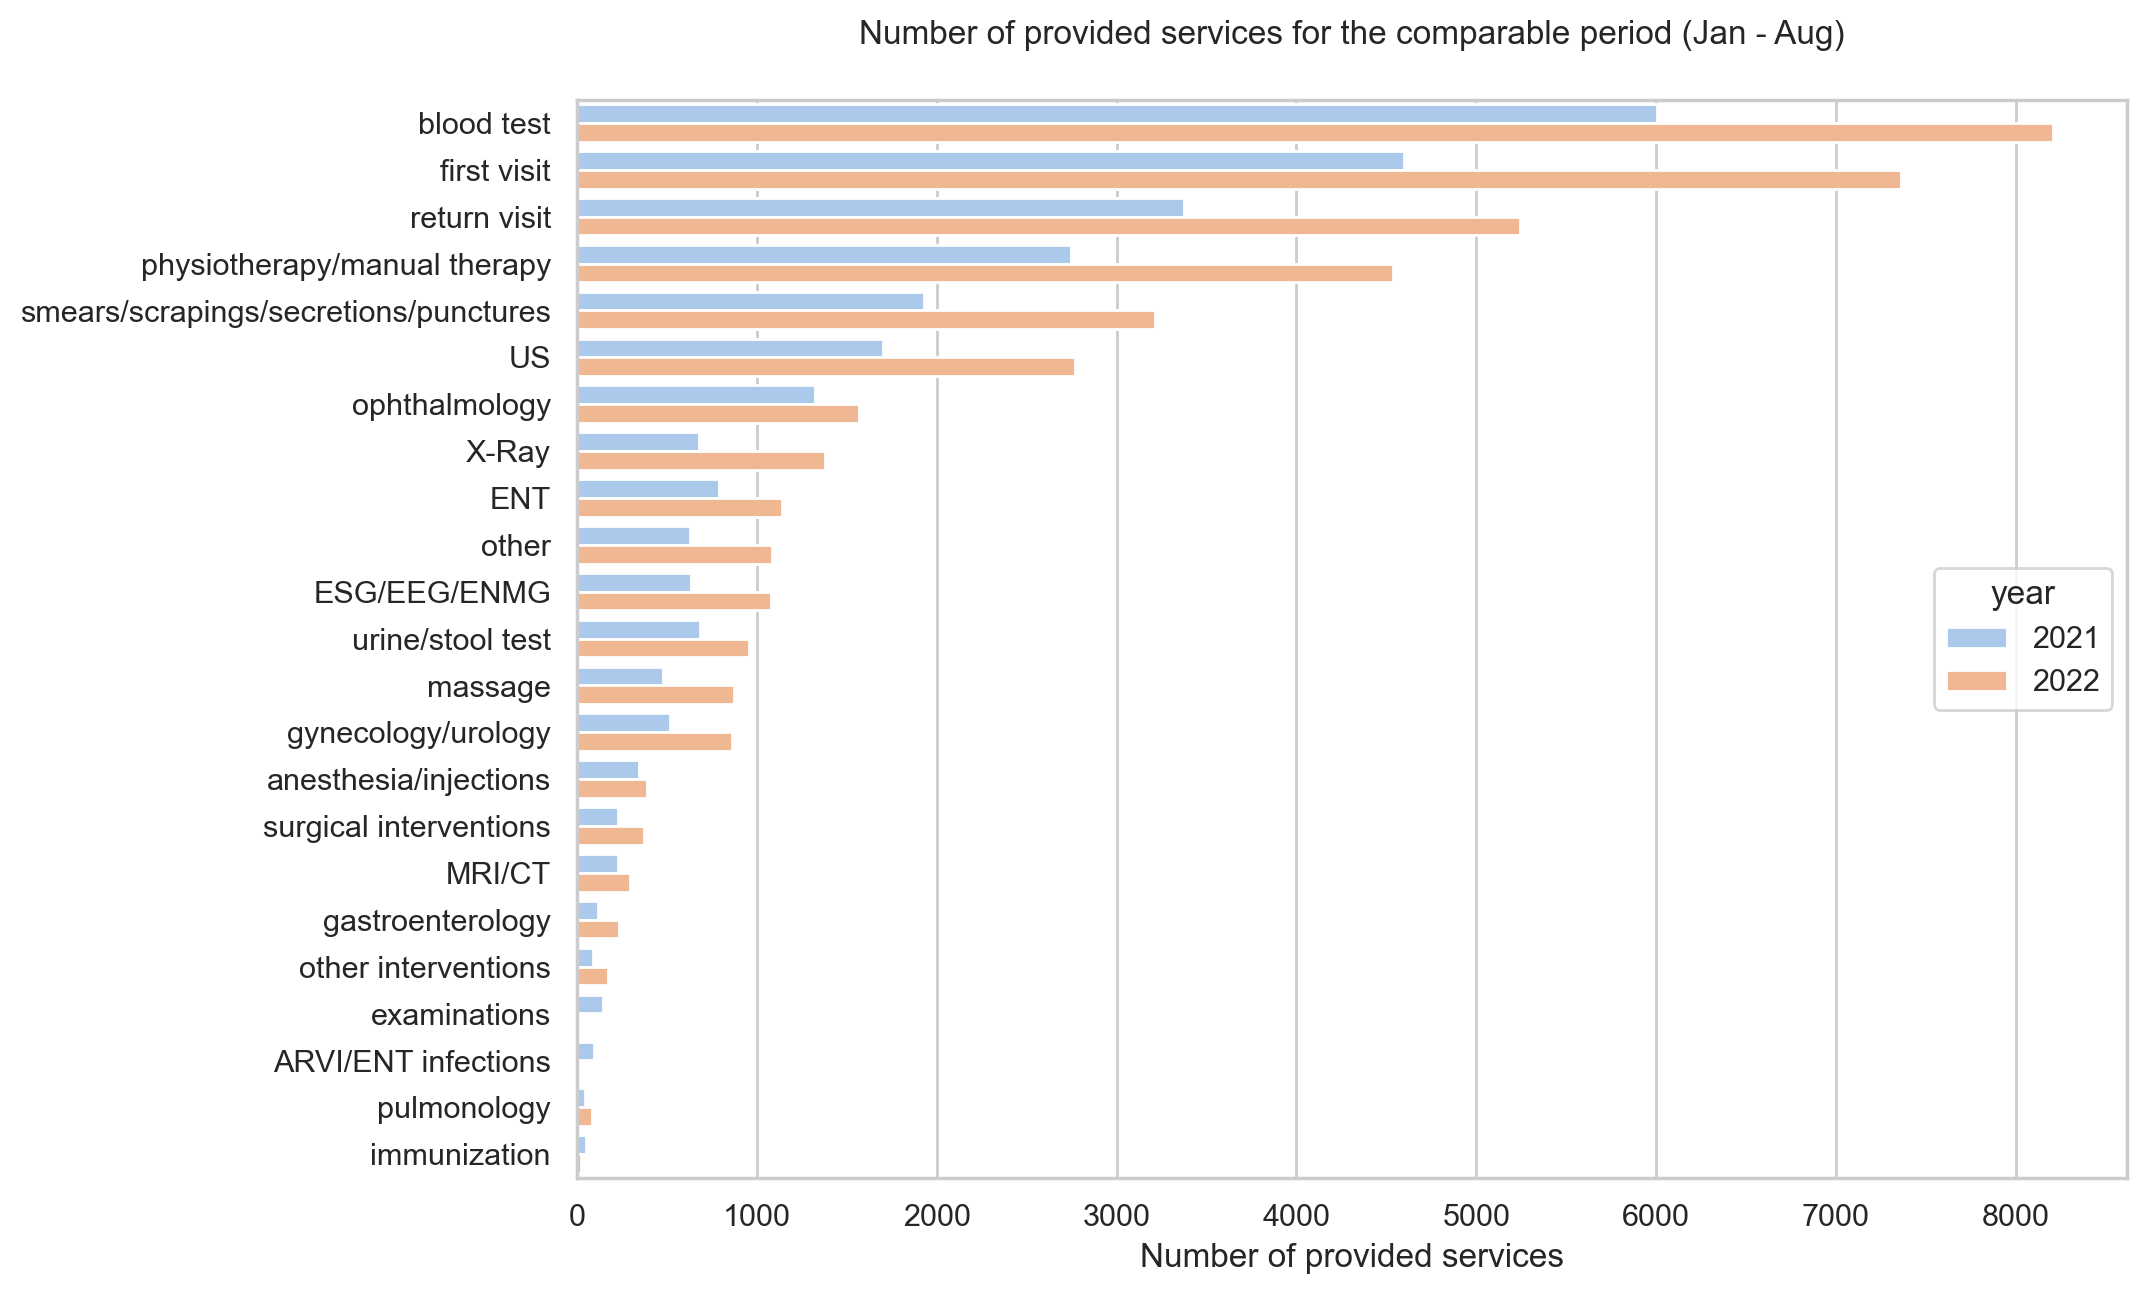

In [86]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(subcat_comparable, x = 'service_number', y = 'subcategory', hue = 'year', palette = 'pastel', errorbar = None)
ax.set(ylabel = '', xlabel = 'Number of provided services')
ax.set_title('Number of provided services for the comparable period (Jan - Aug)', pad = 20)
plt.show()

Let's look at the __revenue shares of the service categories in 2021 and 2022__. As we see, there's __no significant shifts, except for special tests (19.2% of revenue in 2021 compared to 20.6 in 2022)__. This could be a response to the issues with spare parts for complex medical equipment (due to the sanctions).

In [87]:
revenue_by_cat = df.pivot_table(index = 'category',
                                values = 'service_cost',
                                columns = 'year',
                                aggfunc = 'sum').reset_index()
revenue_by_cat.columns = ('category', 'rev_2021', 'rev_2022')
revenue_by_cat['% of 2021'] = (revenue_by_cat['rev_2021']/ sum(revenue_by_cat['rev_2021']) * 100).round(1)
revenue_by_cat['% of 2022'] = (revenue_by_cat['rev_2022']/ sum(revenue_by_cat['rev_2022']) * 100).round(1)

revenue_by_cat = revenue_by_cat.sort_values('% of 2021', ascending = False)
revenue_by_cat

category  rev_2021  rev_2022  % of 2021  \
0                          doctor visit  19337365  18758965       38.2   
1                        investigations   9695940  10068905       19.2   
5  physiotherapy/manual therapy/massage   8048077   7355280       15.9   
2          investigations with sampling   7129774   6518837       14.1   
4                            outpatient   4114426   3869238        8.1   
3                                 other   1742421   2086697        3.4   
6                surgical interventions    493668    328740        1.0   

   % of 2022  
0       38.3  
1       20.6  
5       15.0  
2       13.3  
4        7.9  
3        4.3  
6        0.7

In [88]:
services = (
    df.pivot_table(index = 'service_name',
                          values = 'service_unit_cost',
                          columns = 'year', aggfunc = ['min', 'max'])
    .dropna()
)
services.columns = ['min_2021', 'min_2022', 'max_2021', 'max_2022']
services = services.reset_index()
services.head(3)

service_name  min_2021  min_2022  \
0  (б1 (11))аллергопанель ige шерсть кошки, шерст...    1449.0    1520.0   
1                        17-oh - гидроксипрогестерон     610.0     610.0   
2       25-oh витамин d (25-гидроксихолекальциферол)    3255.0    3420.0   

   max_2021  max_2022  
0    1520.0    1520.0  
1     610.0     610.0  
2    3420.0    3420.0

In [89]:
services['diff_2021'] = ((services['max_2021'] - services['min_2021'])/services['min_2021']*100).round(1)
services['diff_21_22'] = ((services['min_2022'] - services['max_2021'])/services['max_2021']*100).round(1)
services['diff_2022'] = ((services['max_2022'] - services['min_2022'])/services['min_2022']*100).round(1)
services['overall_increase'] = ((services['max_2022'] - services['min_2021'])/services['min_2021']*100).round(1)
services = services.sort_values('overall_increase', ascending = False)
services.head()

service_name  min_2021  min_2022  \
264   общий анализ крови (лейкоцитарная форм,, соэ)     693.0     730.0   
328                    прием дерматолога, первичный    1540.0    1540.0   
363                       прием трапевта, первичный    1540.0    1540.0   
360                     прием терапевта , повторный    1380.0    1380.0   
145  дуплексное сканирование вен нижних конечностей    2625.0    2760.0   

     max_2021  max_2022  diff_2021  diff_21_22  diff_2022  overall_increase  
264     730.0    1800.0        5.3         0.0      146.6             159.7  
328    1540.0    3350.0        0.0         0.0      117.5             117.5  
363    1540.0    2950.0        0.0         0.0       91.6              91.6  
360    1380.0    2250.0        0.0         0.0       63.0              63.0  
145    2760.0    3700.0        5.1         0.0       34.1              41.0

The graph below describes the patterns of change in prices in 2021 - 2022:

- in 2021 prices for ~ 200 services remained the same or increased by up to 3 % and ~ 300 services by 3 - 7%
- between 2021 and 2022 prices for over 400 services either remained the same or increased by up to 3% and less than 100 services increased by 3 - 7%
- __in 2022__ along with the minor changes we see that __more than 100 services increased by 7 - 13% and even more.__ In other words that leap in prices looks outstanding compared to the previous changes.

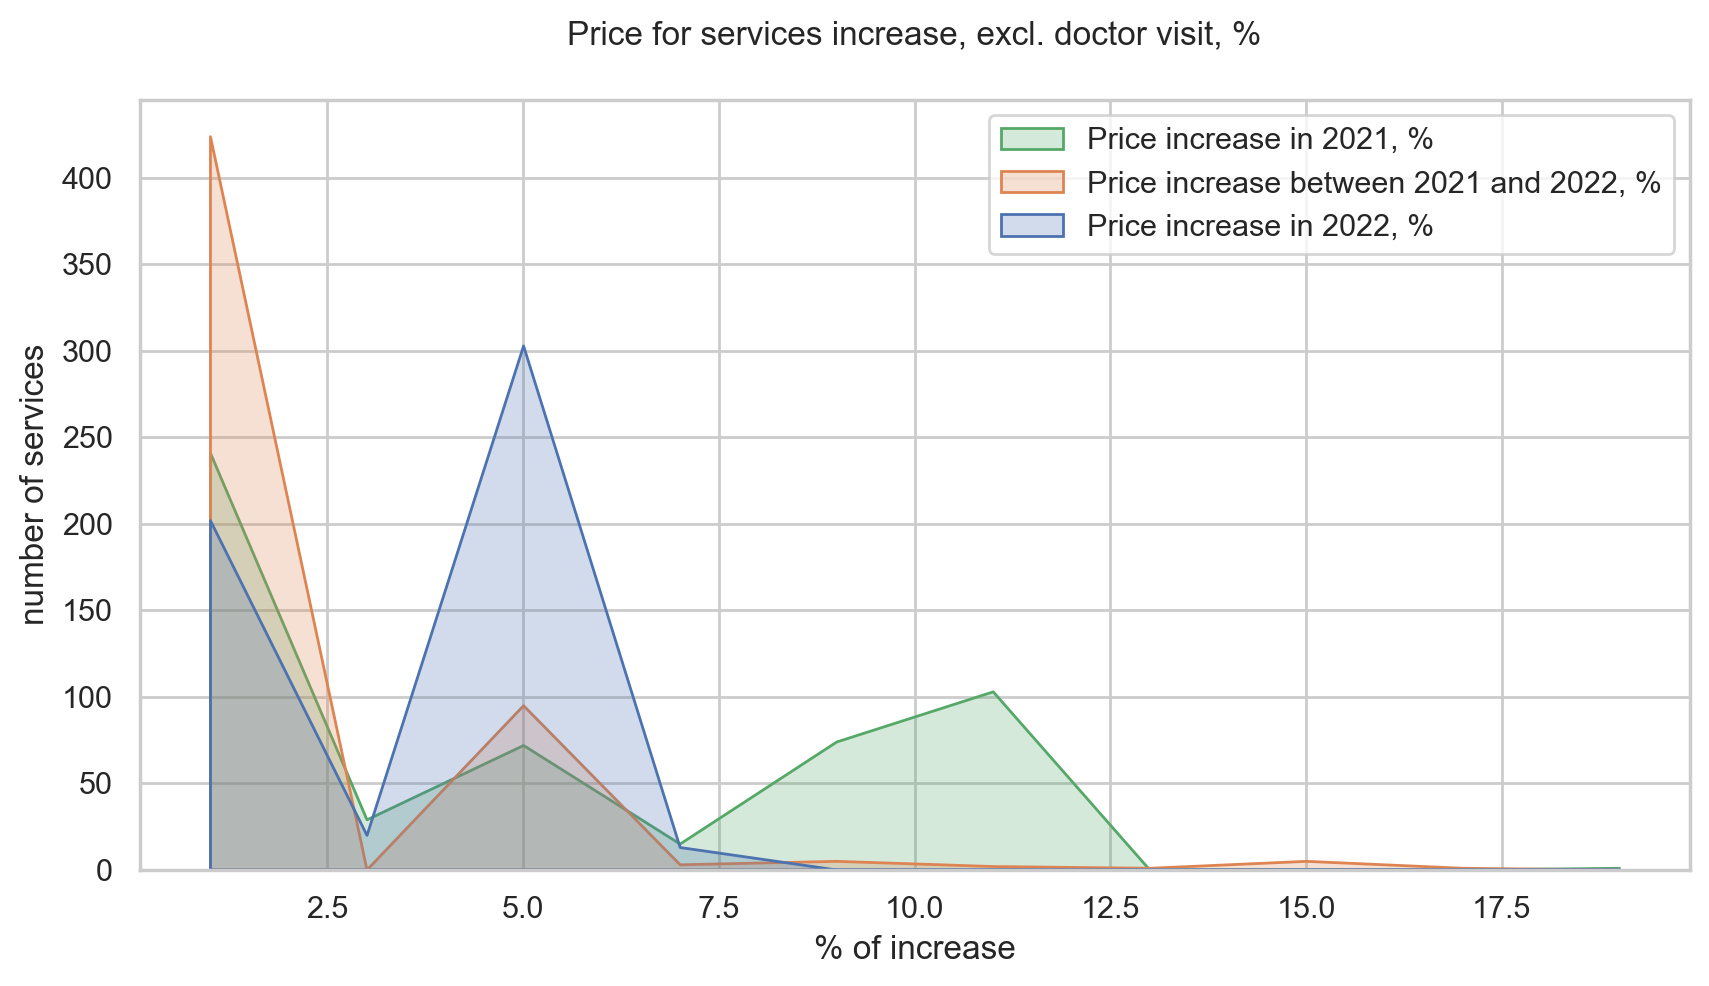

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data = services[['diff_2021', 'diff_21_22', 'diff_2022']],
            binrange = (0, 20),
            element = 'poly',
            bins = 10)
ax.set_title ('Price for services increase, excl. doctor visit, %', pad = 20)
ax.set(xlabel = '% of increase', ylabel = 'number of services')
ax.legend(['Price increase in 2021, %','Price increase between 2021 and 2022, %','Price increase in 2022, %'])
plt.show()

Let's dive deeper and examine the plots below. The first one reflects top-15 services with the biggest price increase since January 2021. The second one does the same for 2022 exclusively.
As we see, many services from the ratings coincide, which means that __the biggest impact on the leap occured in 2022__. Futhermore, in the rating of 2022 there are: __blood tests (increase by 145%), doctors' visits (by 20 - 115 %), ultrasound (by 35 - 70%), x-rays (by 10 %)__. That might not be enough to claim that those services were impacted by sanctions and issues with import, but it looks like the beginning of the delayed effect smoothed by the currency rate (weak ruble in March-April and then its growth in summer). 

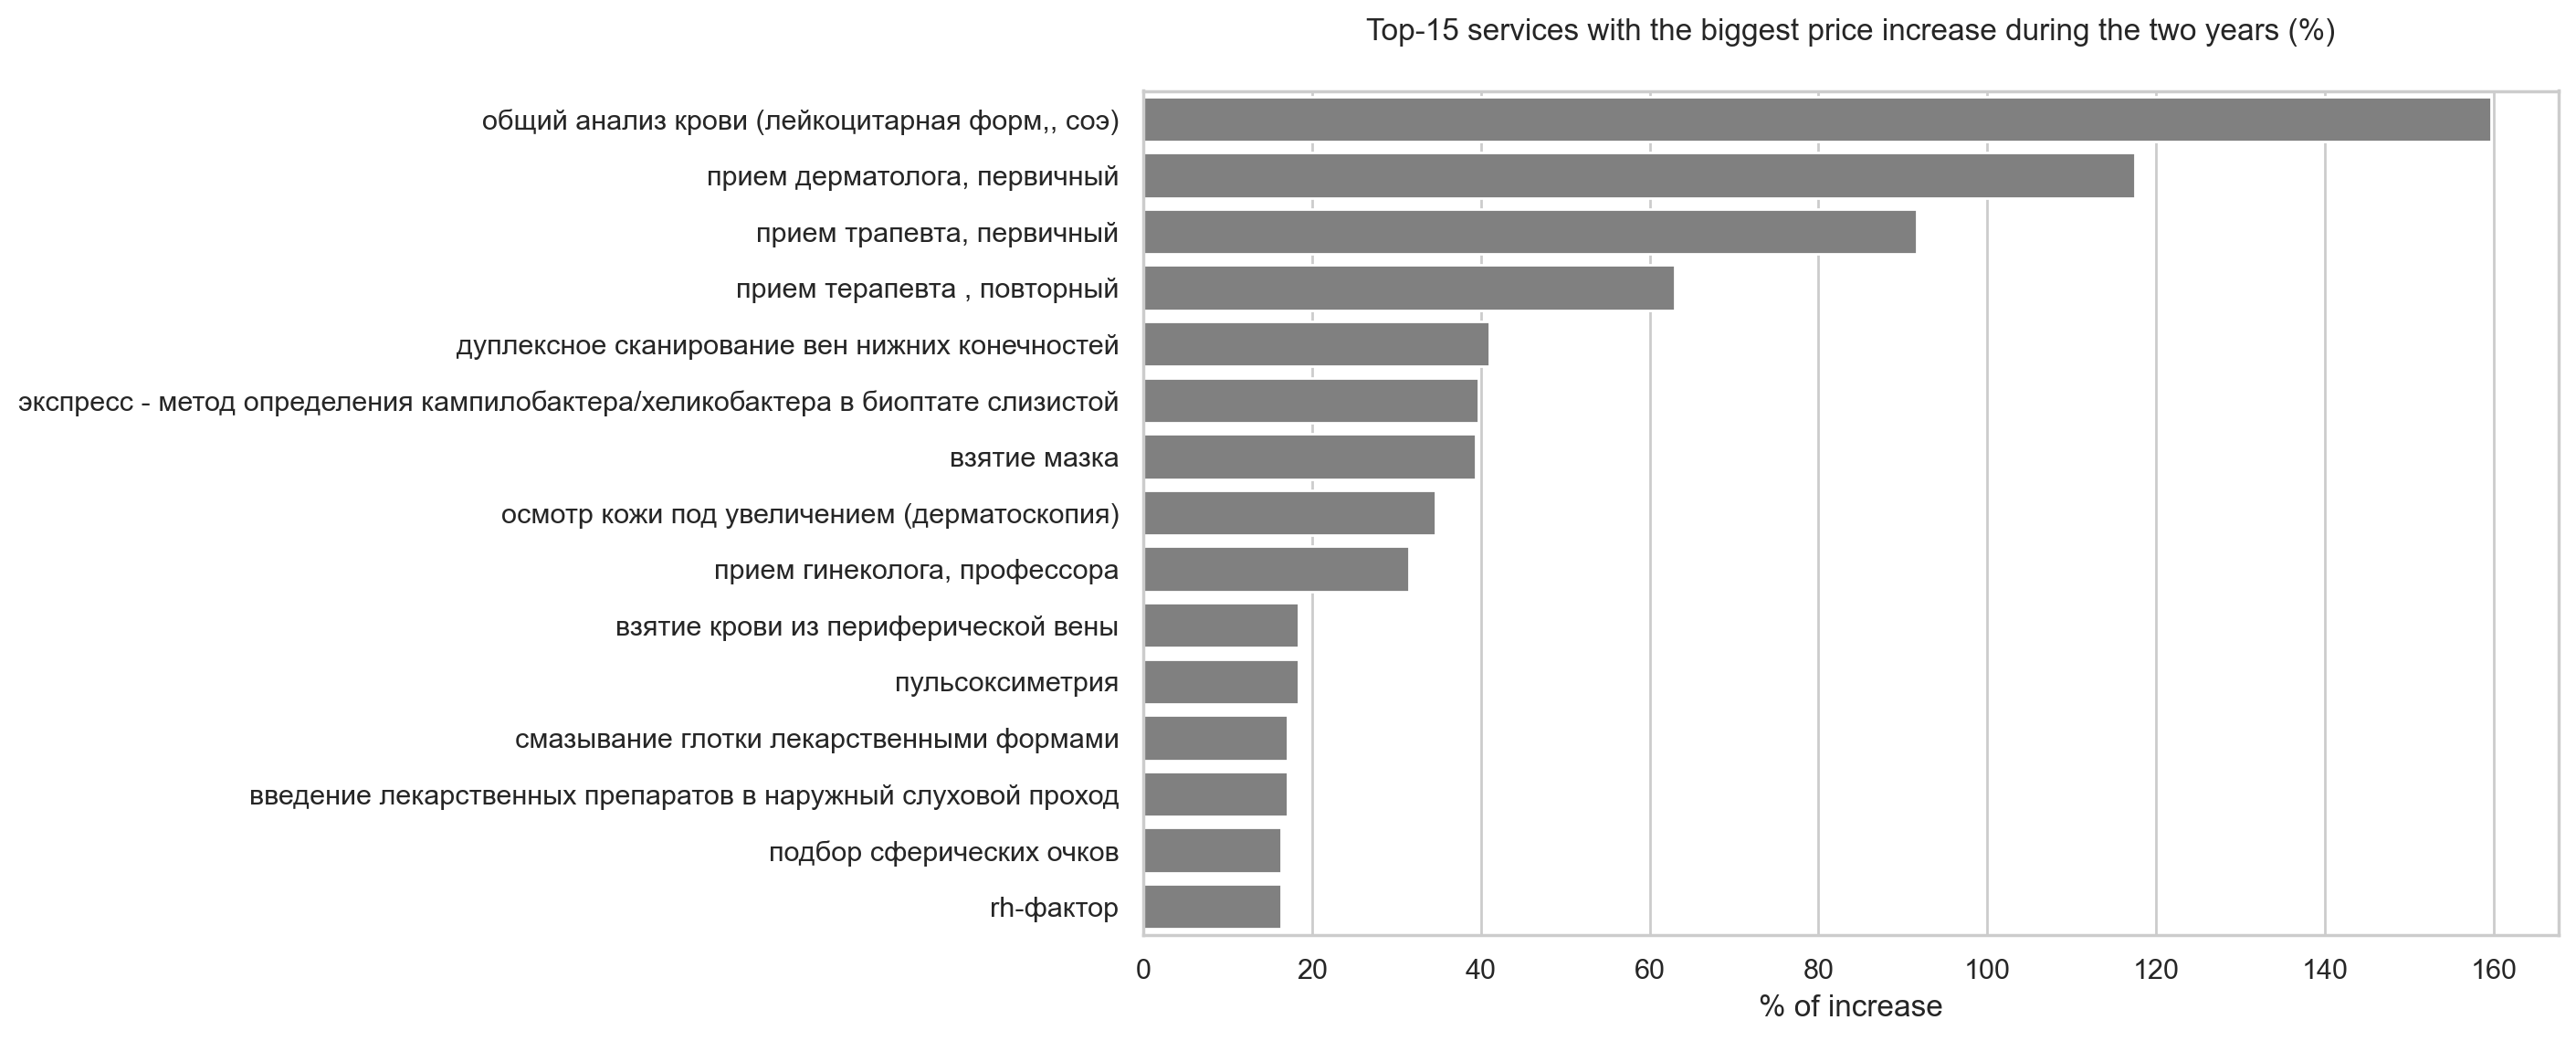

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data = services.sort_values('overall_increase', ascending = False).head(15),
            x = 'overall_increase',
            y = 'service_name',
           color = 'grey')
ax.set_title('Top-15 services with the biggest price increase during the two years (%)', pad = 20)
ax.set(ylabel = '', xlabel = '% of increase')
plt.show()

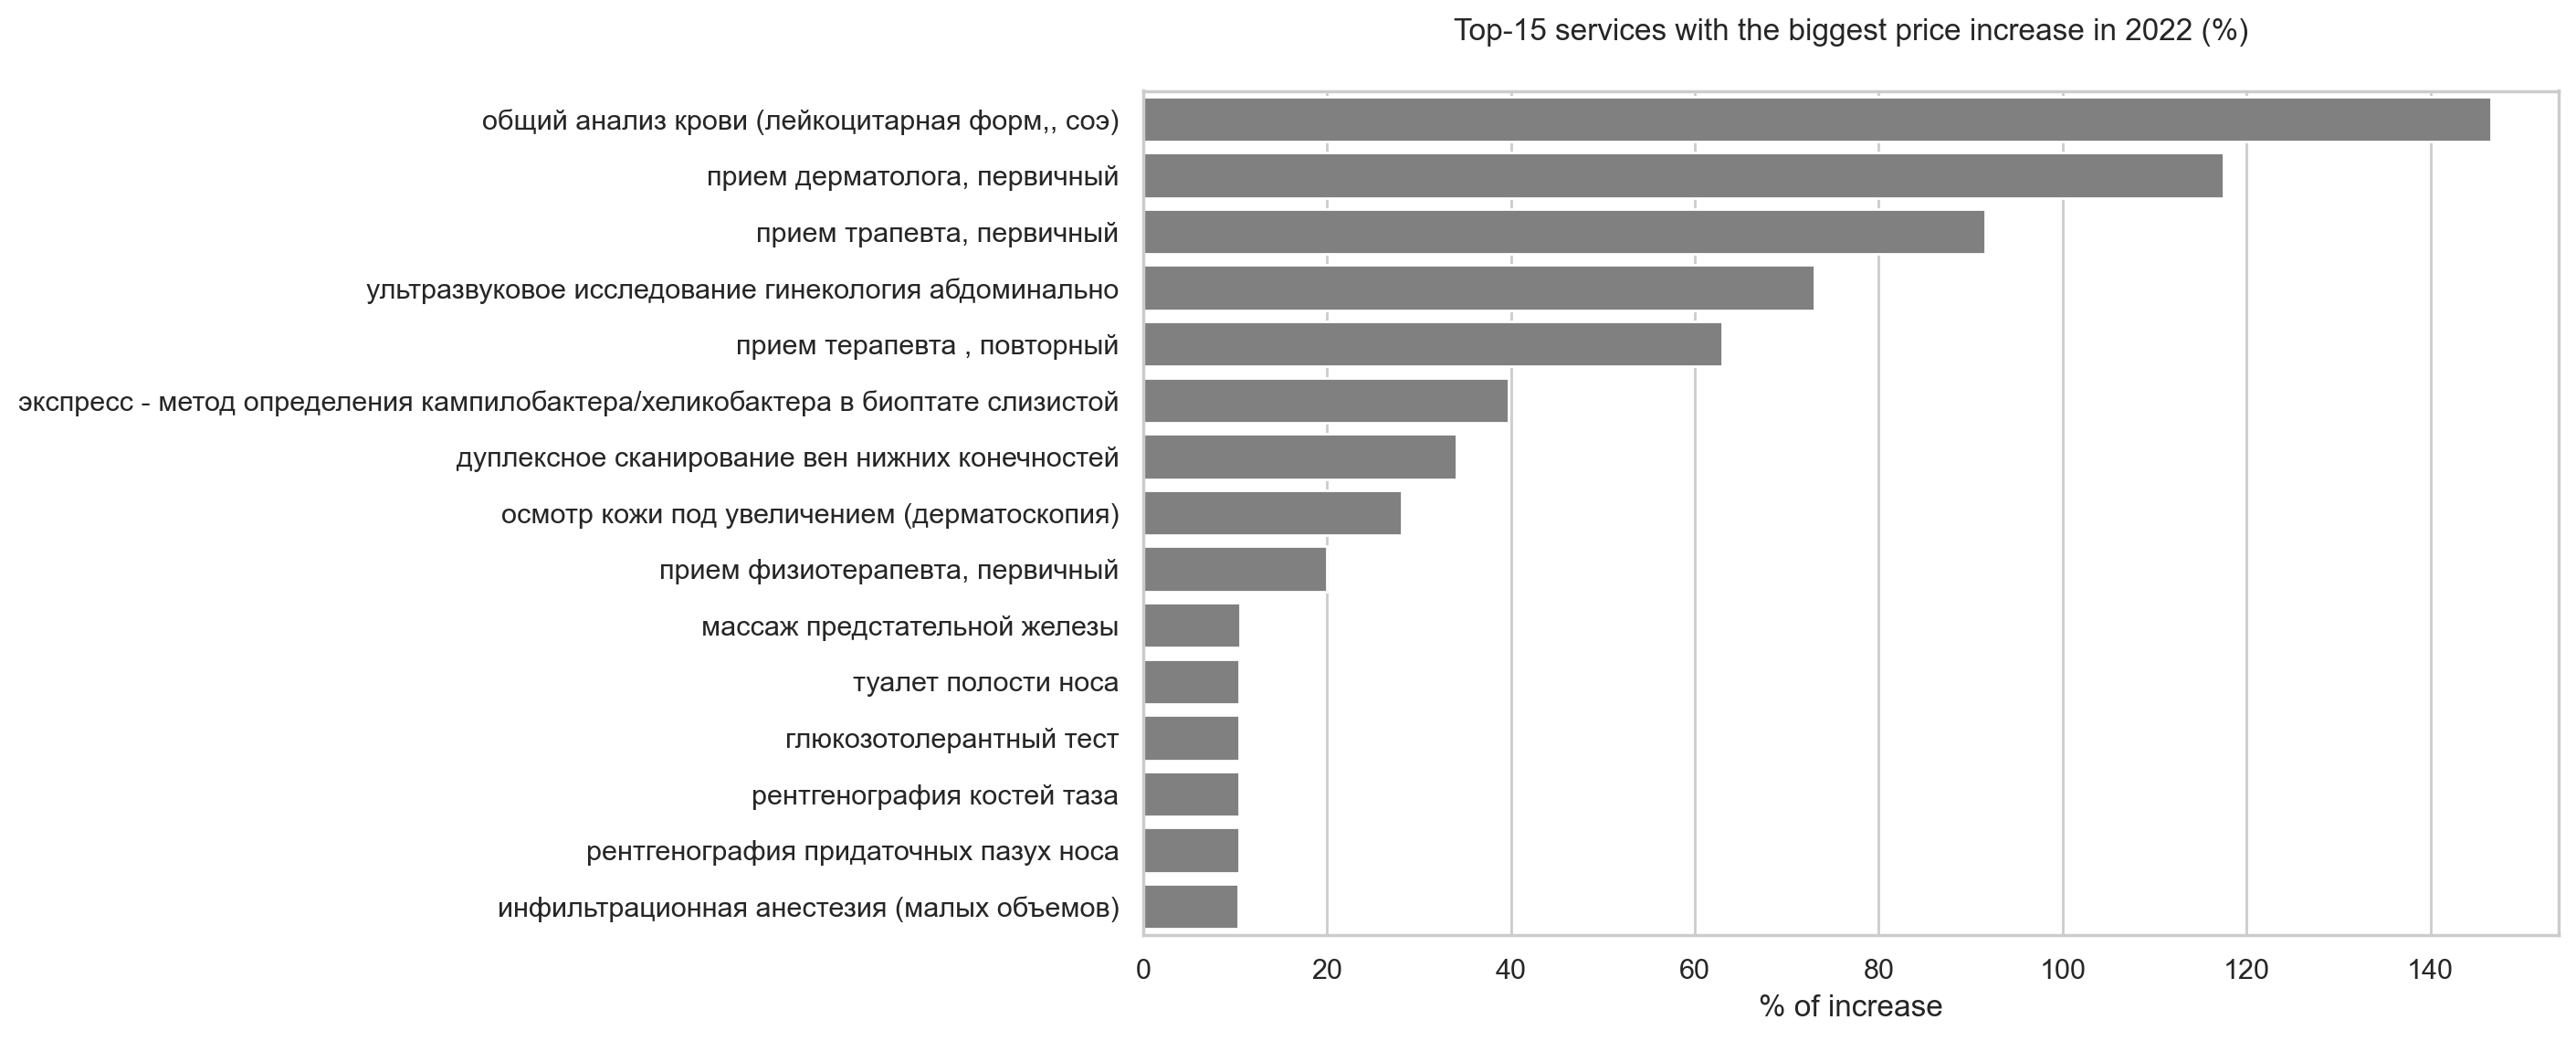

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data = services.query('diff_2022 > 7.5').sort_values('diff_2022', ascending = False).head(15),
            x = 'diff_2022',
            y = 'service_name',
           color = 'grey')
ax.set_title('Top-15 services with the biggest price increase in 2022 (%)', pad = 20)
ax.set(ylabel = '', xlabel = '% of increase')
plt.show()

### Summary on the Hypothesis III ###

__The hypothesis was partly confirmed.__

- We proved that some services which are impossible to provide without the quality imported equipment and spare parts grew in price in 2022. Among them, predictably, are some of the blood tests (increase by 145%), swabs (by 40 %), ultrasound (by 35 - 70%), x-rays (by 10 %).
- __Suprisingly is that the cost of visit of a doctor__, especially general practitioner, dermatologist, gynecologist, physiotherapist __also significantly increased (by 20 % as a minimum)__. This could mean that they also use the imported consumables or decided to raise prices in advance.
- The __currency rate in 2022 also prevents us from the firm conclusion__, as the ruble 'dropped' in the spring 2022 yet became unusually strong in summer. The next drop started in autumn 2022, but our data limited to August. We believe that the price increase could be even more perceptible if it was not for the strenghtening of the ruble in autumn.

## 7. Overall Summary ##

The project aimed to define the kind of change in the prices and the revenue of the center in 2022 compared to 2021.

The general analysis demonstrated the __significant and consistent (month-to-month) increase of the revenue in 2022__ in that it was the same (~ 50 Mrub) for both the whole 2021 and eight months of 2022. To understand the nature of the increase we needed to look thoroughly at the components of the revenue, such as visits (cost and number), customers (number, age, gender) and services (categories and types, cost and demand).

#### Clients: ####
- The medical center provided services to __4488 unique clients__ from Jan 2021 to Aug 2022;
- __57% of clients are women and 43% are men__ (2555 and 1932, respectively);
- __The flow of the unique clients increased during Jan 2022 - Aug 2022__ compared to the whole 2021 (2757 vs 2515)
- The average client __visited the center 6.75 times__ and __brought 22,181 rub__ during the period.

#### Revenue: ####
- __Overall revenue is 99.5M rub__, spread almost evenly between the whole 2021 and eight months of 2022 (50.56M and 49.98 respectively);
- Monthly distribution of revenue shows the __consistent increase (by from 1/3 to 1/2) in each month in 2022__, except for August;
- __Revenue increase was mostly due to the increase of the demand for services than the increase of the price__ for the services: the former grew 1.5 times (Jan-Aug 2022 to Jan-Aug 2021) and the latter grew by an average of 5%.

#### Services: ####
- The center offered __875 kinds__ of services during the period
- The center focuses on __consultations with doctors, tests and diagnostics, outpatient treatment and non-invasive types of treatment__.
- Surgeries are not in great demand in the center
- __90% of services cost less than 2,000 rub__
- The services that could cost more than 2,000 are special tests (e.g. MRI) and non-invasive types of treatment (e.g. physiotherapy) and outpatient treatment.


To reveal more about the key drivers of the revenue increase we suggested __the three hypotheses__. Below are they, together with the results:

#### I) Confirmed. Clients flow contributed more to the increase of revenue than cost of visit did ####

While the cost of visits increased by 6.5% on average, the number of visits increased by 53% during the comparable period (Jan - Aug 2022 compared to Jan - Aug 2021).

#### II) Partly confirmed. Age and gender are related to the revenue increase of revenue in 2022 ####
The correlation between the age and the revenue is visible, as the majority of the new visitors were those aged 20 – 40. Those aged 23 - 60 (the workforce) also tend to spend more in the center. As to the gender, there's a slight connection, too: on average, women visited the center more frequently than men and paid slightly more both in 2021 (by 5%) and 2022 (by 7.7%).

#### III) Partly confirmed.  Services tighly connected with import impacted more on revenue than the others ####
We proved that some services which are impossible to provide without the imported equipment and spare parts did grow in price in 2022. Among them, predictably, are some of the blood tests (increase by 145%), swabs (by 40 %), ultrasound (by 35 - 70%), x-rays (by 10 %). At the same time, the other services that shouldn't have increased in price following our logic, did increase (visits to some doctors, mostly).

#### To put it altogether: ####

- The __revenue did increase in 2022 by 61% for the comparable period__ (Jan - Aug 2022 to Jan - Aug 2021);
- The __revenue increase was supported by the raise in the number of visits in a greater degree (53% for the comparable period)__ and the price for services in a lesser degree (6.5 % on average);
- The raise in the number of visits was possible due to __unprecedent increase in the number of unique clients__;
- We can only guess about the motivation to buy the medical services that much in 2022. Considering the age of those customers (20 - 40 y.o., mostly), we may suggest their __desire to invest their money into health__ before the inevitable increase in prices. Or to __finish the treatment before the planned immigration__.
- The price increase was rather chaotic in 2022, in that we __cannot declare definitively that the significant raise only touched equipment-related services__. However, it was the __first time for the period when the increase was sensible: 7 - 13 % instead of previous 2 - 7%__ and the above mentioned services are in the top-increase-list.